In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Import skforecast components
from skforecast.preprocessing import RollingFeatures
from skforecast.recursive import ForecasterRecursiveMultiSeries
from skforecast.model_selection import TimeSeriesFold, backtesting_forecaster_multiseries
from skforecast.model_selection import grid_search_forecaster_multiseries

In [ ]:
file_path = "LD2011_2014.txt"
data_original = pd.read_csv(file_path, delimiter=";", parse_dates=[0], index_col=0, low_memory=False)

In [ ]:
data_original

MT_001            MT_002            MT_003  \
2011-01-01 00:15:00                 0                 0                 0   
2011-01-01 00:30:00                 0                 0                 0   
2011-01-01 00:45:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 01:15:00                 0                 0                 0   
...                               ...               ...               ...   
2014-12-31 23:00:00  2,53807106598985  22,0483641536273  1,73761946133797   
2014-12-31 23:15:00  2,53807106598985  21,3371266002845  1,73761946133797   
2014-12-31 23:30:00  2,53807106598985  20,6258890469417  1,73761946133797   
2014-12-31 23:45:00  1,26903553299492  21,3371266002845  1,73761946133797   
2015-01-01 00:00:00  2,53807106598985  19,9146514935989  1,73761946133797   

                               MT_004            MT_005            MT_006  \
2011-01-01 00:15:00                 0                 0                 0   
2011-01-01 00:30:00                 0                 0                 0   
2011-01-01 00:45:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 01:15:00                 0                 0                 0   
...                               ...               ...               ...   
2014-12-31 23:00:00  150,406504065041  85,3658536585366  303,571428571429   
2014-12-31 23:15:00  166,666666666667  81,7073170731707  324,404761904762   
2014-12-31 23:30:00   162,60162601626  82,9268292682927  318,452380952381   
2014-12-31 23:45:00  166,666666666667  85,3658536585366  285,714285714286   
2015-01-01 00:00:00  178,861788617886  84,1463414634146  279,761904761905   

                               MT_007            MT_008            MT_009  \
2011-01-01 00:15:00                 0                 0                 0   
2011-01-01 00:30:00                 0                 0                 0   
2011-01-01 00:45:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 01:15:00                 0                 0                 0   
...                               ...               ...               ...   
2014-12-31 23:00:00  11,3058224985868  282,828282828283  68,1818181818182   
2014-12-31 23:15:00  11,3058224985868  252,525252525253  64,6853146853147   
2014-12-31 23:30:00  10,1752402487281  242,424242424242  61,1888111888112   
2014-12-31 23:45:00  10,1752402487281  225,589225589226  64,6853146853147   
2015-01-01 00:00:00  10,1752402487281  249,158249158249  62,9370629370629   

                               MT_010  ...            MT_361   MT_362  \
2011-01-01 00:15:00                 0  ...                 0      0.0   
2011-01-01 00:30:00                 0  ...                 0      0.0   
2011-01-01 00:45:00                 0  ...                 0      0.0   
2011-01-01 01:00:00                 0  ...                 0      0.0   
2011-01-01 01:15:00                 0  ...                 0      0.0   
...                               ...  ...               ...      ...   
2014-12-31 23:00:00  72,0430107526882  ...  276,945039257673  28200.0   
2014-12-31 23:15:00  72,0430107526882  ...  279,800142755175  28300.0   
2014-12-31 23:30:00  74,1935483870968  ...  284,796573875803  27800.0   
2014-12-31 23:45:00  72,0430107526882  ...  246,252676659529  28000.0   
2015-01-01 00:00:00  69,8924731182796  ...  188,436830835118  27800.0   

                               MT_363            MT_364            MT_365  \
2011-01-01 00:15:00                 0                 0                 0   
2011-01-01 00:30:00                 0                 0                 0   
2011-01-01 00:45:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                

In [ ]:
df = data_original.copy()
df.index.name = "timestamp"

print(df.info())
print(df.head())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(1), object(369)
memory usage: 397.0+ MB
None
                    MT_001 MT_002 MT_003 MT_004 MT_005 MT_006 MT_007 MT_008  \
timestamp                                                                     
2011-01-01 00:15:00      0      0      0      0      0      0      0      0   
2011-01-01 00:30:00      0      0      0      0      0      0      0      0   
2011-01-01 00:45:00      0      0      0      0      0      0      0      0   
2011-01-01 01:00:00      0      0      0      0      0      0      0      0   
2011-01-01 01:15:00      0      0      0      0      0      0      0      0   

                    MT_009 MT_010  ... MT_361 MT_362 MT_363 MT_364 MT_365  \
timestamp                          ...                                      
2011-01-01 00:15:00      0      0  ...      0    0.0      0      0      0   
201

## No Missing Values

In [ ]:
# Statistics of electricity consumption
print(df.describe().T)


           count          mean           std  min  25%      50%      75%  \
MT_362  140256.0  37607.987537  38691.954832  0.0  0.0  24100.0  54800.0   

             max  
MT_362  192800.0  


In [ ]:
# from google.colab import files
# csv_file_name = "electricity_data.csv"

# save DataFrame as CSV
# df.to_csv(csv_file_name)

# download the file
# files.download(csv_file_name)

# Part 1: Data Preprocessing

## 1.1 Convert , to . for decimal, KW to KWh

In [ ]:
# Replace commas or invalid characters with proper numeric representation
df_11 = df.replace(',', '.', regex=True)

# Convert explicitly to numeric
df_11 = df_11.apply(pd.to_numeric, errors='coerce')

# Check if conversion succeeded
print(df_11.head())

# Convert kW to kWh by dividing by 4
df_11 = df_11 / 4

print(df_11.head())


                     MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_361  MT_362  MT_363  \
timestamp                                    ...                           
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0  ...     0.0     0.0  

## 1.2 Check Electricity Consumption and Remove Unneccessary Date

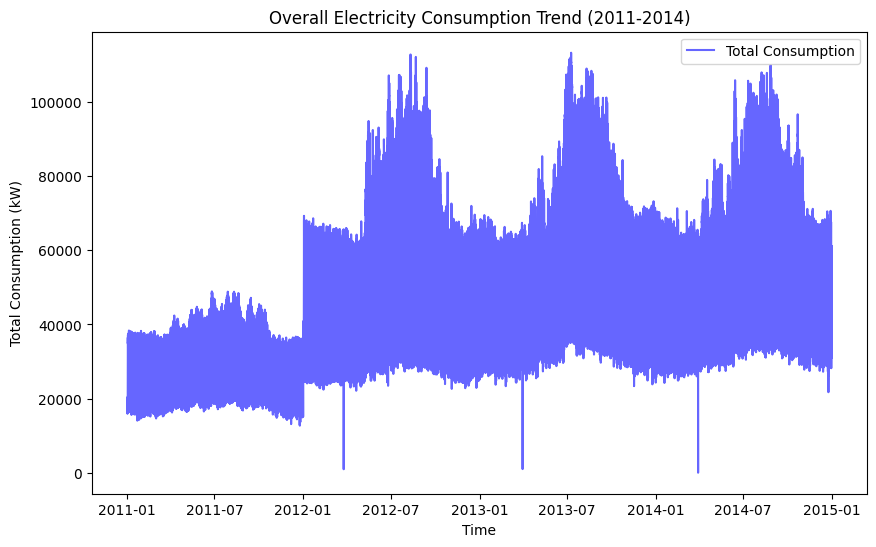

Index([2012, 2013, 2014, 2015], dtype='int32', name='timestamp')
                       MT_001    MT_002     MT_003     MT_004     MT_005  \
timestamp                                                                  
2012-01-01 00:00:00  0.000000  0.000000   0.000000   0.000000   0.000000   
2012-01-01 00:15:00  0.951777  5.689900  19.331017  34.044715  17.682927   
2012-01-01 00:30:00  1.269036  5.689900  19.331017  34.044715  18.292683   
2012-01-01 00:45:00  0.951777  5.689900  19.331017  35.060976  17.378049   
2012-01-01 01:00:00  0.951777  5.689900  19.331017  35.060976  18.902439   
...                       ...       ...        ...        ...        ...   
2014-12-31 23:00:00  0.634518  5.512091   0.434405  37.601626  21.341463   
2014-12-31 23:15:00  0.634518  5.334282   0.434405  41.666667  20.426829   
2014-12-31 23:30:00  0.634518  5.156472   0.434405  40.650407  20.731707   
2014-12-31 23:45:00  0.317259  5.334282   0.434405  41.666667  21.341463   
2015-01-01 00:00:00  0.

In [ ]:
# # load data
# df_11 = df

# # Find first non-zero occurrence per client
# def first_non_zero_dates(df_11):
#     first_dates = {}
#     for client in df_11.columns:
#         first_nonzero_idx = df_11[client].ne(0).idxmax()
#         first_dates[client] = first_nonzero_idx
#     return pd.Series(first_dates)

# # Execute the function and store results
# first_dates = first_non_zero_dates(df_11)

# # View the dates
# print(first_dates)

# # Dictionary to store the first non-zero timestamp for each client
# first_nonzero_dates = {}

# # Iterate through each column explicitly
# for client in df_11.columns:
#     non_zero_rows = df_11[df_11[client] != 0]
#     if not non_zero_rows.empty:
#         first_nonzero_dates[client] = non_zero_rows.index[0]

# # Convert to pandas Series for clear display
# first_nonzero_dates_series = pd.Series(first_nonzero_dates)

# print(first_nonzero_dates_series)



df_11["total_consumption"] = df_11.sum(axis=1, numeric_only=True)

plt.figure(figsize=(10, 6))
plt.plot(df_11.index, df_11["total_consumption"], label="Total Consumption", color="b", alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Total Consumption (kW)")
plt.title("Overall Electricity Consumption Trend (2011-2014)")
plt.legend()
plt.show()

# remove 2011
df_12 = df_11[df_11.index.year >= 2012]

print(df_12.index.year.unique())
print(df_12)


## 1.3 Convert Time Zone

In [ ]:
df_130 = df_12.copy()
df_march_2014 = df_130.loc['2012-03-25':'2012-03-25'].between_time('00:30:00', '02:30:00')
df_march_2014

MT_001    MT_002    MT_003     MT_004     MT_005  \
timestamp                                                                 
2012-03-25 00:30:00  0.951777  5.689900  0.434405  22.357724  11.585366   
2012-03-25 00:45:00  0.951777  5.512091  0.434405  19.817073  11.585366   
2012-03-25 01:00:00  2.220812  5.512091  0.434405   0.000000   0.000000   
2012-03-25 01:15:00  4.441624  5.334282  0.434405   0.000000   0.000000   
2012-03-25 01:30:00  4.441624  5.512091  0.434405   0.000000   0.000000   
2012-03-25 01:45:00  4.441624  5.156472  0.434405   0.000000   0.000000   
2012-03-25 02:00:00  0.951777  5.512091  0.434405  20.833333  10.975610   
2012-03-25 02:15:00  0.951777  4.978663  0.434405  20.325203   9.756098   
2012-03-25 02:30:00  0.951777  5.689900  0.434405  19.817073  10.060976   

                        MT_006    MT_007     MT_008     MT_009    MT_010  ...  \
timestamp                                                                 ...   
2012-03-25 00:30:00  39.434524  0.989259  57.239057  10.489510  8.333333  ...   
2012-03-25 00:45:00  38.690476  1.130582  53.872054  10.052448  8.602151  ...   
2012-03-25 01:00:00   0.000000  0.000000   0.000000   0.000000  0.000000  ...   
2012-03-25 01:15:00   0.000000  0.000000   0.000000   0.000000  0.000000  ...   
2012-03-25 01:30:00   0.000000  0.000000   0.000000   0.000000  0.000000  ...   
2012-03-25 01:45:00   0.000000  0.000000   0.000000   0.000000  0.000000  ...   
2012-03-25 02:00:00  34.970238  1.554551  54.713805   9.615385  8.064516  ...   
2012-03-25 02:15:00  31.994048  1.837196  53.030303   9.615385  7.526882  ...   
2012-03-25 02:30:00  31.250000  1.130582  52.188552   9.615385  8.333333  ...   

                     MT_362      MT_363      MT_364    MT_365    MT_366  \
timestamp                                                                 
2012-03-25 00:30:00  7875.0  400.843882  539.772727  4.889179  2.779403   
2012-03-25 00:45:00  7500.0  325.949367  551.136364  4.889179  1.609128   
2012-03-25 01:00:00     0.0    0.000000    0.000000  0.000000  0.000000   
2012-03-25 01:15:00     0.0    0.000000    0.000000  0.000000  0.000000   
2012-03-25 01:30:00     0.0    0.000000    0.000000  0.000000  0.000000   
2012-03-25 01:45:00     0.0    0.000000    0.000000  0.000000  0.000000   
2012-03-25 02:00:00  6775.0  311.181435  539.772727  4.563233  1.462844   
2012-03-25 02:15:00  6675.0  257.383966  539.772727  4.889179  2.194266   
2012-03-25 02:30:00  6650.0  260.548523  539.772727  4.889179  2.486834   

                         MT_367     MT_368      MT_369  MT_370  \
timestamp                                                        
2012-03-25 00:30:00  135.206321  13.772955  207.478006     0.0   
2012-03-25 00:45:00  130.597015  12.938230  200.879765     0.0   
2012-03-25 01:00:00    0.000000   0.000000    0.000000     0.0   
2012-03-25 01:15:00    0.000000   0.000000    0.000000     0.0   
2012-03-25 01:30:00    0.000000   0.000000    0.000000     0.0   
2012-03-25 01:45:00    0.000000   0.000000    0.000000     0.0   
2012-03-25 02:00:00  124.451273  12.938230  202.346041     0.0   
2012-03-25 02:15:00  131.694469  13.355593  201.979472     0.0   
2012-03-25 02:30:00  133.669886  11.686144  195.931085     0.0   

                     total_consumption  
timestamp                               
2012-03-25 00:30:00       34027.249282  
2012-03-25 00:45:00       32315.664707  
2012-03-25 01:00:00        1099.726735  
2012-03-25 01:15:00        1099.607940  
2012-03-25 01:30:00        1067.305575  
2012-03-25 01:45:00        1020.453945  
2012-03-25 02:00:00       29914.148673  
2012-03-25 02:15:00       29266.444969  
2012-03-25 02:30:00       28668.758558  

[9 rows x 371 columns]

### March

In [ ]:
# Find the last Sunday of March for a given year
def last_sunday_of_march(year):
    march_dates = pd.date_range(start=f'{year}-03-01', end=f'{year}-03-31', freq='W-SUN')
    return march_dates[-1].date()

# Calculate for years 2011 to 2015
years = range(2011, 2016)
last_sundays_march = {year: last_sunday_of_march(year) for year in years}

last_sundays_march

dst_days = {year: last_sunday_of_march(year) for year in years}
dst_days


{2011: datetime.date(2011, 3, 27),
 2012: datetime.date(2012, 3, 25),
 2013: datetime.date(2013, 3, 31),
 2014: datetime.date(2014, 3, 30),
 2015: datetime.date(2015, 3, 29)}

In [ ]:
# # Iterate over each DST day to update the missing values for 1:00, 1:15, 1:30, 1:45
# for dst_day in dst_days:
#     times_to_fill = [
#         f"{dst_day} 01:00:00", f"{dst_day} 01:15:00",
#         f"{dst_day} 01:30:00", f"{dst_day} 01:45:00"
#     ]
#     times_to_fill = [pd.Timestamp(t) for t in times_to_fill]

#     # Get the nearest available rows before and after the missing period
#     prev_time = pd.Timestamp(f"{dst_day} 00:45:00")
#     next_time = pd.Timestamp(f"{dst_day} 02:00:00")

#     if prev_time in df_130.index and next_time in df_130.index:
#     # Convert to float after ensuring the timestamp exists
#       prev_row = df_130.loc[prev_time].astype(str).str.replace(',', '.', regex=True)
#       prev_row = pd.to_numeric(prev_row, errors='coerce')

#       next_row = df_130.loc[next_time].astype(str).str.replace(',', '.', regex=True)
#       next_row = pd.to_numeric(next_row, errors='coerce')

#       # Compute the average safely
#       averaged_values = (prev_row + next_row) / 2

#       # Assign the computed average only if timestamps exist
#       for t in times_to_fill:
#           if t in df_130.index:
#               df_130.loc[t] = averaged_values


# dst_days = {
#     2011: "2011-03-27",
#     2012: "2012-03-25",
#     2013: "2013-03-31",
#     2014: "2014-03-30",
#     2015: "2015-10-29"
# }


df_130.index = pd.to_datetime(df_130.index)

for dst_day in dst_days.values():
    times_to_fill = [
        f"{dst_day} 01:00:00", f"{dst_day} 01:15:00",
        f"{dst_day} 01:30:00", f"{dst_day} 01:45:00"
    ]
    times_to_fill = [pd.Timestamp(t) for t in times_to_fill]

    prev_time = pd.Timestamp(f"{dst_day} 00:45:00")
    next_time = pd.Timestamp(f"{dst_day} 02:00:00")

    if prev_time in df_130.index and next_time in df_130.index:
        prev_row = df_130.loc[prev_time].astype(float)
        next_row = df_130.loc[next_time].astype(float)

        averaged_values = (prev_row + next_row) / 2

        for t in times_to_fill:
            if t in df_130.index:
                df_130.loc[t, :] = averaged_values  # Ensure modification is applied to the entire row


display(df_130)

MT_001    MT_002     MT_003     MT_004     MT_005  \
timestamp                                                                  
2012-01-01 00:00:00  0.000000  0.000000   0.000000   0.000000   0.000000   
2012-01-01 00:15:00  0.951777  5.689900  19.331017  34.044715  17.682927   
2012-01-01 00:30:00  1.269036  5.689900  19.331017  34.044715  18.292683   
2012-01-01 00:45:00  0.951777  5.689900  19.331017  35.060976  17.378049   
2012-01-01 01:00:00  0.951777  5.689900  19.331017  35.060976  18.902439   
...                       ...       ...        ...        ...        ...   
2014-12-31 23:00:00  0.634518  5.512091   0.434405  37.601626  21.341463   
2014-12-31 23:15:00  0.634518  5.334282   0.434405  41.666667  20.426829   
2014-12-31 23:30:00  0.634518  5.156472   0.434405  40.650407  20.731707   
2014-12-31 23:45:00  0.317259  5.334282   0.434405  41.666667  21.341463   
2015-01-01 00:00:00  0.634518  4.978663   0.434405  44.715447  21.036585   

                        MT_006    MT_007     MT_008     MT_009     MT_010  \
timestamp                                                                   
2012-01-01 00:00:00   0.000000  0.000000   0.000000   0.000000   0.000000   
2012-01-01 00:15:00  87.797619  2.402487  69.865320  18.793706  21.774194   
2012-01-01 00:30:00  88.541667  2.261164  69.865320  18.356643  21.236559   
2012-01-01 00:45:00  87.053571  2.119842  69.865320  18.793706  22.849462   
2012-01-01 01:00:00  84.821429  1.837196  69.865320  17.045455  22.043011   
...                        ...       ...        ...        ...        ...   
2014-12-31 23:00:00  75.892857  2.826456  70.707071  17.045455  18.010753   
2014-12-31 23:15:00  81.101190  2.826456  63.131313  16.171329  18.010753   
2014-12-31 23:30:00  79.613095  2.543810  60.606061  15.297203  18.548387   
2014-12-31 23:45:00  71.428571  2.543810  56.397306  16.171329  18.010753   
2015-01-01 00:00:00  69.940476  2.543810  62.289562  15.734266  17.473118   

                     ...  MT_362      MT_363      MT_364    MT_365    MT_366  \
timestamp            ...                                                       
2012-01-01 00:00:00  ...     0.0    0.000000    0.000000  0.000000  0.000000   
2012-01-01 00:15:00  ...  7125.0  432.489451  426.136364  3.911343  3.218256   
2012-01-01 00:30:00  ...  6600.0  413.502110  414.772727  3.911343  3.364541   
2012-01-01 00:45:00  ...  6300.0  333.333333  409.090909  3.911343  2.633119   
2012-01-01 01:00:00  ...  5950.0  331.223629  409.090909  3.911343  3.657109   
...                  ...     ...         ...         ...       ...       ...   
2014-12-31 23:00:00  ...  7050.0  404.008439  340.909091  7.496741  1.462844   
2014-12-31 23:15:00  ...  7075.0  392.405063  335.227273  7.496741  2.486834   
2014-12-31 23:30:00  ...  6950.0  389.240506  329.545455  6.844850  2.340550   
2014-12-31 23:45:00  ...  7000.0  360.759494  227.272727  6.518905  1.023991   
2015-01-01 00:00:00  ...  6950.0  352.320675  238.636364  6.844850  1.023991   

                         MT_367     MT_368      MT_369       MT_370  \
timestamp                                                             
2012-01-01 00:00:00    0.000000   0.000000    0.000000     0.000000   
2012-01-01 00:15:00  126.207199  15.859766  190.432551     0.000000   
2012-01-01 00:30:00  131.255487  15.025042  175.586510     0.000000   
2012-01-01 00:45:00  131.694469  14.190317  174.120235     0.000000   
2012-01-01 01:00:00  134.986831  15.859766  173.387097     0.000000   
...                         ...        ...         ...          ...   
2014-12-31 23:00:00  174.275680  44.240401  162.756598  1905.405405   
2014-12-31 23:15:00  167.910448  42.153589  167.338710  1675.675676   
2014-12-31 23:30:00  167.690957  38.397329  167.521994  1716.216216   
2014-12-31 23:45:00  166.154522  36.727880  161.656891  1635.135135   
2015-01-01 00:00:00  157.155399  32.971619  168.255132  1783.783784   

                     total_consumption  
timestamp                 

In [ ]:
df_march_2014 = df_130.loc['2012-03-25':'2012-03-25'].between_time('00:30:00', '02:30:00')
df_march_2014

MT_001    MT_002    MT_003     MT_004     MT_005  \
timestamp                                                                 
2012-03-25 00:30:00  0.951777  5.689900  0.434405  22.357724  11.585366   
2012-03-25 00:45:00  0.951777  5.512091  0.434405  19.817073  11.585366   
2012-03-25 01:00:00  0.951777  5.512091  0.434405  20.325203  11.280488   
2012-03-25 01:15:00  0.951777  5.512091  0.434405  20.325203  11.280488   
2012-03-25 01:30:00  0.951777  5.512091  0.434405  20.325203  11.280488   
2012-03-25 01:45:00  0.951777  5.512091  0.434405  20.325203  11.280488   
2012-03-25 02:00:00  0.951777  5.512091  0.434405  20.833333  10.975610   
2012-03-25 02:15:00  0.951777  4.978663  0.434405  20.325203   9.756098   
2012-03-25 02:30:00  0.951777  5.689900  0.434405  19.817073  10.060976   

                        MT_006    MT_007     MT_008     MT_009    MT_010  ...  \
timestamp                                                                 ...   
2012-03-25 00:30:00  39.434524  0.989259  57.239057  10.489510  8.333333  ...   
2012-03-25 00:45:00  38.690476  1.130582  53.872054  10.052448  8.602151  ...   
2012-03-25 01:00:00  36.830357  1.342566  54.292929   9.833916  8.333333  ...   
2012-03-25 01:15:00  36.830357  1.342566  54.292929   9.833916  8.333333  ...   
2012-03-25 01:30:00  36.830357  1.342566  54.292929   9.833916  8.333333  ...   
2012-03-25 01:45:00  36.830357  1.342566  54.292929   9.833916  8.333333  ...   
2012-03-25 02:00:00  34.970238  1.554551  54.713805   9.615385  8.064516  ...   
2012-03-25 02:15:00  31.994048  1.837196  53.030303   9.615385  7.526882  ...   
2012-03-25 02:30:00  31.250000  1.130582  52.188552   9.615385  8.333333  ...   

                     MT_362      MT_363      MT_364    MT_365    MT_366  \
timestamp                                                                 
2012-03-25 00:30:00  7875.0  400.843882  539.772727  4.889179  2.779403   
2012-03-25 00:45:00  7500.0  325.949367  551.136364  4.889179  1.609128   
2012-03-25 01:00:00  7137.5  318.565401  545.454545  4.726206  1.535986   
2012-03-25 01:15:00  7137.5  318.565401  545.454545  4.726206  1.535986   
2012-03-25 01:30:00  7137.5  318.565401  545.454545  4.726206  1.535986   
2012-03-25 01:45:00  7137.5  318.565401  545.454545  4.726206  1.535986   
2012-03-25 02:00:00  6775.0  311.181435  539.772727  4.563233  1.462844   
2012-03-25 02:15:00  6675.0  257.383966  539.772727  4.889179  2.194266   
2012-03-25 02:30:00  6650.0  260.548523  539.772727  4.889179  2.486834   

                         MT_367     MT_368      MT_369  MT_370  \
timestamp                                                        
2012-03-25 00:30:00  135.206321  13.772955  207.478006     0.0   
2012-03-25 00:45:00  130.597015  12.938230  200.879765     0.0   
2012-03-25 01:00:00  127.524144  12.938230  201.612903     0.0   
2012-03-25 01:15:00  127.524144  12.938230  201.612903     0.0   
2012-03-25 01:30:00  127.524144  12.938230  201.612903     0.0   
2012-03-25 01:45:00  127.524144  12.938230  201.612903     0.0   
2012-03-25 02:00:00  124.451273  12.938230  202.346041     0.0   
2012-03-25 02:15:00  131.694469  13.355593  201.979472     0.0   
2012-03-25 02:30:00  133.669886  11.686144  195.931085     0.0   

                     total_consumption  
timestamp                               
2012-03-25 00:30:00       34027.249282  
2012-03-25 00:45:00       32315.664707  
2012-03-25 01:00:00       31114.906690  
2012-03-25 01:15:00       31114.906690  
2012-03-25 01:30:00       31114.906690  
2012-03-25 01:45:00       31114.906690  
2012-03-25 02:00:00       29914.148673  
2012-03-25 02:15:00       29266.444969  
2012-03-25 02:30:00       28668.758558  

[9 rows x 371 columns]

### October

In [ ]:
# Find the last Sunday of October for a given year
def last_sunday_of_october(year):
    october_dates = pd.date_range(start=f'{year}-10-01', end=f'{year}-10-31', freq='W-SUN')
    return october_dates[-1].date()

# Calculate for years 2011 to 2015
years = range(2011, 2016)
last_sundays_october = {year: last_sunday_of_october(year) for year in years}

last_sundays_october

{2011: datetime.date(2011, 10, 30),
 2012: datetime.date(2012, 10, 28),
 2013: datetime.date(2013, 10, 27),
 2014: datetime.date(2014, 10, 26),
 2015: datetime.date(2015, 10, 25)}

In [ ]:
df_oct = df_130.copy()

last_sundays_october = {
    2011: "2011-10-30",
    2012: "2012-10-28",
    2013: "2013-10-27",
    2014: "2014-10-26",
    #2015: "2015-10-25"
}

for year, last_sunday in last_sundays_october.items():
    times_to_update = [
        f"{last_sunday} 01:00:00", f"{last_sunday} 01:15:00",
        f"{last_sunday} 01:30:00", f"{last_sunday} 01:45:00"
    ]
    times_to_update = [pd.Timestamp(t) for t in times_to_update]  # Convert to timestamps

    for t in times_to_update:
        if t in df_oct.index:
            print(f"Processing {t} - Before modification:")
            print(df_oct.loc[t])

            df_oct.loc[t] = df_oct.loc[t] / 2

            print(f"Processing {t} - After modification:")
            print(df_oct.loc[t])
        else:
            print(f"Timestamp {t} not found in DataFrame!")

Timestamp 2011-10-30 01:00:00 not found in DataFrame!
Timestamp 2011-10-30 01:15:00 not found in DataFrame!
Timestamp 2011-10-30 01:30:00 not found in DataFrame!
Timestamp 2011-10-30 01:45:00 not found in DataFrame!
Processing 2012-10-28 01:00:00 - Before modification:
MT_001                   0.634518
MT_002                   5.512091
MT_003                   0.434405
MT_004                  34.044715
MT_005                  25.914634
                         ...     
MT_367                 247.146620
MT_368                  14.607679
MT_369                 174.486804
MT_370                   0.000000
total_consumption    61226.290040
Name: 2012-10-28 01:00:00, Length: 371, dtype: float64
Processing 2012-10-28 01:00:00 - After modification:
MT_001                   0.317259
MT_002                   2.756046
MT_003                   0.217202
MT_004                  17.022358
MT_005                  12.957317
                         ...     
MT_367                 123.573310
MT_368    

In [ ]:
df_march_2014 = df_oct.loc['2012-10-28':'2012-10-28'].between_time('00:30:00', '02:30:00')
df_march_2014

MT_001    MT_002    MT_003     MT_004     MT_005  \
timestamp                                                                 
2012-10-28 00:30:00  0.634518  5.867710  0.434405  19.817073  14.634146   
2012-10-28 00:45:00  0.634518  5.512091  0.651607  18.800813  14.939024   
2012-10-28 01:00:00  0.317259  2.756046  0.217202  17.022358  12.957317   
2012-10-28 01:15:00  0.317259  2.667141  0.217202  16.768293  12.652439   
2012-10-28 01:30:00  0.475888  2.756046  0.217202  16.006098  10.823171   
2012-10-28 01:45:00  0.317259  2.667141  0.325804  15.497967  11.585366   
2012-10-28 02:00:00  0.634518  5.334282  0.434405  14.735772   7.926829   
2012-10-28 02:15:00  0.634518  5.334282  0.434405  15.243902   7.926829   
2012-10-28 02:30:00  0.634518  5.334282  0.651607  15.243902   8.536585   

                        MT_006    MT_007     MT_008     MT_009    MT_010  ...  \
timestamp                                                                 ...   
2012-10-28 00:30:00  39.434524  0.706614  56.397306  10.052448  9.946237  ...   
2012-10-28 00:45:00  37.202381  0.706614  58.080808  10.926573  9.408602  ...   
2012-10-28 01:00:00  33.110119  0.706614  57.239057  10.708042  8.736559  ...   
2012-10-28 01:15:00  29.761905  0.706614  55.976431   9.833916  8.602151  ...   
2012-10-28 01:30:00  30.133929  0.706614  55.976431  10.270979  9.005376  ...   
2012-10-28 01:45:00  31.622024  0.565291  50.505051   9.833916  8.736559  ...   
2012-10-28 02:00:00  29.761905  0.565291  42.929293  10.052448  8.064516  ...   
2012-10-28 02:15:00  28.273810  0.706614  42.929293   9.178322  7.795699  ...   
2012-10-28 02:30:00  27.529762  0.565291  42.087542   9.178322  7.795699  ...   

                     MT_362      MT_363      MT_364    MT_365    MT_366  \
timestamp                                                                 
2012-10-28 00:30:00  8750.0  267.932489  255.681818  4.889179  2.194266   
2012-10-28 00:45:00  8425.0  246.835443  250.000000  4.563233  2.486834   
2012-10-28 01:00:00  7525.0  235.232068  241.477273  4.889179  2.633119   
2012-10-28 01:15:00  7362.5  217.299578  235.795455  4.889179  2.340550   
2012-10-28 01:30:00  7212.5  210.970464  235.795455  4.563233  1.682270   
2012-10-28 01:45:00  7212.5  210.970464  232.954545  4.726206  1.462844   
2012-10-28 02:00:00  7325.0  214.135021  227.272727  4.563233  0.877706   
2012-10-28 02:15:00  7350.0  208.860759  227.272727  4.889179  1.170275   
2012-10-28 02:30:00  7125.0  200.421941  221.590909  4.563233  1.023991   

                         MT_367     MT_368      MT_369  MT_370  \
timestamp                                                        
2012-10-28 00:30:00  133.011414  12.938230  180.718475     0.0   
2012-10-28 00:45:00  118.086040  14.190317  181.085044     0.0   
2012-10-28 01:00:00  123.573310   7.303840   87.243402     0.0   
2012-10-28 01:15:00  131.913960   7.095159   87.793255     0.0   
2012-10-28 01:30:00  128.182616   7.721202   88.801320     0.0   
2012-10-28 01:45:00  140.364355   7.721202   86.785191     0.0   
2012-10-28 02:00:00  136.303775  13.355593  170.454545     0.0   
2012-10-28 02:15:00  124.231782  15.025042  176.869501     0.0   
2012-10-28 02:30:00  120.500439  14.607679  169.171554     0.0   

                     total_consumption  
timestamp                               
2012-10-28 00:30:00       34883.238544  
2012-10-28 00:45:00       33283.250557  
2012-10-28 01:00:00       30613.145020  
2012-10-28 01:15:00       30270.910259  
2012-10-28 01:30:00       29707.465479  
2012-10-28 01:45:00       29199.469988  
2012-10-28 02:00:00       29358.374247  
2012-10-28 02:15:00       29396.314199  
2012-10-28 02:30:00       28666.482288  

[9 rows x 371 columns]

## 1.4 Get Cleaned Daily Dataset

In [ ]:
# df_cleaned = df_oct.drop(columns=["total_consumption"])
df_cleaned = df_oct.copy()
df_hourly = df_cleaned.resample('h').sum()
df_hourly = df_hourly.reset_index()
print(df_hourly.head())

            timestamp    MT_001     MT_002     MT_003      MT_004     MT_005  \
0 2012-01-01 00:00:00  3.172589  17.069701  57.993050  103.150407  53.353659   
1 2012-01-01 01:00:00  4.124365  22.581792  77.324066  138.211382  72.256098   
2 2012-01-01 02:00:00  4.758883  23.470839  77.324066  139.227642  67.378049   
3 2012-01-01 03:00:00  4.441624  22.226174  77.324066  110.264228  52.743902   
4 2012-01-01 04:00:00  4.758883  21.870555  77.324066   85.873984  47.256098   

       MT_006    MT_007      MT_008     MT_009  ...   MT_362       MT_363  \
0  263.392857  6.783493  209.595960  55.944056  ...  20025.0  1179.324895   
1  340.029762  6.783493  275.252525  67.307692  ...  23800.0  1160.337553   
2  309.523810  6.924816  255.892256  66.870629  ...  24150.0  1070.675105   
3  210.565476  5.652911  207.912458  44.143357  ...  23625.0  1054.852321   
4  161.458333  3.533070  182.659933  46.328671  ...  22825.0  1028.481013   

        MT_364     MT_365     MT_366      MT_367     MT_

In [ ]:
df_daily = df_cleaned.resample('d').sum()
df_daily = df_daily.reset_index()
print(df_daily.head())

   timestamp      MT_001      MT_002      MT_003       MT_004       MT_005  \
0 2012-01-01  177.982234  624.466572  499.782798  2846.036585  1372.256098   
1 2012-01-02  256.345178  644.025605  119.678540  3072.154472  1553.353659   
2 2012-01-03  260.152284  719.061166  193.744570  2951.219512  1614.024390   
3 2012-01-04  273.477157  627.489331  342.311034  2924.288618  1663.109756   
4 2012-01-05  337.880711  660.206259  991.311903  2923.272358  1596.036585   

        MT_006      MT_007       MT_008       MT_009  ...    MT_362  \
0  6170.386905  134.963256  5533.670034  1438.811189  ...  701425.0   
1  5845.982143   99.067270  7051.346801  2096.590909  ...  873600.0   
2  5601.934524   91.153194  7014.309764  1949.300699  ...  861250.0   
3  5698.660714   92.990390  6831.649832  1944.930070  ...  855250.0   
4  5302.083333   82.815150  6597.643098  1966.346154  ...  869650.0   

         MT_363        MT_364       MT_365      MT_366        MT_367  \
0  49812.236287  50522.727273   

In [ ]:
df_monthly = df_cleaned.resample('m').sum()
df_monthly = df_monthly.reset_index()
print(df_monthly.head())

<ipython-input-21-750e2284adfa>:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_cleaned.resample('m').sum()


   timestamp       MT_001        MT_002        MT_003        MT_004  \
0 2012-01-31  9381.662437  19740.931721  16546.046916  90642.784553   
1 2012-02-29  7057.106599  18860.419630  34619.461338  87130.589431   
2 2012-03-31  8920.050761  19803.520626   1642.919201  73327.235772   
3 2012-04-30  5667.512690  16289.473684   1608.601216  66891.260163   
4 2012-05-31  5560.913706  18974.039829   1364.682884  66154.979675   

         MT_005         MT_006       MT_007         MT_008        MT_009  ...  \
0  48363.719512  172834.821429  3045.788581  201155.723906  56837.412587  ...   
1  43984.146341  155483.630952  2648.106275  178795.454545  45710.227273  ...   
2  35404.878049  130566.964286  2374.929339  176687.710438  38224.213287  ...   
3  33935.670732  123073.660714  2024.307518  170569.865320  33668.706294  ...   
4  27081.097561  124047.619048  1822.922555  177015.151515  31571.241259  ...   

       MT_362        MT_363        MT_364        MT_365        MT_366  \
0  26476950.0

In [ ]:
from google.colab import files

df_daily.to_csv("df_daily_modified.csv", index=False)

files.download("df_daily_modified.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1.5 Check Outlier

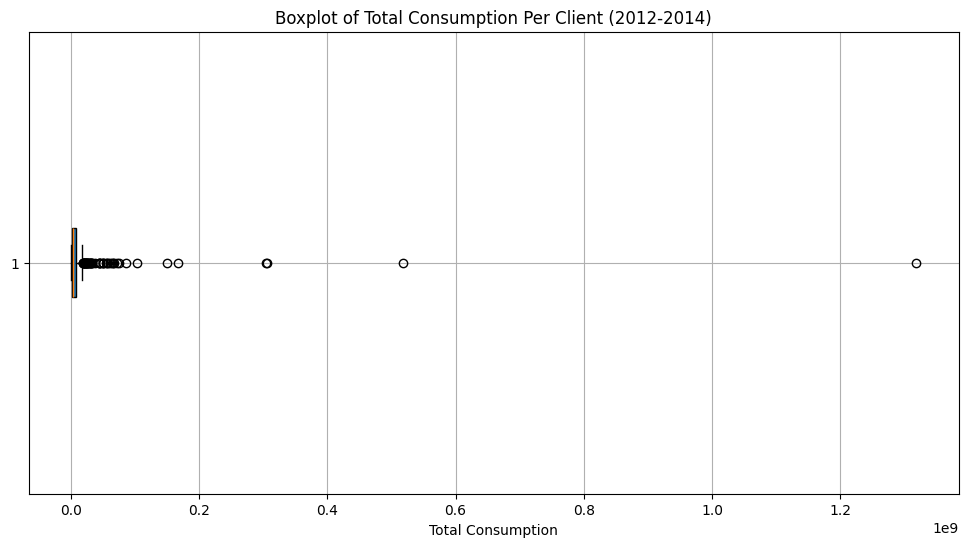

Outlier Clients (Total Consumption Outside IQR Bounds):
['MT_043', 'MT_064', 'MT_099', 'MT_103', 'MT_147', 'MT_157', 'MT_161', 'MT_163', 'MT_166', 'MT_191', 'MT_194', 'MT_196', 'MT_208', 'MT_213', 'MT_216', 'MT_218', 'MT_220', 'MT_224', 'MT_228', 'MT_241', 'MT_276', 'MT_279', 'MT_323', 'MT_328', 'MT_339', 'MT_345', 'MT_351', 'MT_357', 'MT_362', 'MT_363', 'MT_364', 'MT_370']


32

In [ ]:
df_o = df_daily.copy()
df_o = df_o.drop(columns=['timestamp', 'total_consumption'], errors='ignore')

client_total_consumption = df_o.sum()

Q1 = client_total_consumption.quantile(0.25)
Q3 = client_total_consumption.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Identify outlier clients
outlier_clients = client_total_consumption[
    (client_total_consumption < lower_bound) | (client_total_consumption > upper_bound)
]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.boxplot(client_total_consumption, vert=False, patch_artist=True)
plt.title("Boxplot of Total Consumption Per Client (2012-2014)")
plt.xlabel("Total Consumption")
plt.grid(True)
plt.show()

print("Outlier Clients (Total Consumption Outside IQR Bounds):")
print(outlier_clients.index.tolist())

len(outlier_clients)

# Part 2: EDA

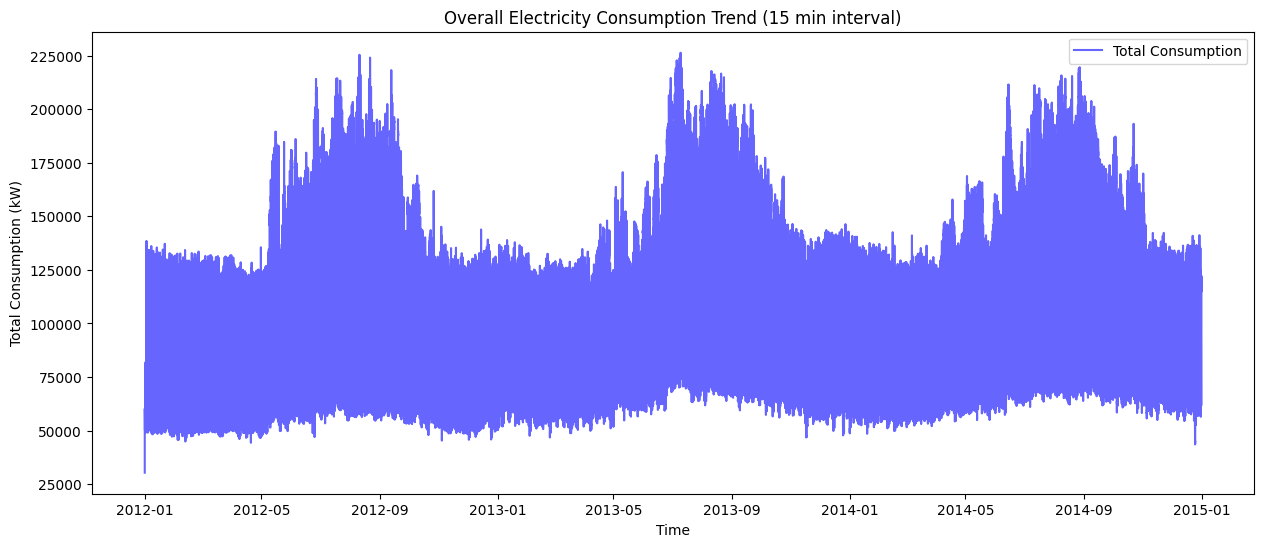

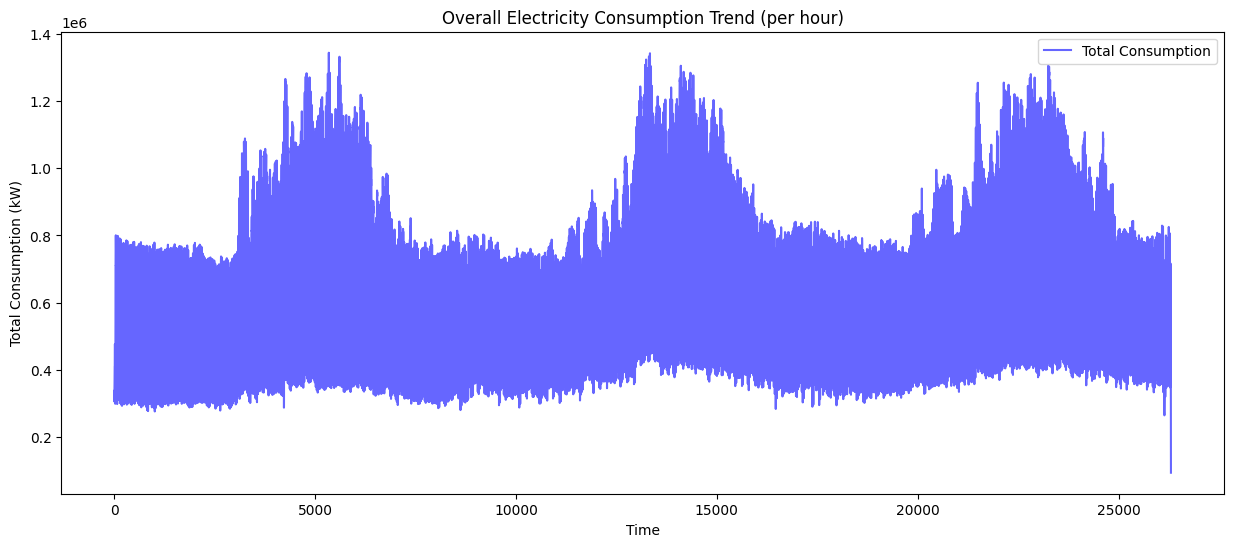

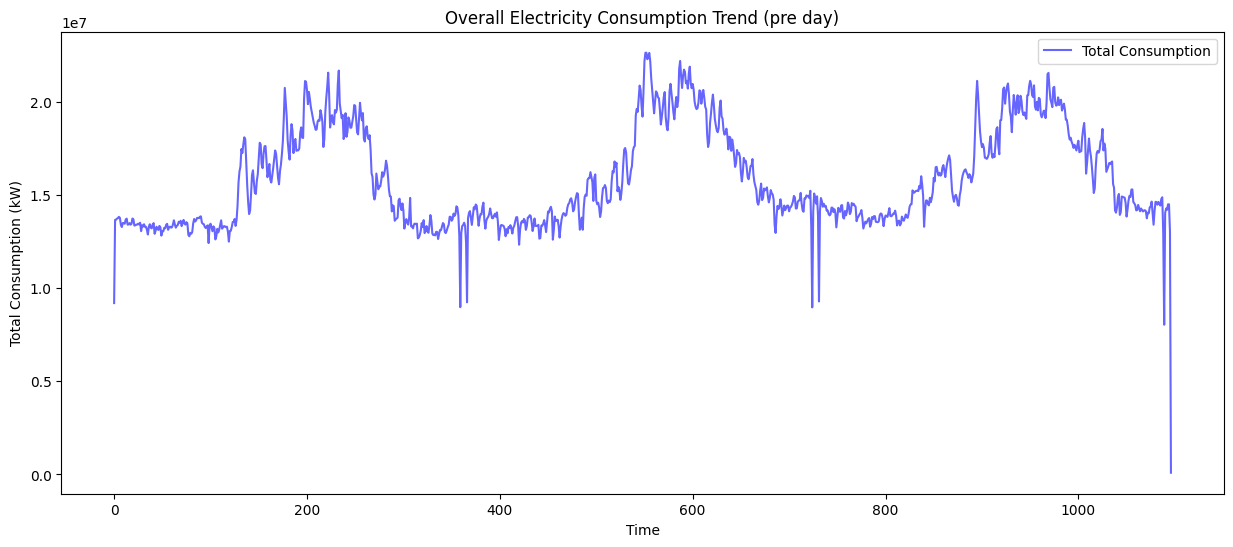

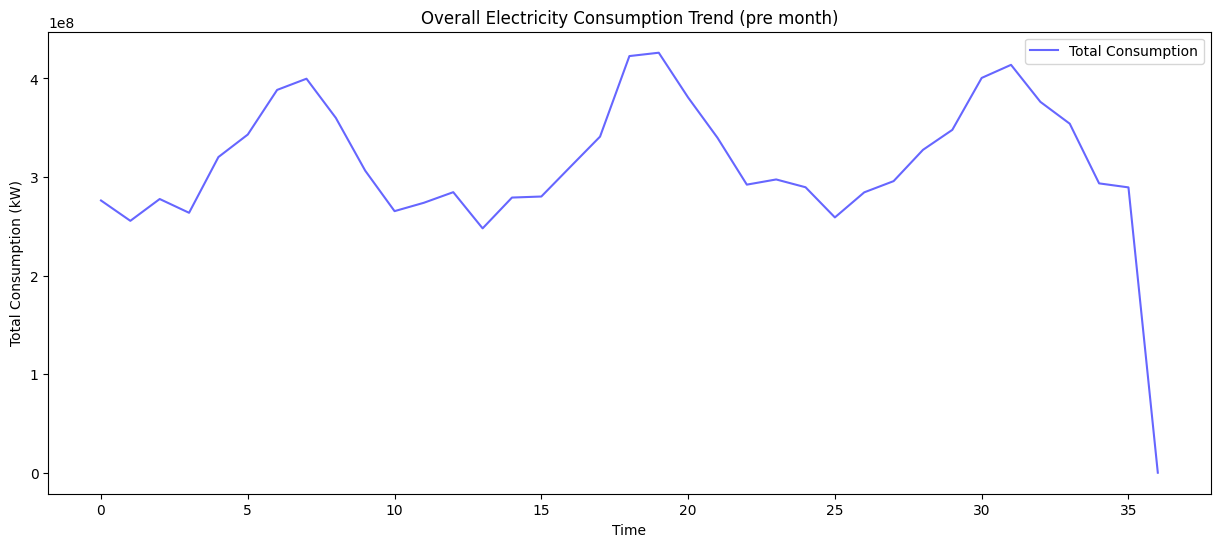

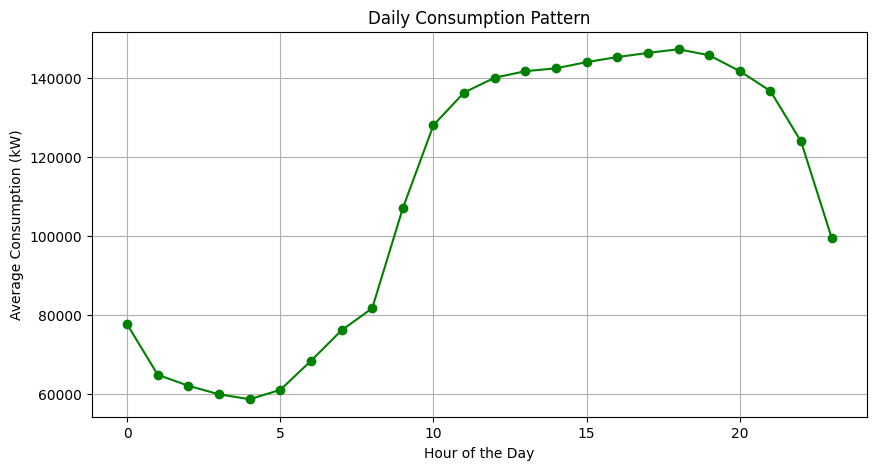

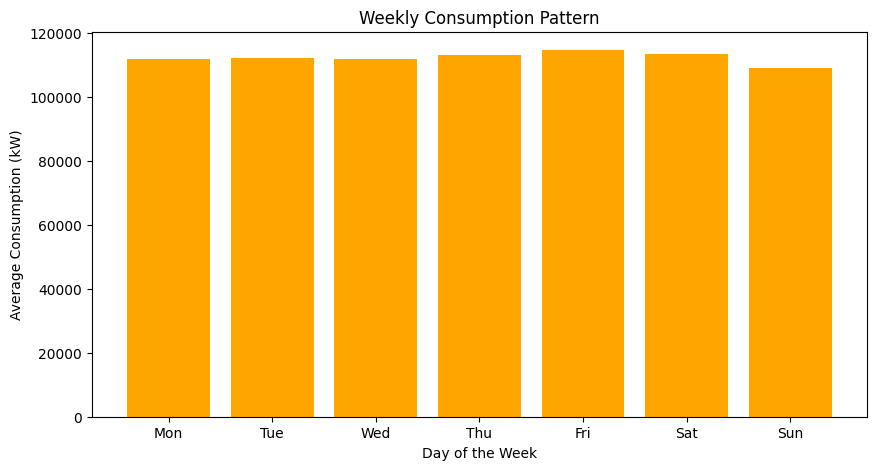

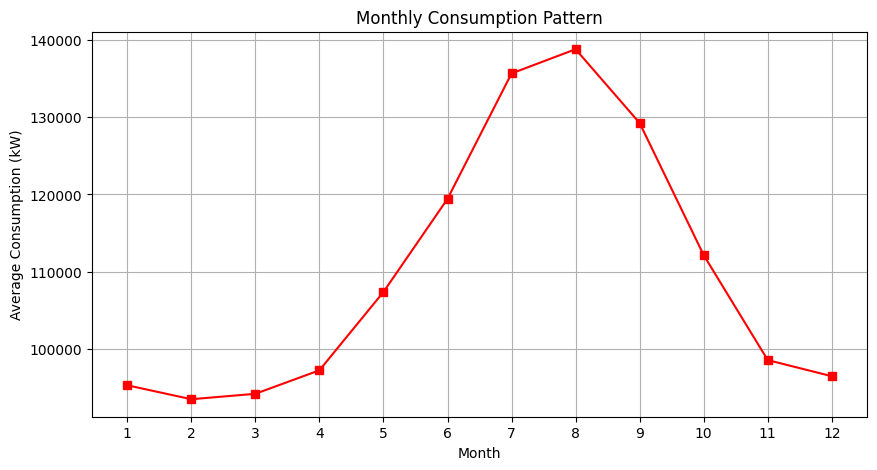

In [ ]:
df_eda = df_cleaned.copy()
df_eda["total_consumption"] = df_eda.sum(axis=1, numeric_only=True)

plt.figure(figsize=(15, 6))
plt.plot(df_eda.index, df_eda["total_consumption"], label="Total Consumption", color="b", alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Total Consumption (kW)")
plt.title("Overall Electricity Consumption Trend (15 min interval)")
plt.legend()
plt.show()

df_hourly["total_consumption"] = df_hourly.sum(axis=1, numeric_only=True)
plt.figure(figsize=(15, 6))
plt.plot(df_hourly.index, df_hourly["total_consumption"], label="Total Consumption", color="b", alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Total Consumption (kW)")
plt.title("Overall Electricity Consumption Trend (per hour)")
plt.legend()
plt.show()

df_daily["total_consumption"] = df_daily.sum(axis=1, numeric_only=True)
plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily["total_consumption"], label="Total Consumption", color="b", alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Total Consumption (kW)")
plt.title("Overall Electricity Consumption Trend (pre day)")
plt.legend()
plt.show()

df_monthly["total_consumption"] = df_monthly.sum(axis=1, numeric_only=True)
plt.figure(figsize=(15, 6))
plt.plot(df_monthly.index, df_monthly["total_consumption"], label="Total Consumption", color="b", alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Total Consumption (kW)")
plt.title("Overall Electricity Consumption Trend (pre month)")
plt.legend()
plt.show()


# Periodicity analysis

df_13 = df_12.copy()
df_13["total_consumption"] = df_13.sum(axis=1, numeric_only=True)
df_13["hour"] = df_13.index.hour  # get hours
df_13["weekday"] = df_13.index.weekday  # get week
df_13["month"] = df_13.index.month  # get month

# Diurnal periodicity (24-hour daily cycle)
daily_avg = df_13.groupby("hour")["total_consumption"].mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg.values, marker="o", linestyle="-", color="g")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Consumption (kW)")
plt.title("Daily Consumption Pattern")
plt.grid()
plt.show()

# Weekly periodicity (day of the week cycle)
weekly_avg = df_13.groupby("weekday")["total_consumption"].median()

plt.figure(figsize=(10, 5))
plt.bar(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], weekly_avg.values, color="orange")
plt.xlabel("Day of the Week")
plt.ylabel("Average Consumption (kW)")
plt.title("Weekly Consumption Pattern")
plt.show()

# Month periodicity
monthly_avg = df_13.groupby("month")["total_consumption"].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker="s", linestyle="-", color="r")
plt.xlabel("Month")
plt.ylabel("Average Consumption (kW)")
plt.title("Monthly Consumption Pattern")
plt.xticks(range(1, 13))
plt.grid()
plt.show()

# # ===== 4. Daylight Saving Time (DST) impact analysis =====
# march_mask = df_13.index.month == 3
# october_mask = df_13.index.month == 10

# march_data = df_13[march_mask].groupby(pd.to_datetime(df[march_mask].index.date))["total_consumption"].sum()
# october_data = df_13[october_mask].groupby(pd.to_datetime(df[october_mask].index.date))["total_consumption"].sum()

# plt.figure(figsize=(15, 5))
# plt.plot(march_data.index, march_data.values, label="March", color="blue")
# plt.plot(october_data.index, october_data.values, label="October", color="red")
# plt.xlabel("Day of the Month")
# plt.ylabel("Total Consumption (kW)")
# plt.title("Impact of Daylight Saving Time on Electricity Consumption")
# plt.legend()
# plt.grid()
# plt.show()


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.fftpack import fft
from sklearn.preprocessing import StandardScaler

file_path = "df_daily_modified.csv"
df = pd.read_csv(file_path)

# Identify and drop non-numeric columns, Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Transpose the dataset so that each row is a time series
series_array = df.T.values  # Shape: (num_series, num_timepoints)

def extract_features(time_series):
    features = {
        "mean": np.mean(time_series),
        "std": np.std(time_series),
        "min": np.min(time_series),
        "max": np.max(time_series),
        "median": np.median(time_series),
        "skewness": scipy.stats.skew(time_series),
        "kurtosis": scipy.stats.kurtosis(time_series),
        "autocorr": np.corrcoef(time_series[:-1], time_series[1:])[0, 1]  # Autocorrelation lag 1
    }

    fft_values = np.abs(fft(time_series))[:len(time_series)//2]  # FFT Magnitude
    features["dominant_freq"] = np.argmax(fft_values)  # Frequency with highest magnitude
    features["spectral_entropy"] = -np.sum(fft_values * np.log(fft_values + 1e-8))  # Spectral entropy

    return features

features_list = [extract_features(series) for series in series_array]
features_df = pd.DataFrame(features_list)

# Normalize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

features_df_scaled = pd.DataFrame(features_scaled, columns=features_df.columns)

# features_df_scaled.to_csv("time_series_features.csv", index=False)

print(features_df_scaled.head())


       mean       std       min       max    median  skewness  kurtosis  \
0 -0.100439 -0.110451 -0.095440 -0.105797 -0.102357  1.325674 -0.720182   
1 -0.098533 -0.111073 -0.092814 -0.104525 -0.100067 -0.370655 -0.191383   
2 -0.100559 -0.108677 -0.095561 -0.102278 -0.102411  5.430920  3.694858   
3 -0.091562 -0.104611 -0.068794 -0.097155 -0.092844  0.594036 -0.561245   
4 -0.096663 -0.107160 -0.083108 -0.102277 -0.098197  0.433858 -0.809580   

   autocorr  dominant_freq  spectral_entropy  
0  0.733571            0.0          0.098180  
1  0.288887            0.0          0.097678  
2  0.292968            0.0          0.097479  
3  0.504145            0.0          0.092904  
4  0.776545            0.0          0.095821  


# Part 3: DTW Clustering

In [ ]:
import pandas as pd
import numpy as np
from dtaidistance import dtw
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("df_daily_modified.csv", index_col=0, parse_dates=True)

df

MT_001      MT_002      MT_003       MT_004       MT_005  \
timestamp                                                                  
2012-01-01  177.982234  624.466572  499.782798  2846.036585  1372.256098   
2012-01-02  256.345178  644.025605  119.678540  3072.154472  1553.353659   
2012-01-03  260.152284  719.061166  193.744570  2951.219512  1614.024390   
2012-01-04  273.477157  627.489331  342.311034  2924.288618  1663.109756   
2012-01-05  337.880711  660.206259  991.311903  2923.272358  1596.036585   
...                ...         ...         ...          ...          ...   
2014-12-28   56.789340  532.894737   37.793223  3581.808943  1694.207317   
2014-12-29   62.182741  553.165007   40.182450  3516.768293  1799.695122   
2014-12-30   58.058376  551.386913   41.268462  3572.662602  1797.256098   
2014-12-31   57.423858  568.278805   41.702867  3501.524390  1755.792683   
2015-01-01    0.634518    4.978663    0.434405    44.715447    21.036585   

                 MT_006      MT_007       MT_008       MT_009       MT_010  \
timestamp                                                                    
2012-01-01  6170.386905  134.963256  5533.670034  1438.811189  1574.193548   
2012-01-02  5845.982143   99.067270  7051.346801  2096.590909  1389.247312   
2012-01-03  5601.934524   91.153194  7014.309764  1949.300699  2042.204301   
2012-01-04  5698.660714   92.990390  6831.649832  1944.930070  1770.161290   
2012-01-05  5302.083333   82.815150  6597.643098  1966.346154  1930.107527   
...                 ...         ...          ...          ...          ...   
2014-12-28  5030.505952  107.405314  6313.973064  1279.720280  1198.655914   
2014-12-29  5706.101190  137.648389  7571.548822  1674.388112  1584.408602   
2014-12-30  5970.238095  146.693047  7727.272727  1621.940559  1622.311828   
2014-12-31  5877.976190  172.696439  7175.084175  1552.884615  1258.602151   
2015-01-01    69.940476    2.543810    62.289562    15.734266    17.473118   

            ...    MT_362        MT_363        MT_364       MT_365  \
timestamp   ...                                                      
2012-01-01  ...  701425.0  49812.236287  50522.727273   428.943937   
2012-01-02  ...  873600.0  60340.717300  61193.181818  1871.903520   
2012-01-03  ...  861250.0  57636.075949  68681.818182  1957.627119   
2012-01-04  ...  855250.0  61664.556962  68431.818182  1877.118644   
2012-01-05  ...  869650.0  58469.409283  65096.590909  1838.005215   
...         ...       ...           ...           ...          ...   
2014-12-28  ...  818025.0  55180.379747  64369.318182  2042.372881   
2014-12-29  ...  777275.0  51713.080169  67272.727273  2109.517601   
2014-12-30  ...  726075.0  51031.645570  65903.409091  2653.846154   
2014-12-31  ...  687200.0  40639.240506  53971.590909  1853.976532   
2015-01-01  ...    6950.0    352.320675    238.636364     6.844850   

                MT_366        MT_367       MT_368        MT_369  \
timestamp                                                         
2012-01-01  247.220597  10291.483758  1226.627713  16519.061584   
2012-01-02  563.341135  13638.059701  3538.814691  19326.063050   
2012-01-03  659.742539  13883.669886  3903.171953  20083.027859   
2012-01-04  546.518432  13307.506585  3589.315526  19157.624633   
2012-01-05  614.686951  14112.598771  4696.160267  19960.777126   
...                ...           ...          ...           ...   
2014-12-28  138.092452  11478.709394  1101.419032  16533.907625   
2014-12-29  288.472791  13482.221247  3228.714524  18470.674487   
2014-12-30  223.083675  14083.625988  3999.165275  18487.536657   
2014-12-31  132.533645  12564.969271  3311.352254  17604.105572   
2015-01-01    1.023991    157.155399    32.971619    168.255132   

                   MT_370  total_consumption  
timestamp                                     
2012-01-01       0.000000       3.064960e+06  
2012-01-02       0.000000       4.552660e+06  
2012-01-03       0.000000       4.557468e

In [ ]:
# !pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.6 MB/s eta 0:00:00


In [ ]:
if 'total_consumption' in df.columns:
    df = df.drop(columns='total_consumption')

df_T = df.T

# normalization
df_T_norm = (df_T - df_T.mean(axis=1).values[:, None]) / df_T.std(axis=1).values[:, None]

# each row is a time series
df_T_norm


timestamp  2012-01-01  2012-01-02  2012-01-03  2012-01-04  2012-01-05  \
MT_001       0.404603    1.025362    1.055520    1.161074    1.671253   
MT_002      -0.419832   -0.211065    0.589840   -0.387568   -0.038358   
MT_003       1.856214    0.120556    0.458761    1.137156    4.100669   
MT_004       0.507635    1.031584    0.751360    0.688957    0.686602   
MT_005       0.609821    1.216954    1.420354    1.584913    1.360049   
...               ...         ...         ...         ...         ...   
MT_366      -0.404742    2.203086    2.998347    2.064307    2.626662   
MT_367      -1.322342    0.031148    0.130482   -0.102541    0.223070   
MT_368      -1.659280    0.471567    0.807348    0.518107    1.538144   
MT_369      -1.363514   -0.259401    0.038346   -0.325655   -0.009741   
MT_370      -1.326617   -1.326617   -1.326617   -1.326617   -1.326617   

timestamp  2012-01-06  2012-01-07  2012-01-08  2012-01-09  2012-01-10  ...  \
MT_001       1.631042    1.269142    1.103271    1.291760    1.304326  ...   
MT_002      -0.385670    0.109676    0.016680   -0.193984   -0.922769  ...   
MT_003      -0.153182    2.003002   -0.164092    3.227881    2.397740  ...   
MT_004       0.520587    1.310630    1.050422    0.106138    0.214460  ...   
MT_005       1.268059    1.182202    0.640485    1.017643    1.363116  ...   
...               ...         ...         ...         ...         ...  ...   
MT_366       2.415477   -0.340784   -1.016574    1.170091    2.200672  ...   
MT_367       0.253607   -0.370541   -1.275648   -0.064459    0.127109  ...   
MT_368       0.988893   -1.428502   -1.823132    0.495029    1.117744  ...   
MT_369       0.091334   -0.489307   -1.141105   -0.449728   -0.165030  ...   
MT_370      -1.326617   -1.326617   -1.326617   -1.326617   -1.326617  ...   

timestamp  2014-12-23  2014-12-24  2014-12-25  2014-12-26  2014-12-27  \
MT_001      -0.510200   -0.668532   -0.706229   -0.583083   -0.585596   
MT_002      -1.277672   -1.055621   -1.273877   -1.285264   -1.359281   
MT_003      -0.237486   -0.235502   -0.423945   -0.241453   -0.223600   
MT_004       2.290237    1.948788    1.398936    1.952320    2.570462   
MT_005       2.298345    1.707566    1.686102    1.858838    2.184891   
...               ...         ...         ...         ...         ...   
MT_366      -1.224139   -1.336368   -1.331541   -0.206832   -1.004507   
MT_367       0.442512   -0.010397   -0.760245   -0.034454   -0.077153   
MT_368       0.946199    0.216942   -1.651972    0.089630   -0.987332   
MT_369      -0.100579   -0.479286   -1.202313   -0.316571   -0.882434   
MT_370       0.569807   -0.463379   -0.587672    0.090702    0.385007   

timestamp  2014-12-28  2014-12-29  2014-12-30  2014-12-31  2015-01-01  
MT_001      -0.555438   -0.512713   -0.545385   -0.550411   -1.000273  
MT_002      -1.397239   -1.180881   -1.199859   -1.019561   -7.032038  
MT_003      -0.253355   -0.242445   -0.237486   -0.235502   -0.423945  
MT_004       2.212528    2.061819    2.191335    2.026497   -5.983438  
MT_005       1.689168    2.042818    2.034641    1.895634   -3.920164  
...               ...         ...         ...         ...         ...  
MT_366      -1.304992   -0.064433   -0.603859   -1.350849   -2.435735  
MT_367      -0.842180   -0.031880    0.211352   -0.402853   -5.421071  
MT_368      -1.774669    0.185787    0.895813    0.261944   -2.759320  
MT_369      -1.357675   -0.595862   -0.589229   -0.936720   -7.794983  
MT_370       0.521003    0.822317    0.894976    0.298200   -1.318130  

[370 rows x 1097 columns]

In [ ]:
series_list = [np.array(row) for row in df_T_norm.values]

## dynamic time wrapping

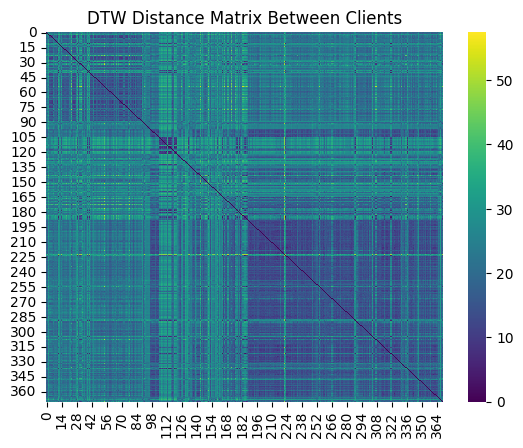

In [ ]:
distance_matrix = dtw.distance_matrix_fast(series_list, compact=False)

sns.heatmap(distance_matrix, cmap="viridis")
plt.title("DTW Distance Matrix Between Clients")
plt.show()

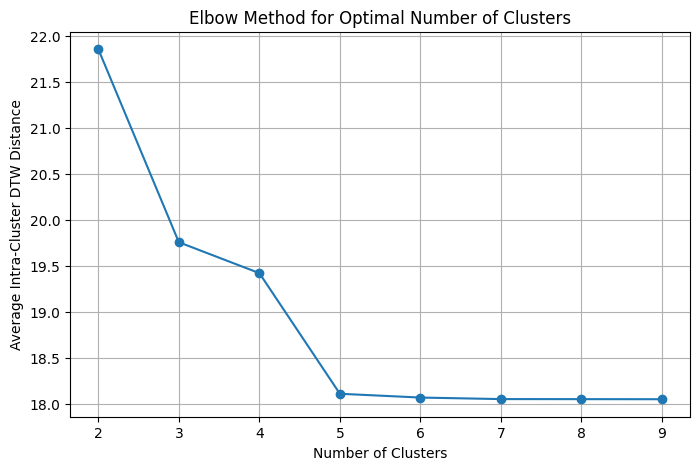

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

cluster_range = range(2, 10)
distortions = []

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='average')
    labels = model.fit_predict(distance_matrix)

    total_dist = 0
    count = 0
    for cluster_id in np.unique(labels):
        indices = np.where(labels == cluster_id)[0]
        if len(indices) <= 1:
            continue
        for i in indices:
            for j in indices:
                if i < j:
                    total_dist += distance_matrix[i][j]
                    count += 1
    avg_intra_dist = total_dist / count if count > 0 else 0
    distortions.append(avg_intra_dist)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, distortions, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Intra-Cluster DTW Distance")
plt.grid(True)
plt.show()


In [ ]:
n_clusters = 5
clustering_model = AgglomerativeClustering(n_clusters=n_clusters,
                                           metric='precomputed',
                                            linkage='average')
labels = clustering_model.fit_predict(distance_matrix)

In [ ]:
client_clusters = pd.DataFrame({
    'Client': df_T.index,
    'Cluster': labels
}).sort_values("Cluster")

print(client_clusters)
print(client_clusters.Cluster.value_counts())

     Client  Cluster
280  MT_281        0
210  MT_211        0
211  MT_212        0
212  MT_213        0
213  MT_214        0
..      ...      ...
76   MT_077        4
95   MT_096        4
35   MT_036        4
28   MT_029        4
21   MT_022        4

[370 rows x 2 columns]
Cluster
0    280
2     53
4     28
1      7
3      2
Name: count, dtype: int64


In [ ]:
client_clusters.to_csv('client_clusters.csv', index=False)

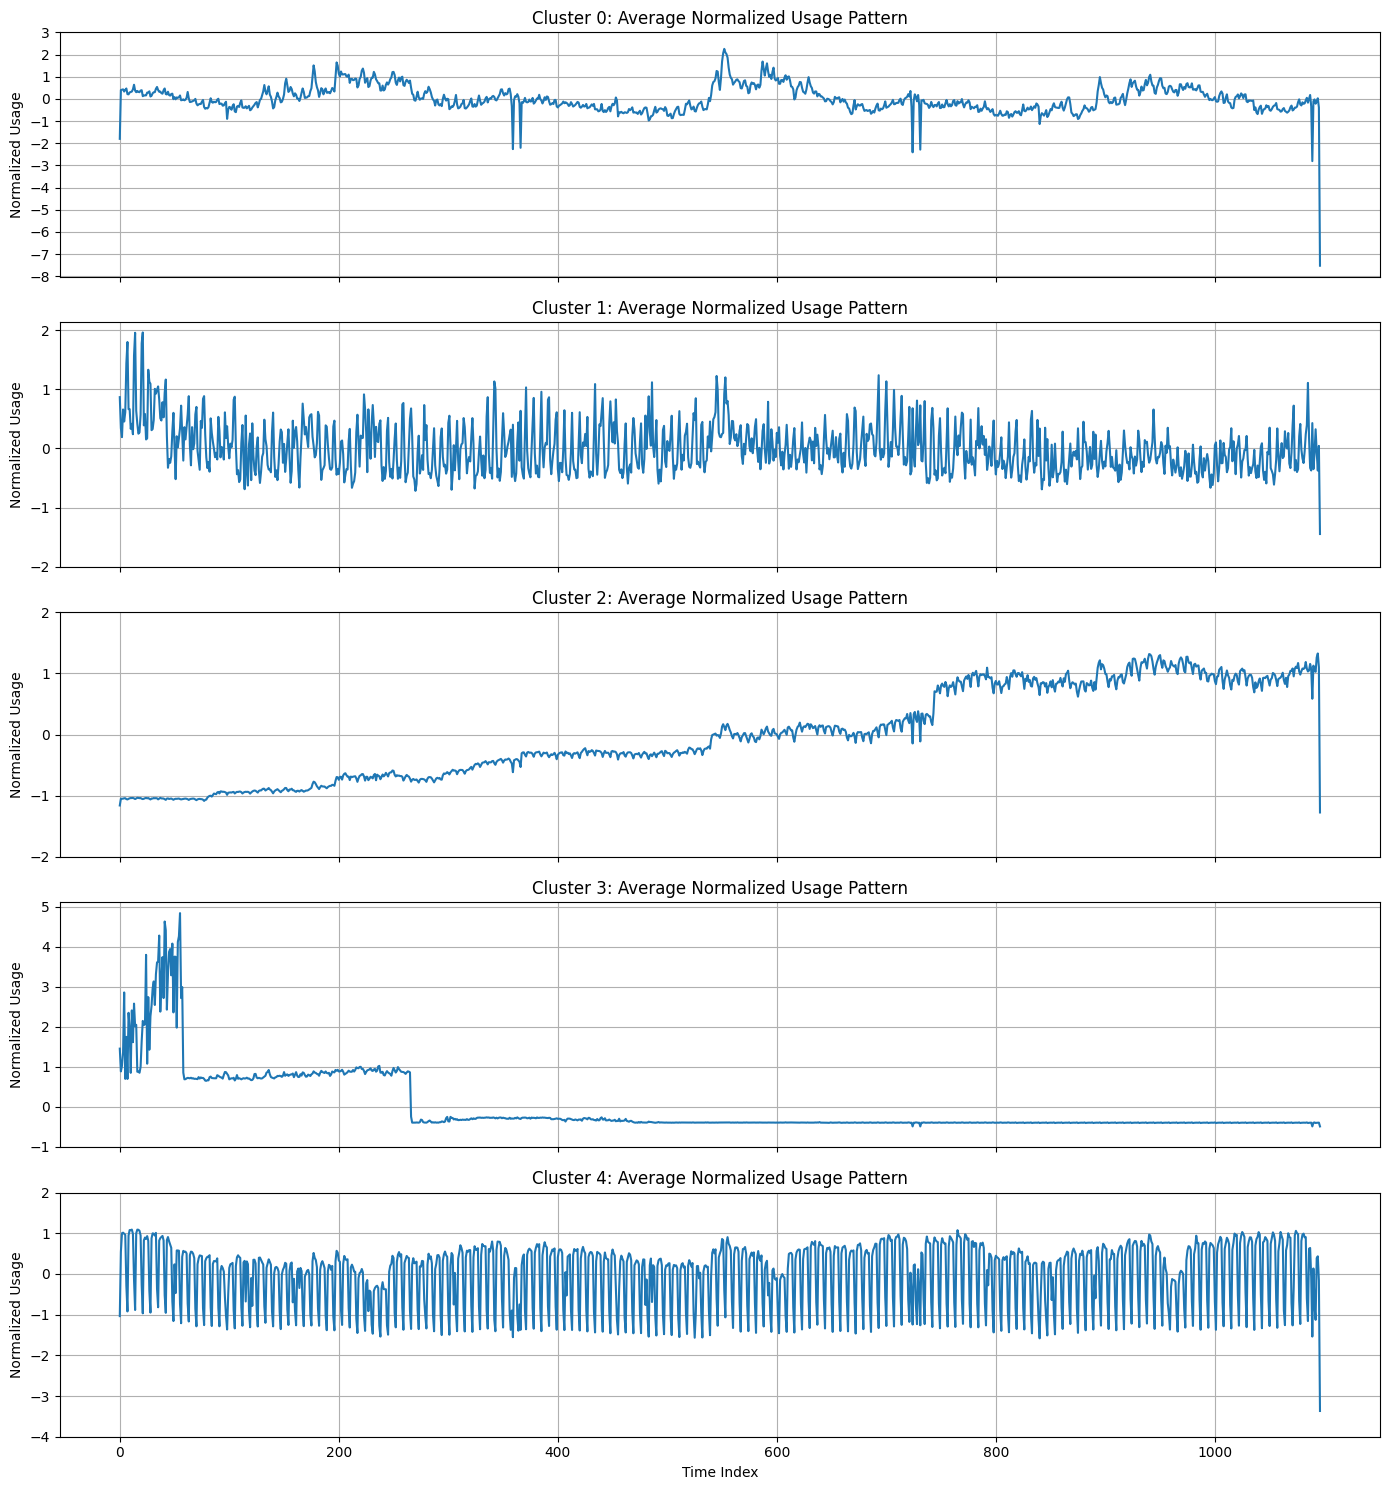

In [ ]:
df_T_norm['Cluster'] = labels

fig, axes = plt.subplots(n_clusters, 1, figsize=(14, 3 * n_clusters), sharex=True)

for c in range(n_clusters):
    ax = axes[c]
    cluster_series = df_T_norm[df_T_norm['Cluster'] == c].drop(columns='Cluster')
    mean_series = cluster_series.mean(axis=0)

    ax.plot(mean_series.values)
    ax.set_title(f"Cluster {c}: Average Normalized Usage Pattern")
    ax.set_ylabel("Normalized Usage")
    ax.grid(True)

    cluster_min = mean_series.min()
    cluster_max = mean_series.max()

    yticks = np.arange(np.floor(cluster_min), np.ceil(cluster_max) + 1, 1)
    ax.set_yticks(yticks)

axes[-1].set_xlabel("Time Index")

plt.tight_layout()
plt.show()


# # Set up subplots
# fig, axes = plt.subplots(n_clusters, 1, figsize=(14, 3 * n_clusters), sharex=True)

# # Plot each cluster in its own subplot
# for c in range(n_clusters):
#     ax = axes[c]
#     cluster_series = df_T_norm[df_T_norm['Cluster'] == c].drop(columns='Cluster')
#     mean_series = cluster_series.mean(axis=0)

#     ax.plot(mean_series.values)
#     ax.set_title(f"Cluster {c}: Average Normalized Usage Pattern")
#     ax.set_ylabel("Normalized Usage")
#     ax.grid(True)

# # Label the shared x-axis
# axes[-1].set_xlabel("Time Index")

# plt.tight_layout()
# plt.show()

Cluster 0: Steady Usage with Minor Variability (280 clients)
Clients in this cluster use electricity in a stable and consistent way. Their usage doesn't change much over time — there are no big spikes or drops. The small ups and downs are likely due to small changes in operations. This kind of pattern is common in places like factories, hospitals, or data centers that run all day, every day. These clients usually need a constant level of electricity to support regular operations.

Cluster 1: Highly Fluctuating Usage (7 clients)
The clients in Cluster 1 have highly unpredictable electricity use. Their usage goes up and down a lot, with no clear pattern or trend. This kind of behavior is often seen in businesses that don’t follow a fixed schedule — like certain factories or commercial operations that change production levels or hours often. Their electricity use changes depending on things like demand, supply, or work schedules.

Cluster 2: Gradually Increasing Trend (53 clients)
Clients in this group show a slow and steady increase in electricity use over time. There are no big swings, but the overall trend goes upward. This could be due to business expanding or using more energy as time goes on. These users are growing, but in a gradual and controlled way.

Cluster 3: Initial Spike Followed by a Long Decline (2 clients)
This cluster includes clients who had high electricity use at the beginning but then dropped off sharply and stayed low. Such a pattern is often associated with businesses that initially operated at full capacity but then experienced a shutdown or a significant scale-down in activity. Another possibility is that these are seasonal businesses that only operate during certain times of the year. After their peak period, they stay mostly inactive with low energy use. So in this cluster, business ceased or significantly reduced operations after an initial high-energy phase.

Cluster 4: Periodic Cyclical Pattern (28 clients)
Clients in Cluster 4 have a clear pattern that repeats over time. Their electricity use goes up and down in a regular way — like higher during weekdays and lower on weekends or nights. This suggests they follow a fixed schedule. These are likely schools, offices, or other businesses that operate on a weekly cycle. Their energy use is very predictable and consistent over time.

Final Interpretation
These clusters show that different clients have different electricity usage patterns. Some use electricity in a steady and reliable way (like Cluster 0), while others are growing (Cluster 2), unstable (Cluster 1), or shutting down (Cluster 3). Cluster 4 follows a clear and regular schedule.

## Try to Remove Outliers and Re-cluster

In [ ]:
## remove clients from cluster 1 and 3

df_T_filtered = df_T_norm[~df_T_norm['Cluster'].isin([1, 3])].drop(columns=['Cluster'])

df_T_filtered

timestamp  2012-01-01  2012-01-02  2012-01-03  2012-01-04  2012-01-05  \
MT_001       0.404603    1.025362    1.055520    1.161074    1.671253   
MT_002      -0.419832   -0.211065    0.589840   -0.387568   -0.038358   
MT_004       0.507635    1.031584    0.751360    0.688957    0.686602   
MT_005       0.609821    1.216954    1.420354    1.584913    1.360049   
MT_006       2.224350    1.788646    1.460869    1.590781    1.058143   
...               ...         ...         ...         ...         ...   
MT_365      -2.795724   -0.368255   -0.224043   -0.359481   -0.425281   
MT_367      -1.322342    0.031148    0.130482   -0.102541    0.223070   
MT_368      -1.659280    0.471567    0.807348    0.518107    1.538144   
MT_369      -1.363514   -0.259401    0.038346   -0.325655   -0.009741   
MT_370      -1.326617   -1.326617   -1.326617   -1.326617   -1.326617   

timestamp  2012-01-06  2012-01-07  2012-01-08  2012-01-09  2012-01-10  ...  \
MT_001       1.631042    1.269142    1.103271    1.291760    1.304326  ...   
MT_002      -0.385670    0.109676    0.016680   -0.193984   -0.922769  ...   
MT_004       0.520587    1.310630    1.050422    0.106138    0.214460  ...   
MT_005       1.268059    1.182202    0.640485    1.017643    1.363116  ...   
MT_006       1.411903    1.285988    0.753350    1.165070    1.740679  ...   
...               ...         ...         ...         ...         ...  ...   
MT_365      -0.334806   -0.208142   -0.324936   -0.308486   -0.276683  ...   
MT_367       0.253607   -0.370541   -1.275648   -0.064459    0.127109  ...   
MT_368       0.988893   -1.428502   -1.823132    0.495029    1.117744  ...   
MT_369       0.091334   -0.489307   -1.141105   -0.449728   -0.165030  ...   
MT_370      -1.326617   -1.326617   -1.326617   -1.326617   -1.326617  ...   

timestamp  2014-12-23  2014-12-24  2014-12-25  2014-12-26  2014-12-27  \
MT_001      -0.510200   -0.668532   -0.706229   -0.583083   -0.585596   
MT_002      -1.277672   -1.055621   -1.273877   -1.285264   -1.359281   
MT_004       2.290237    1.948788    1.398936    1.952320    2.570462   
MT_005       2.298345    1.707566    1.686102    1.858838    2.184891   
MT_006       2.013493    1.561801    1.471862    1.414901    1.366933   
...               ...         ...         ...         ...         ...   
MT_365      -0.120957   -0.127537   -1.722636   -0.142342    0.032028   
MT_367       0.442512   -0.010397   -0.760245   -0.034454   -0.077153   
MT_368       0.946199    0.216942   -1.651972    0.089630   -0.987332   
MT_369      -0.100579   -0.479286   -1.202313   -0.316571   -0.882434   
MT_370       0.569807   -0.463379   -0.587672    0.090702    0.385007   

timestamp  2014-12-28  2014-12-29  2014-12-30  2014-12-31  2015-01-01  
MT_001      -0.555438   -0.512713   -0.545385   -0.550411   -1.000273  
MT_002      -1.397239   -1.180881   -1.199859   -1.019561   -7.032038  
MT_004       2.212528    2.061819    2.191335    2.026497   -5.983438  
MT_005       1.689168    2.042818    2.034641    1.895634   -3.920164  
MT_006       0.693391    1.600774    1.955533    1.831617   -5.969078  
...               ...         ...         ...         ...         ...  
MT_365      -0.081477    0.031480    0.947196   -0.398413   -3.505814  
MT_367      -0.842180   -0.031880    0.211352   -0.402853   -5.421071  
MT_368      -1.774669    0.185787    0.895813    0.261944   -2.759320  
MT_369      -1.357675   -0.595862   -0.589229   -0.936720   -7.794983  
MT_370       0.521003    0.822317    0.894976    0.298200   -1.318130  

[361 rows x 1097 columns]

In [ ]:
from dtaidistance import dtw

series_list_filtered = [np.array(row) for row in df_T_filtered.values]

distance_matrix_filtered = dtw.distance_matrix_fast(series_list_filtered, compact=False)

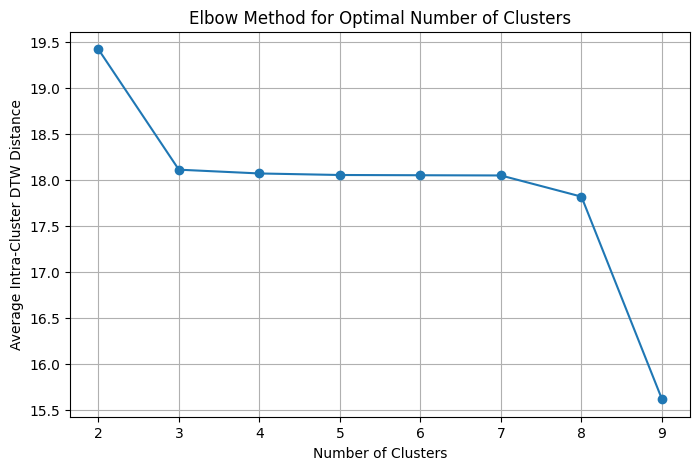

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

cluster_range = range(2, 10)
distortions = []

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, metric='precomputed', linkage='average')
    labels111 = model.fit_predict(distance_matrix_filtered)

    total_dist = 0
    count = 0
    for cluster_id in np.unique(labels):
        indices = np.where(labels111 == cluster_id)[0]
        if len(indices) <= 1:
            continue
        for i in indices:
            for j in indices:
                if i < j:
                    total_dist += distance_matrix_filtered[i][j]
                    count += 1
    avg_intra_dist = total_dist / count if count > 0 else 0
    distortions.append(avg_intra_dist)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, distortions, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Intra-Cluster DTW Distance")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters_new = 9

clustering_model_filtered = AgglomerativeClustering(
    n_clusters=n_clusters_new,
    metric='precomputed',
    linkage='average'
)
new_labels = clustering_model_filtered.fit_predict(distance_matrix_filtered)

df_T_filtered['Cluster'] = new_labels

In [ ]:
cluster_counts = df_T_filtered['Cluster'].value_counts().sort_index()
print(cluster_counts)

Cluster
0     26
1    201
2     50
3     69
4      3
5      1
6      1
7      1
8      9
Name: count, dtype: int64


Most clients were assigned to Cluster 0, while Clusters 1 and 3 had very few clients, which appeared to be outliers. To address this imbalance, we removed the clients in Clusters 1 and 3 and re-ran the clustering process on the remaining clients. Our goal was to achieve a more balanced distribution of clients across clusters. However, after applying the elbow method, the new optimal number of clusters appeared to be either 3 or 9. The resulting cluster distribution was still uneven and did not show a clear improvement over the original clustering. Because of this, we decided to keep the original clustering result with 5 clusters.

# Part 4: Add Temperature Feature to The Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("lisbon.csv", parse_dates=["date_time"])

start_date = "2011-01-01"
end_date = "2015-01-01"
filtered_df = df[(df["date_time"] >= start_date) & (df["date_time"] <= end_date)]

filtered_df = filtered_df[["date_time", "maxtempC", "mintempC"]]

filtered_df.to_csv("filtered_temperature.csv", index=False)

print("Filtered data saved as 'filtered_temperature.csv'")

Filtered data saved as 'filtered_temperature.csv'


In [ ]:
import pandas as pd

df_electricity = pd.read_csv("df_daily_modified.csv")
df_temperature = pd.read_csv("filtered_temperature.csv")

df_electricity["timestamp"] = pd.to_datetime(df_electricity["timestamp"])
df_temperature["date_time"] = pd.to_datetime(df_temperature["date_time"])

df_merged = df_electricity.merge(
    df_temperature,
    how="left",
    left_on="timestamp",
    right_on="date_time"
)

df_merged.drop(columns=["date_time"], inplace=True)

df_merged.drop(columns=["total_consumption"], inplace=True)

df_merged["avgtempC"] = (df_merged["maxtempC"] + df_merged["mintempC"]) / 2

df_merged.drop(columns=["maxtempC", "mintempC"], inplace=True)

df_temp_only = df_merged[["timestamp", "avgtempC"]]

df_temp_only.to_csv("avgtemp_only.csv", index=False)


## Part5: Model

### Single Time Series Model: Sarimax

Training SARIMAX for Cluster 0 with 5 users:


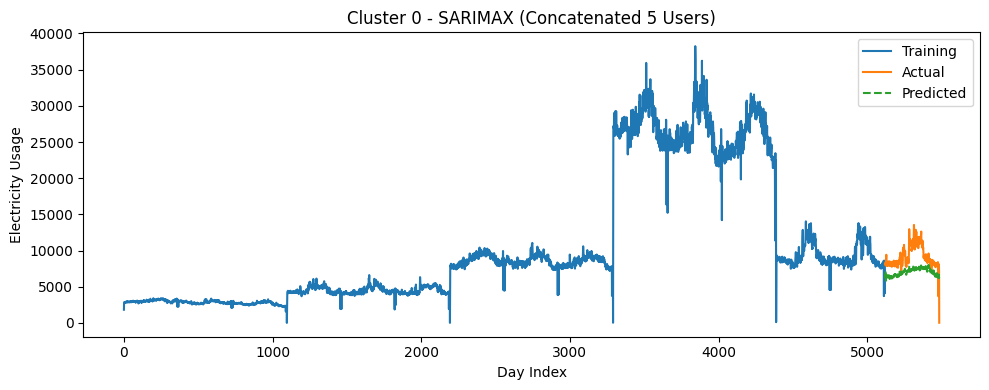

Training SARIMAX for Cluster 1 with 5 users:


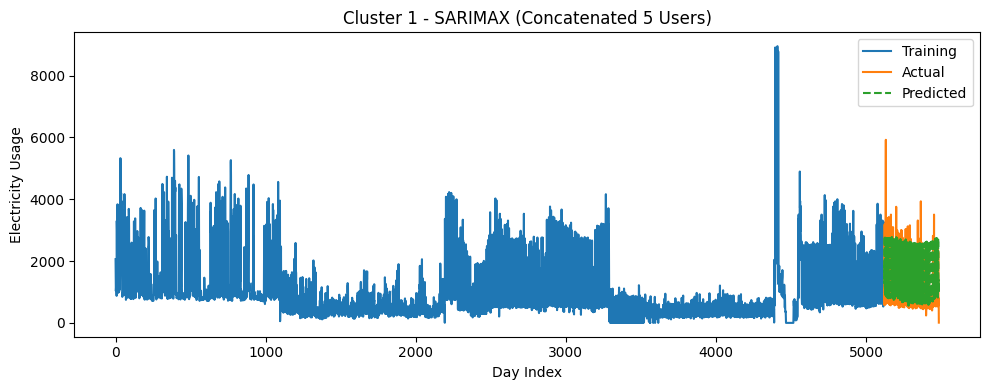

Training SARIMAX for Cluster 2 with 5 users:


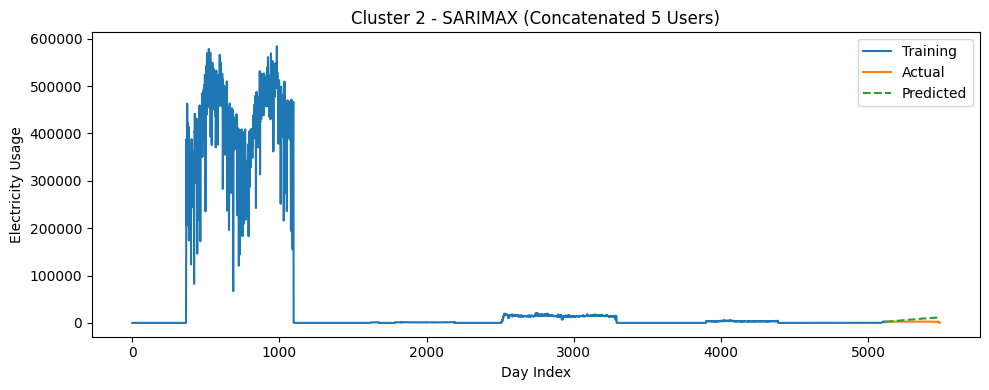

Training SARIMAX for Cluster 4 with 5 users:


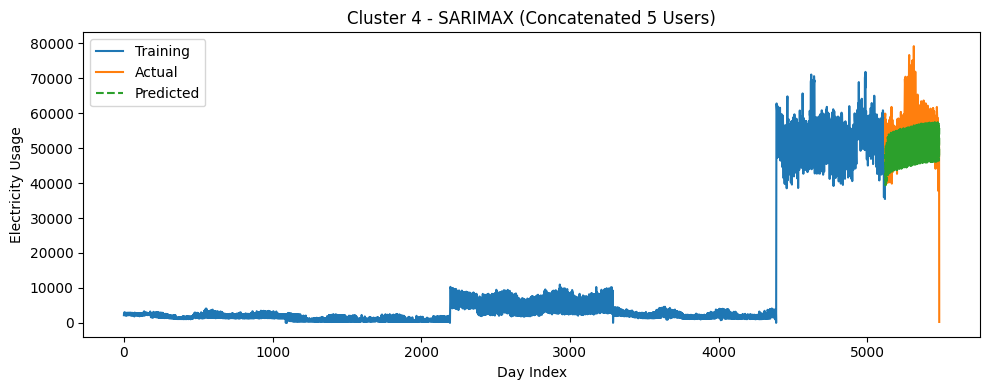


Cluster-Level Evaluation
Cluster 0 (users: 5): RMSE = 2468.21, MAE = 2207.69, MAPE = 72.40%
Cluster 1 (users: 5): RMSE = 627.67, MAE = 398.87, MAPE = 75.18%
Cluster 2 (users: 5): RMSE = 5383.02, MAE = 4645.42, MAPE = 426.93%
Cluster 4 (users: 5): RMSE = 9422.94, MAE = 7043.89, MAPE = 67.70%

Average MAPE across clusters: 160.55%


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("electricity_with_avgtemp.csv")
clusters = pd.read_csv("client_clusters.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
exog = df[['avgtempC']]
client_cluster_map = clusters.set_index('Client')['Cluster'].to_dict()

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None))) * 100

limited_concat_metrics = {}
limited_concat_results = {}

for cluster_id in [0, 1, 2, 4]:
    # at most 5 clients per cluster
    cluster_clients = [client for client, cid in client_cluster_map.items() if cid == cluster_id]
    cluster_clients = [c for c in cluster_clients if c in df.columns]
    selected_clients = cluster_clients[:5] if len(cluster_clients) >= 5 else cluster_clients

    # connect train data
    user_series_list = []
    exog_series_list = []
    for client in selected_clients:
        user_series_list.append(df[client])
        exog_series_list.append(exog.copy())

    concat_y = pd.concat(user_series_list).reset_index(drop=True)
    concat_exog = pd.concat(exog_series_list).reset_index(drop=True)

    # test the last 1 year data
    test_days = 365
    train_days = len(concat_y) - test_days

    y_train = concat_y[:train_days]
    y_test = concat_y[train_days:]
    exog_train = concat_exog[:train_days]
    exog_test = concat_exog[train_days:]

    print(f"Training SARIMAX for Cluster {cluster_id} with {len(selected_clients)} users:")

    model = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,7), exog=exog_train)
    result = model.fit(disp=False)
    limited_concat_results[cluster_id] = result

    # predict
    y_pred = result.forecast(steps=test_days, exog=exog_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    limited_concat_metrics[cluster_id] = {
        'Users': len(selected_clients),
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

    plt.figure(figsize=(10, 4))
    plt.plot(range(len(y_train)), y_train.values, label='Training')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test.values, label='Actual')
    plt.plot(range(len(y_train), len(y_train) + len(y_pred)), y_pred.values, label='Predicted', linestyle='--')
    plt.title(f'Cluster {cluster_id} - SARIMAX (Concatenated {len(selected_clients)} Users)')
    plt.xlabel('Day Index')
    plt.ylabel('Electricity Usage')
    plt.legend()
    plt.tight_layout()
    plt.show()


print("\nCluster-Level Evaluation")
for cid, metrics in limited_concat_metrics.items():
    print(f"Cluster {cid} (users: {metrics['Users']}): RMSE = {metrics['RMSE']:.2f}, "
          f"MAE = {metrics['MAE']:.2f}, MAPE = {metrics['MAPE']:.2f}%")

avg_mape = np.mean([metrics['MAPE'] for metrics in limited_concat_metrics.values()])
print(f"\nAverage MAPE across clusters: {avg_mape:.2f}%")


### LSTM: Long Short-Term Memory

In [ ]:
import pandas as pd

df = pd.read_csv("df_daily_modified.csv")  # Or your actual
df = df.drop(columns=["MT_178"])
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

# Extract client columns (assuming they start with "MT_")
client_columns = [col for col in df.columns if col.startswith("MT_")]

# Create the series_dict with trimmed leading zeros
series_dict = {}
for col in client_columns:
    series = df[col]

    # Find the first non-zero index
    first_non_zero_idx = series.ne(0).idxmax()

    # Trim the series
    trimmed_series = series.loc[first_non_zero_idx:]

    # Store in the dictionary
    series_dict[col] = trimmed_series

In [ ]:
import numpy as np

# Assume series_dict is already defined
# Each key is a client ID (e.g., 'MT_001') and value is a pandas Series with datetime index

exog_dict = {}

for client_id, series in series_dict.items():
    date_index = series.index

    # Day of week (0 = Monday, 6 = Sunday)
    day_of_week = date_index.dayofweek
    sin_dow = np.sin(2 * np.pi * day_of_week / 7)
    cos_dow = np.cos(2 * np.pi * day_of_week / 7)

    # Day of year (1 to 365/366)
    day_of_year = date_index.dayofyear
    sin_doy = np.sin(2 * np.pi * day_of_year / 365)
    cos_doy = np.cos(2 * np.pi * day_of_year / 365)

    # Create DataFrame of cyclical features
    exog_df = pd.DataFrame({
        'sin_dow': sin_dow,
        'cos_dow': cos_dow,
        'sin_doy': sin_doy,
        'cos_doy': cos_doy
    }, index=date_index)

    # Store in dictionary
    exog_dict[client_id] = exog_df


In [ ]:
# Assume avg_temp_df is a DataFrame with 'timestamp' and 'avg_temp' columns
avg_temp_df = pd.read_csv("avgtemp_only.csv", parse_dates=["timestamp"])
avg_temp_df = avg_temp_df.set_index("timestamp")

# Ensure it has the same frequency as series_dict
avg_temp_df = avg_temp_df.asfreq("D").fillna(method="ffill")  # Fill missing values
for client_id in exog_dict.keys():
    # Add average temperature
    exog_dict[client_id]["avg_temp"] = avg_temp_df["avgtempC"]


cluster_df = pd.read_csv("client_clusters.csv")

# Iterate over all clients
for client_id in series_dict.keys():

    # Get existing exog_df
    if client_id in exog_dict:
        exog_df = exog_dict[client_id]
    else:
        # If no exog_df exists, initialize one with the same index as the time series
        exog_df = pd.DataFrame(index=series_dict[client_id].index)

    # Add cluster information if the client exists in cluster_df
    if client_id in cluster_df["Client"].values:
        cluster_label = cluster_df.loc[cluster_df["Client"] == client_id, "Cluster"].values[0]
        # Assign cluster using index alignment to preserve timestamps
        exog_df["Cluster"] = cluster_label

    # Update the dictionary (now just updating, not overwriting other features)
    exog_dict[client_id]["Cluster"] = exog_df["Cluster"]


In [ ]:
split_date = pd.Timestamp("2014-08-01")

series_dict_train = {}
series_dict_test = {}
exog_dict_train = {}
exog_dict_test = {}

for client_id, series in series_dict.items():
    # Ensure DatetimeIndex
    series.index = pd.to_datetime(series.index)
    series = series.sort_index()  # Ensure chronological order

    # Split by date
    series_train = series.loc[series.index < split_date]
    series_test = series.loc[series.index >= split_date]

    # Set frequency (daily)
    series_train = series_train.asfreq('D')
    series_test = series_test.asfreq('D')

    series_dict_train[client_id] = series_train
    series_dict_test[client_id] = series_test

    # Handle exogenous features
    if client_id in exog_dict:
        exog_series = exog_dict[client_id]
        exog_series.index = pd.to_datetime(exog_series.index)
        exog_series = exog_series.sort_index()

        # Train/test split using date
        exog_train = exog_series.loc[exog_series.index < split_date]
        exog_test_raw = exog_series.loc[exog_series.index >= split_date]

        # Set frequency on training
        exog_train = exog_train.asfreq('D')

        # Reindex exog_test to future dates for prediction
        last_train_date = series_train.index[-1]
        forecast_steps = len(series_test)
        future_index = pd.date_range(start=last_train_date + pd.Timedelta(days=1),
                                     periods=forecast_steps, freq='D')
        exog_test = exog_test_raw.copy()
        exog_test.index = future_index
        exog_test = exog_test.asfreq('D')

        # Final checks
        assert isinstance(exog_train.index, pd.DatetimeIndex)
        assert isinstance(exog_test.index, pd.DatetimeIndex)
        assert exog_train.index.freq is not None
        assert exog_test.index.freq is not None

        exog_dict_train[client_id] = exog_train
        exog_dict_test[client_id] = exog_test


In [ ]:
!pip install skforecast
!pip install pytorch-forecasting --quiet

In [ ]:
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.models import RecurrentNetwork
from pytorch_forecasting.metrics import SMAPE
from lightning.pytorch import Trainer

In [ ]:
import pandas as pd

df_list = []

for level, series in series_dict_train.items():
    # Get corresponding exogenous DataFrame
    exog = exog_dict_train[level].copy()

    temp_df = pd.DataFrame({
        "time_idx": range(len(series)),
        "target": series.values,
        "group_id": level
    })

    # Add timestamp to align with exogenous features
    temp_df["time"] = series.index
    exog["time"] = exog.index
    exog["group_id"] = level

    # Merge target series with exogenous features
    merged_df = pd.merge(temp_df, exog, on=["time", "group_id"])

    df_list.append(merged_df)

# Combine all groups
df_train = pd.concat(df_list).reset_index(drop=True)

# Optional: make sure group_id is categorical
df_train["group_id"] = df_train["group_id"].astype("category")

df_train.head()


In [ ]:
from pytorch_forecasting import TimeSeriesDataSet, RecurrentNetwork
from pytorch_forecasting.metrics import SMAPE
from lightning.pytorch import Trainer
import torch

max_encoder_length = 30
max_prediction_length = 24

training = TimeSeriesDataSet(
    df_train,  # this should include all time series + exog columns
    time_idx="time_idx",
    target="target",
    group_ids=["group_id"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,

    # 👇 now we explicitly tell it these are the known inputs at each time step
    time_varying_known_reals=[
        "time_idx", "sin_dow", "cos_dow", "sin_doy", "cos_doy", "avg_temp", "Cluster"
    ],

    time_varying_unknown_reals=["target"],
    static_categoricals=["group_id"],
)

# Create dataloader
train_dataloader = training.to_dataloader(train=True, batch_size=64)
val_dataloader = training.to_dataloader(train=False, batch_size=64)

# Define the LSTM model (RecurrentNetwork)
lstm = RecurrentNetwork.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    cell_type="LSTM",
    dropout=0.1,
    loss=SMAPE(),
)

# Optional: see number of parameters
print(f"Total parameters: {sum(p.numel() for p in lstm.parameters())}")

# Train the model
trainer = Trainer(max_epochs=10, gradient_clip_val=0.1)
trainer.fit(
    lstm,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)

In [ ]:
df_test_list = []
for level, series in series_dict_test.items():
    temp_df = pd.DataFrame({
        "time": series.index,  # keep original timestamps for later
        "time_idx": range(len(series)),  # will be aligned later
        "target": series.values,
        "group_id": level
    })
    df_test_list.append(temp_df)

df_test = pd.concat(df_test_list).reset_index(drop=True)


exog_test_list = []
for level, df in exog_dict_test.items():
    temp_exog = df.copy()
    temp_exog["time"] = df.index
    temp_exog["group_id"] = level
    exog_test_list.append(temp_exog)

df_exog_test = pd.concat(exog_test_list).reset_index(drop=True)


df_test_full = pd.merge(df_test, df_exog_test, on=["group_id", "time"])


test_dataset = TimeSeriesDataSet(
    df_test_full,
    time_idx="time_idx",
    target="target",
    group_ids=["group_id"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_unknown_reals=["target"],
    time_varying_known_reals=["time_idx", "sin_dow", "cos_dow", "sin_doy", "cos_doy", "avg_temp", "Cluster"],
    static_categoricals=["group_id"],
)

test_dataloader = test_dataset.to_dataloader(train=False, batch_size=64)
predictions = lstm.predict(test_dataloader, return_x=True)

In [ ]:
n_groups = 369
y_pred_all = predictions.output.view(n_groups, -1, max_prediction_length)
y_pred_final = y_pred_all[:, -1, :]  # shape = [369, 24]
y_pred_final


import torch

# Sort and get first 24 rows per group
df_sorted = df_test_full.sort_values(by=["group_id", "time_idx"])
df_first_24 = df_sorted.groupby("group_id").head(24)

# Extract and convert to tensor
y_true = torch.tensor(df_first_24["target"].values, dtype=torch.float)

# Reshape to match y_pred
y_true = y_true.reshape(-1, 24)

In [ ]:
from pytorch_forecasting.metrics import MAPE

mape = MAPE()

# Flatten both tensors
y_pred_flat = y_pred_final.flatten()
y_true_flat = y_true.flatten()

# Create mask
mask = y_true_flat != 0

# Compute MAPE
# Manually compute MAPE while avoiding division by zero
mape_score = ((y_true_flat[mask] - y_pred_flat[mask]).abs() / y_true_flat[mask].abs()).mean() * 100
print(f"MAPE (excluding zeros): {mape_score:.2f}%")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Convert tensors to numpy
y_pred_np = y_pred_final.detach().cpu().numpy()
y_true_np = y_true.detach().cpu().numpy()

# Match client ID order
client_ids = list(series_dict_test.keys())
prediction_length = y_pred_np.shape[1]

# Select a few clients to plot
selected_clients = client_ids[:4]  # change this to other IDs if needed

# Plot
fig, axes = plt.subplots(len(selected_clients), 1, figsize=(12, 12), sharex=True)
fig.suptitle("Electricity Consumption: Actual vs Predicted with Training History", fontsize=14, y=1.02)

for i, client_id in enumerate(selected_clients):
    client_index = client_ids.index(client_id)

    # Get training and test series (pandas Series with DatetimeIndex)
    train_series = series_dict_train[client_id]
    test_series = series_dict_test[client_id]

    # Forecast values and corresponding dates
    forecast_dates = pd.date_range(start=test_series.index[0], periods=prediction_length, freq='D')
    y_pred = y_pred_np[client_index]
    y_true = y_true_np[client_index]

    # Plot
    axes[i].plot(train_series.index, train_series.values, label="Training", color="gray")
    axes[i].plot(test_series.index[:prediction_length], y_true, label="Actual", color="blue")
    axes[i].plot(test_series.index[:prediction_length], y_pred, label="Predicted", linestyle='--', color="orange")
    axes[i].set_title(f"Client {client_id}")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


### Multi-time series Model: HistGriadentBoost Model

In [ ]:
# cancel zero
# df = pd.read_csv("df_daily_modified.csv")  # Or your actual path
# df["timestamp"] = pd.to_datetime(df["timestamp"])
# df = df.set_index("timestamp")

# # extract client columns (assuming they start with "MT_")
# client_columns = [col for col in df.columns if col.startswith("MT_")]
# # create the series_dict with trimmed leading zeros
# series_dict = {}
# for col in client_columns:
#     series = df[col]
#     # find the first non-zero index
#     first_non_zero_idx = series.ne(0).idxmax()
#     # trim the series
#     trimmed_series = series.loc[first_non_zero_idx:]
#     # store in the dictionary
#     series_dict[col] = trimmed_series

In [ ]:
import pandas as pd

df = pd.read_csv("df_daily_modified.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

client_columns = [col for col in df.columns if col.startswith("MT_")]
series_dict = {}

for col in client_columns:
    series = df[col]
    series_dict[col] = series

In [ ]:
# Assume series_dict is already defined
# Each key is a client ID (e.g., 'MT_001') and value is a pandas Series with datetime index

exog_dict = {}

for client_id, series in series_dict.items():
    date_index = series.index

    # Day of week (0 = Monday, 6 = Sunday)
    day_of_week = date_index.dayofweek
    sin_dow = np.sin(2 * np.pi * day_of_week / 7)
    cos_dow = np.cos(2 * np.pi * day_of_week / 7)

    # Day of year (1 to 365/366)
    day_of_year = date_index.dayofyear
    sin_doy = np.sin(2 * np.pi * day_of_year / 365)
    cos_doy = np.cos(2 * np.pi * day_of_year / 365)

    # Create DataFrame of cyclical features
    exog_df = pd.DataFrame({
        'sin_dow': sin_dow,
        'cos_dow': cos_dow,
        'sin_doy': sin_doy,
        'cos_doy': cos_doy
    }, index=date_index)

    # store in dictionary
    exog_dict[client_id] = exog_df

In [ ]:
# assume avg_temp_df is a DataFrame with 'timestamp' and 'avg_temp' columns
avg_temp_df = pd.read_csv("avgtemp_only.csv", parse_dates=["timestamp"])
avg_temp_df = avg_temp_df.set_index("timestamp")

# ensure it has the same frequency as series_dict
avg_temp_df = avg_temp_df.asfreq("D").fillna(method="ffill")  # Fill missing values

for client_id in exog_dict.keys():
    # add average temperature
    exog_dict[client_id]["avg_temp"] = avg_temp_df["avgtempC"]

<ipython-input-23-418877e6165e>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  avg_temp_df = avg_temp_df.asfreq("D").fillna(method="ffill")  # Fill missing values


In [ ]:
cluster_df = pd.read_csv("client_clusters.csv")

for client_id in series_dict.keys():
    if client_id in exog_dict:
        exog_df = exog_dict[client_id]
    else:
        # if no exog_df exists, initialize one with the same index as the time series
        exog_df = pd.DataFrame(index=series_dict[client_id].index)

    # add cluster information if the client exists in cluster_df
    if client_id in cluster_df["Client"].values:
        cluster_label = cluster_df.loc[cluster_df["Client"] == client_id, "Cluster"].values[0]
        exog_df["Cluster"] = cluster_label

    exog_dict[client_id]["Cluster"] = exog_df["Cluster"]

In [ ]:
print(exog_dict['MT_006'])

             sin_dow   cos_dow       sin_doy   cos_doy  avg_temp  Cluster
timestamp                                                                
2012-01-01 -0.781831  0.623490  1.721336e-02  0.999852      12.0        0
2012-01-02  0.000000  1.000000  3.442161e-02  0.999407      13.0        0
2012-01-03  0.781831  0.623490  5.161967e-02  0.998667      10.5        0
2012-01-04  0.974928 -0.222521  6.880243e-02  0.997630      13.5        0
2012-01-05  0.433884 -0.900969  8.596480e-02  0.996298      12.5        0
...              ...       ...           ...       ...       ...      ...
2014-12-28 -0.781831  0.623490 -5.161967e-02  0.998667      13.0        0
2014-12-29  0.000000  1.000000 -3.442161e-02  0.999407       9.0        0
2014-12-30  0.781831  0.623490 -1.721336e-02  0.999852       8.0        0
2014-12-31  0.974928 -0.222521  6.432491e-16  1.000000       8.5        0
2015-01-01  0.433884 -0.900969  1.721336e-02  0.999852      11.0        0

[1097 rows x 6 columns]


In [ ]:
print(exog_dict['MT_288'])

             sin_dow   cos_dow       sin_doy   cos_doy  avg_temp  Cluster
timestamp                                                                
2012-01-01 -0.781831  0.623490  1.721336e-02  0.999852      12.0        2
2012-01-02  0.000000  1.000000  3.442161e-02  0.999407      13.0        2
2012-01-03  0.781831  0.623490  5.161967e-02  0.998667      10.5        2
2012-01-04  0.974928 -0.222521  6.880243e-02  0.997630      13.5        2
2012-01-05  0.433884 -0.900969  8.596480e-02  0.996298      12.5        2
...              ...       ...           ...       ...       ...      ...
2014-12-28 -0.781831  0.623490 -5.161967e-02  0.998667      13.0        2
2014-12-29  0.000000  1.000000 -3.442161e-02  0.999407       9.0        2
2014-12-30  0.781831  0.623490 -1.721336e-02  0.999852       8.0        2
2014-12-31  0.974928 -0.222521  6.432491e-16  1.000000       8.5        2
2015-01-01  0.433884 -0.900969  1.721336e-02  0.999852      11.0        2

[1097 rows x 6 columns]


In [ ]:
train_start = pd.to_datetime('2012-01-01')
train_end   = pd.to_datetime('2013-12-31')

test_start  = pd.to_datetime('2014-01-01')
test_end    = pd.to_datetime('2014-12-31')

series_dict_train = {}
series_dict_test = {}
exog_dict_train = {}
exog_dict_test = {}

for client_id, series in series_dict.items():
    # make sure datetime index
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)

    series_train = series.loc[(series.index >= train_start) & (series.index <= train_end)]
    series_test  = series.loc[(series.index >= test_start) & (series.index <= test_end)]

    series_train = series_train.asfreq('D', fill_value=np.nan)
    series_test  = series_test.asfreq('D', fill_value=np.nan)

    series_dict_train[client_id] = series_train
    series_dict_test[client_id]  = series_test

    # exogenous features
    if client_id in exog_dict:
        exog = exog_dict[client_id]
        if not isinstance(exog.index, pd.DatetimeIndex):
            exog.index = pd.to_datetime(exog.index)

        exog_train = exog.loc[(exog.index >= train_start) & (exog.index <= train_end)]
        exog_test  = exog.loc[(exog.index >= test_start) & (exog.index <= test_end)]

        exog_train = exog_train.asfreq('D', fill_value=np.nan)
        exog_test  = exog_test.asfreq('D', fill_value=np.nan)

        exog_dict_train[client_id] = exog_train
        exog_dict_test[client_id]  = exog_test

In [ ]:
# !pip install skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 23.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from skforecast.recursive import ForecasterRecursiveMultiSeries
from skforecast.preprocessing import RollingFeatures

regressor = HistGradientBoostingRegressor(random_state=123, max_depth=5)
rolling_feats = rolling_features = RollingFeatures(
            stats=['mean', 'std', 'median', 'min', 'max'],
            window_sizes=[7, 7, 7, 7, 7]  # must match length of stats
)

forecaster = ForecasterRecursiveMultiSeries(
    regressor=regressor,
    lags=14,
    window_features=rolling_feats,
    encoding="ordinal",
    dropna_from_series=False
)

# train model
forecaster.fit(
    series=series_dict_train,
    exog=exog_dict_train,
    suppress_warnings=True
)

In [ ]:
test_length = len(next(iter(series_dict_test.values())))
forecast = forecaster.predict(steps=test_length, exog=exog_dict_test)

In [ ]:
records = []

for client_id in forecast['level'].unique():
    forecast_client = forecast[forecast['level'] == client_id]
    y_pred = forecast_client['pred'].values
    forecast_dates = forecast_client.index

    y_true_series = series_dict_test.get(client_id)
    if y_true_series is None:
        continue

    y_true = y_true_series.loc[forecast_dates].values

    for date, pred, true in zip(forecast_dates, y_pred, y_true):
        records.append({
            'client_id': client_id,
            'date': date,
            'prediction': pred,
            'true_value': true
        })

results_df = pd.DataFrame(records)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from skforecast.preprocessing import RollingFeatures
from skforecast.recursive import ForecasterRecursiveMultiSeries
from skforecast.model_selection import grid_search_forecaster_multiseries
import warnings
warnings.filterwarnings("ignore")

class ElectricityConsumptionForecaster:
    """
    A forecasting system for electricity consumption data across multiple clients
    using a global model approach with clustering.
    """

    def __init__(self, n_test_days=30):
        """
        Initialize the forecaster.

        Parameters:
        -----------
        n_test_days : int
            Number of days to use for testing/validation
        """
        self.n_test_days = n_test_days
        self.series_dict = None
        self.exog_dict = None
        self.series_dict_train = None
        self.series_dict_test = None
        self.exog_dict_train = None
        self.exog_dict_test = None
        self.forecaster = None
        self.forecast_results = None
        self.validation_results = None

    def load_data(self, df_path, temp_path=None, cluster_path=None):
        """
        Load the data and create the series_dict and exog_dict

        Parameters:
        -----------
        df_path : str
            Path to the daily electricity consumption data
        temp_path : str, optional
            Path to temperature data
        cluster_path : str, optional
            Path to cluster assignments for clients
        """
        # Load data
        df = pd.read_csv(df_path)
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df = df.set_index("timestamp")

        # Extract client columns (assuming they start with "MT_")
        client_columns = [col for col in df.columns if col.startswith("MT_")]

        self.series_dict = {}
        for col in client_columns:
            series = df[col]

            # Find the first non-zero index
            try:
                first_non_zero_idx = series.ne(0).idxmax()
                trimmed_series = series.loc[first_non_zero_idx:]
                trimmed_series = trimmed_series.asfreq('D')

                self.series_dict[col] = trimmed_series
            except:
                continue

        self.exog_dict = {}

        for client_id, series in self.series_dict.items():
            date_index = series.index

            # Day of week (0 = Monday, 6 = Sunday)
            day_of_week = date_index.dayofweek
            sin_dow = np.sin(2 * np.pi * day_of_week / 7)
            cos_dow = np.cos(2 * np.pi * day_of_week / 7)

            # Day of year (1 to 365/366)
            day_of_year = date_index.dayofyear
            sin_doy = np.sin(2 * np.pi * day_of_year / 365)
            cos_doy = np.cos(2 * np.pi * day_of_year / 365)

            # Create DataFrame of cyclical features
            exog_df = pd.DataFrame({
                'sin_dow': sin_dow,
                'cos_dow': cos_dow,
                'sin_doy': sin_doy,
                'cos_doy': cos_doy
            }, index=date_index)
            exog_df = exog_df.asfreq('D')
            self.exog_dict[client_id] = exog_df


        if temp_path:
            try:
                avg_temp_df = pd.read_csv(temp_path, parse_dates=["timestamp"])
                avg_temp_df = avg_temp_df.set_index("timestamp")

                avg_temp_df = avg_temp_df.asfreq("D").fillna(method="ffill")

                for client_id in self.exog_dict.keys():
                    self.exog_dict[client_id]["avg_temp"] = avg_temp_df["avgtempC"]
            except Exception as e:
                print(f"Warning: Could not load temperature data: {e}")

        if cluster_path:
            try:
                cluster_df = pd.read_csv(cluster_path)

                for client_id in self.series_dict.keys():
                    if client_id in self.exog_dict:
                        exog_df = self.exog_dict[client_id]
                    else:
                        exog_df = pd.DataFrame(index=self.series_dict[client_id].index)
                        exog_df = exog_df.asfreq('D')  # Ensure frequency

                    if client_id in cluster_df["Client"].values:
                        cluster_label = cluster_df.loc[cluster_df["Client"] == client_id, "Cluster"].values[0]
                        # Assign cluster using index alignment to preserve timestamps
                        exog_df["Cluster"] = cluster_label
                    self.exog_dict[client_id] = exog_df
            except Exception as e:
                print(f"Warning: Could not load cluster data: {e}")

    def train_test_split(self, test_ratio=0.2):
        """
        Split the data into training and testing sets

        Parameters:
        -----------
        test_ratio : float
            Ratio of the data to use for testing
        """
        self.series_dict_train = {}
        self.series_dict_test = {}
        self.exog_dict_train = {}
        self.exog_dict_test = {}

        for client_id, series in self.series_dict.items():
            if not isinstance(series.index, pd.DatetimeIndex):
                series.index = pd.to_datetime(series.index)

            # Make sure the series has a frequency
            if series.index.freq is None:
                series = series.asfreq('D')
            split_idx = int(len(series) * (1 - test_ratio))
            series_train = series.iloc[:split_idx].copy()
            series_test = series.iloc[split_idx:].copy()

            # Set frequency on both train and test series
            series_train = series_train.asfreq('D')
            series_test = series_test.asfreq('D')

            self.series_dict_train[client_id] = series_train
            self.series_dict_test[client_id] = series_test

            if client_id in self.exog_dict:
                exog_series = self.exog_dict[client_id]
                if not isinstance(exog_series.index, pd.DatetimeIndex):
                    exog_series.index = pd.to_datetime(exog_series.index)

                if exog_series.index.freq is None:
                    exog_series = exog_series.asfreq('D')

                exog_train = exog_series.iloc[:split_idx].copy()
                exog_test = exog_series.iloc[split_idx:].copy()

                exog_train = exog_train.asfreq('D')
                exog_test = exog_test.asfreq('D')

                last_date = series_train.index[-1]
                steps = len(exog_test)
                future_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                            periods=steps, freq='D')
                exog_test.index = future_index

                self.exog_dict_train[client_id] = exog_train
                self.exog_dict_test[client_id] = exog_test

    def build_model(self):
        """Build the forecasting model based on HistGradientBoostingRegressor"""
        # define rolling window features
        rolling_features = RollingFeatures(
            stats=['mean', 'std', 'median', 'min', 'max', 'ratio_min_max', 'coef_variation'],
            window_sizes=[7, 7, 7, 14, 14, 14, 14]  # must match length of stats
        )

        self.forecaster = ForecasterRecursiveMultiSeries(
            regressor=HistGradientBoostingRegressor(
                learning_rate=0.1,
                max_depth=5,
                min_samples_leaf=20,
                max_iter=200,
                random_state=42
            ),
            window_features=rolling_features,
            encoding="ordinal"
        )
        self.forecaster.dropna_from_series = True

    def train_model(self):
        """Train the model on the training data"""
        if self.forecaster is None:
            self.build_model()

        print("Training model...")
        self.forecaster.fit(series=self.series_dict_train, exog=self.exog_dict_train)
        print("Model training complete.")

    def forecast(self, steps=90):
        """
        Generate forecasts for all clients

        Parameters:
        -----------
        steps : int
            Number of days to forecast

        Returns:
        --------
        DataFrame with forecasts
        """
        print(f"Forecasting {steps} steps ahead...")

        aligned_exog_dict = {}

        for client_id in self.exog_dict_test:
            if client_id in self.series_dict_train:
                last_date = self.series_dict_train[client_id].index[-1]

                future_index = pd.date_range(
                    start=last_date + pd.Timedelta(days=1),
                    periods=steps,
                    freq='D'
                )

                # if the existing exog data is too short, we need to extend it
                if len(self.exog_dict_test[client_id]) < steps:
                    # create extended features for the entire future period
                    # for time-based features (day of week, day of year)
                    day_of_week = future_index.dayofweek
                    sin_dow = np.sin(2 * np.pi * day_of_week / 7)
                    cos_dow = np.cos(2 * np.pi * day_of_week / 7)

                    day_of_year = future_index.dayofyear
                    sin_doy = np.sin(2 * np.pi * day_of_year / 365)
                    cos_doy = np.cos(2 * np.pi * day_of_year / 365)

                    exog_df = pd.DataFrame({
                        'sin_dow': sin_dow,
                        'cos_dow': cos_dow,
                        'sin_doy': sin_doy,
                        'cos_doy': cos_doy
                    }, index=future_index)

                    exog_df = exog_df.asfreq('D')

                    existing_exog = self.exog_dict_test[client_id]
                    for col in existing_exog.columns:
                        if col not in exog_df.columns:
                            if col == 'Cluster' and 'Cluster' in existing_exog.columns:
                                # For cluster column, use the same cluster value for all future dates
                                exog_df['Cluster'] = existing_exog['Cluster'].iloc[0]
                            elif col == 'avg_temp' and 'avg_temp' in existing_exog.columns:
                                exog_df['avg_temp'] = existing_exog['avg_temp'].mean()
                            else:
                                # for other columns, just forward-fill
                                try:
                                    # take data from existing exog where available
                                    overlap_idx = future_index.isin(existing_exog.index)
                                    if any(overlap_idx):
                                        # Use actual values for overlapping indices
                                        exog_df.loc[overlap_idx, col] = existing_exog.loc[future_index[overlap_idx], col].values

                                    # Fill the rest with the last available value
                                    exog_df[col] = exog_df[col].fillna(method='ffill')

                                    # If still NaN (e.g., all values are NaN), use the mean
                                    if exog_df[col].isna().any():
                                        if len(existing_exog[col].dropna()) > 0:
                                            exog_df[col] = exog_df[col].fillna(existing_exog[col].mean())
                                        else:
                                            exog_df[col] = exog_df[col].fillna(0)
                                except:
                                    # if any error occurs, just fill with zeros
                                    exog_df[col] = 0

                    aligned_exog_dict[client_id] = exog_df
                else:
                    # If existing exog data is long enough, just slice and align index
                    existing_exog = self.exog_dict_test[client_id]
                    aligned_exog = existing_exog.iloc[:steps].copy()
                    aligned_exog.index = future_index

                    aligned_exog = aligned_exog.asfreq('D')

                    aligned_exog_dict[client_id] = aligned_exog

        try:
            self.forecast_results = self.forecaster.predict(steps=steps, exog=aligned_exog_dict)
            print(f"Generated forecasts for {self.forecast_results['level'].nunique()} clients")
            return self.forecast_results
        except Exception as e:
            print(f"Error during forecasting: {str(e)}")
            print("Attempting to forecast without exogenous variables...")
            try:
                self.forecast_results = self.forecaster.predict(steps=steps)
                print(f"Generated forecasts for {self.forecast_results['level'].nunique()} clients")
                return self.forecast_results
            except Exception as e2:
                print(f"Forecasting without exogenous variables also failed: {str(e2)}")
                raise

    def validate_rolling_window(self, window_size=30, step=7, n_windows=4):
        """
        Perform rolling window validation on the model

        Parameters:
        -----------
        window_size : int
            Size of each validation window in days
        step : int
            Number of days to forecast in each window
        n_windows : int
            Number of validation windows to use

        Returns:
        --------
        tuple (metrics_df, forecasts_df, summary)
            metrics_df: DataFrame with validation metrics for each client and window
            forecasts_df: DataFrame with actual forecasts and errors
            summary: DataFrame with summary statistics across all windows
        """
        print(f"Performing rolling window validation with {n_windows} windows...")

        all_metrics = []
        all_forecasts = []

        for client_id, series in self.series_dict.items():
            # Skip if series is too short
            if len(series) < window_size + (n_windows * step):
                print(f"Skipping {client_id} - series too short")
                continue

            client_exog = self.exog_dict.get(client_id, None)

            # For each validation window
            for i in range(n_windows):
                # Calculate cutoff point for this window
                end_train = len(series) - window_size - (n_windows - i - 1) * step

                if end_train <= 0:
                    continue

                # Split data for this window
                train_data = series.iloc[:end_train]
                val_data = series.iloc[end_train:end_train + step]

                # Prepare exog data if available
                train_exog = None
                val_exog = None

                if client_exog is not None:
                    train_exog = client_exog.iloc[:end_train]

                    # Create future exog for validation period
                    last_date = train_data.index[-1]
                    future_index = pd.date_range(
                        start=last_date + pd.Timedelta(days=1),
                        periods=step,
                        freq='D'
                    )

                    # Either slice existing exog or create cyclical features
                    if end_train + step <= len(client_exog):
                        val_exog = client_exog.iloc[end_train:end_train + step].copy()
                        val_exog.index = future_index
                    else:
                        # Create cyclical features
                        day_of_week = future_index.dayofweek
                        sin_dow = np.sin(2 * np.pi * day_of_week / 7)
                        cos_dow = np.cos(2 * np.pi * day_of_week / 7)

                        day_of_year = future_index.dayofyear
                        sin_doy = np.sin(2 * np.pi * day_of_year / 365)
                        cos_doy = np.cos(2 * np.pi * day_of_year / 365)

                        val_exog = pd.DataFrame({
                            'sin_dow': sin_dow,
                            'cos_dow': cos_dow,
                            'sin_doy': sin_doy,
                            'cos_doy': cos_doy
                        }, index=future_index)

                        # Add any other columns from training exog
                        for col in train_exog.columns:
                            if col not in val_exog.columns:
                                val_exog[col] = train_exog[col].iloc[-1]  # Use last value

                # Train a model for this window
                window_forecaster = ForecasterRecursiveMultiSeries(
                    regressor=HistGradientBoostingRegressor(random_state=42),
                    window_features=RollingFeatures(
                        stats=['mean', 'std', 'median', 'min', 'max'],
                        window_sizes=[7, 7, 7, 14, 14]
                    ),
                    encoding="ordinal"
                )
                window_forecaster.dropna_from_series = True

                train_dict = {client_id: train_data}
                train_exog_dict = {client_id: train_exog} if train_exog is not None else None
                val_exog_dict = {client_id: val_exog} if val_exog is not None else None

                try:
                    window_forecaster.fit(series=train_dict, exog=train_exog_dict)
                    forecasts = window_forecaster.predict(steps=step, exog=val_exog_dict)
                    client_forecasts = forecasts[forecasts['level'] == client_id].copy()

                    client_forecasts['actual'] = val_data.values
                    client_forecasts['window'] = i
                    client_forecasts['client_id'] = client_id

                    # Calculate errors
                    client_forecasts['error'] = client_forecasts['actual'] - client_forecasts['pred']
                    client_forecasts['abs_error'] = np.abs(client_forecasts['error'])

                    # Calculate relative errors (avoiding division by zero)
                    non_zero_mask = client_forecasts['actual'] != 0
                    client_forecasts['rel_error'] = 0
                    if non_zero_mask.any():
                        client_forecasts.loc[non_zero_mask, 'rel_error'] = (
                            client_forecasts.loc[non_zero_mask, 'abs_error'] /
                            client_forecasts.loc[non_zero_mask, 'actual']
                        )

                    # Store results
                    all_forecasts.append(client_forecasts)

                    # Calculate metrics for this window
                    mae = client_forecasts['abs_error'].mean()
                    rmse = np.sqrt((client_forecasts['error'] ** 2).mean())
                    mape = client_forecasts.loc[non_zero_mask, 'rel_error'].mean() * 100 if non_zero_mask.any() else np.nan

                    all_metrics.append({
                        'client_id': client_id,
                        'window': i,
                        'mae': mae,
                        'rmse': rmse,
                        'mape': mape,
                        'start_date': val_data.index[0],
                        'end_date': val_data.index[-1]
                    })
                except Exception as e:
                    print(f"Error in window {i} for client {client_id}: {str(e)}")
                    continue

        if not all_metrics:
            print("No validation results produced. Check window sizes and data availability.")
            return None, None, None

        metrics_df = pd.DataFrame(all_metrics)
        forecasts_df = pd.concat(all_forecasts) if all_forecasts else pd.DataFrame()

        # Calculate summary statistics
        summary = metrics_df.groupby('client_id').agg({
            'mae': ['mean', 'std', 'min', 'max'],
            'rmse': ['mean', 'std', 'min', 'max'],
            'mape': ['mean', 'std', 'min', 'max']
        })

        # Store validation results
        self.validation_results = (metrics_df, forecasts_df, summary)

        print("Rolling window validation complete.")

        return metrics_df, forecasts_df, summary

    def tune_hyperparameters(self, param_grid=None):
        """
        Tune hyperparameters using grid search

        Parameters:
        -----------
        param_grid : dict
            Grid of parameters to search
        """
        if self.forecaster is None:
            self.build_model()

        if param_grid is None:
            param_grid = {
                'regressor__learning_rate': [0.01, 0.1],
                'regressor__max_depth': [3, 5, 8],
                'regressor__min_samples_leaf': [10, 20],
                'regressor__max_iter': [100, 200]
            }

        print("Tuning hyperparameters...")
        results_grid = grid_search_forecaster_multiseries(
            forecaster=self.forecaster,
            series=self.series_dict_train,
            exog=self.exog_dict_train,
            param_grid=param_grid,
            levels=list(self.series_dict_train.keys())[:5],  # Use only a few series for efficiency
            steps=7,
            metric='mean_absolute_error',
            refit=True,
            return_best=True,
            verbose=False
        )

        print("Best parameters:", self.forecaster.get_params())
        return results_grid

    def plot_forecasts(self, client_ids=None, n_clients=5, steps=None):
        """
        Plot forecasts for selected clients

        Parameters:
        -----------
        client_ids : list, optional
            List of client IDs to plot
        n_clients : int, optional
            Number of random clients to plot if client_ids not provided
        steps : int, optional
            Number of steps to plot

        Returns:
        --------
        matplotlib figure
        """
        if self.forecast_results is None:
            print("No forecasts available. Run forecast() method first.")
            return

        if client_ids is None:
            all_clients = self.forecast_results['level'].unique()
            client_ids = np.random.choice(all_clients, min(n_clients, len(all_clients)), replace=False)

        n_clients = len(client_ids)
        fig, axes = plt.subplots(n_clients, 1, figsize=(12, 3*n_clients), sharex=True)
        if n_clients == 1:
            axes = [axes]

        for i, client_id in enumerate(client_ids):
            ax = axes[i]

            # Plot actual values
            if client_id in self.series_dict:
                actual = self.series_dict[client_id]
                ax.plot(actual.index, actual.values, label='Actual', color='blue')

            # Plot forecasts
            client_forecasts = self.forecast_results[self.forecast_results['level'] == client_id]
            if steps is not None:
                client_forecasts = client_forecasts.iloc[:steps]

            ax.plot(client_forecasts.index, client_forecasts['pred'], label='Forecast', color='red')

            # Add vertical line at train/test split
            if client_id in self.series_dict_train:
                split_date = self.series_dict_train[client_id].index[-1]
                ax.axvline(x=split_date, color='black', linestyle='--')

            ax.set_title(f'Client {client_id}')
            ax.legend()

            ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

        plt.tight_layout()
        return fig

    def plot_validation_results(self, client_ids=None, n_clients=5, window=0):
        """
        Plot validation results for selected clients

        Parameters:
        -----------
        client_ids : list, optional
            List of client IDs to plot
        n_clients : int, optional
            Number of random clients to plot if client_ids not provided
        window : int, optional
            Specific validation window to plot

        Returns:
        --------
        matplotlib figure
        """
        if self.validation_results is None:
            print("No validation results available. Run validate_rolling_window() method first.")
            return

        _, forecasts_df, _ = self.validation_results

        if window is not None:
            window_forecasts = forecasts_df[forecasts_df['window'] == window]
        else:
            window_forecasts = forecasts_df

        available_clients = window_forecasts['client_id'].unique()

        if len(available_clients) == 0:
            print("No validation data available for plotting.")
            return

        if client_ids is None:
            client_ids = np.random.choice(available_clients, min(n_clients, len(available_clients)), replace=False)
        else:
            # Filter to only available clients
            client_ids = [c for c in client_ids if c in available_clients]
            if not client_ids:
                print("None of the requested clients have validation data.")
                return

        n_clients = len(client_ids)
        fig, axes = plt.subplots(n_clients, 1, figsize=(12, 3*n_clients), sharex=True)
        if n_clients == 1:
            axes = [axes]

        for i, client_id in enumerate(client_ids):
            ax = axes[i]

            # Get validation data for this client
            client_data = window_forecasts[window_forecasts['client_id'] == client_id]

            # Plot actual vs predicted
            ax.plot(client_data.index, client_data['actual'], label='Actual', color='blue')
            ax.plot(client_data.index, client_data['pred'], label='Predicted', color='red')

            # error bars
            ax.fill_between(
                client_data.index,
                client_data['pred'] - client_data['abs_error'],
                client_data['pred'] + client_data['abs_error'],
                color='red', alpha=0.2
            )

            ax.set_title(f'Client {client_id} - Window {window}')
            ax.legend()

            ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

        plt.tight_layout()
        return fig

    def evaluate_model(self):
        """
        Evaluate the model performance

        Returns:
        --------
        DataFrame with evaluation metrics
        """
        if self.validation_results is None:
            print("No validation results available. Run validate_rolling_window() method first.")
            return

        _, _, summary = self.validation_results

        flattened_summary = {}
        for client_id in summary.index:
            for metric in ['mae', 'rmse', 'mape']:
                for stat in ['mean', 'std', 'min', 'max']:
                    try:
                        value = summary.loc[client_id, (metric, stat)]
                        flattened_summary[f"{client_id}_{metric}_{stat}"] = value
                    except:
                        flattened_summary[f"{client_id}_{metric}_{stat}"] = None

        flattened_df = pd.DataFrame([flattened_summary])

        metrics_df, _, _ = self.validation_results
        overall_stats = {
            'overall_mae_mean': metrics_df['mae'].mean(),
            'overall_mae_median': metrics_df['mae'].median(),
            'overall_rmse_mean': metrics_df['rmse'].mean(),
            'overall_rmse_median': metrics_df['rmse'].median(),
            'overall_mape_mean': metrics_df['mape'].mean(),
            'overall_mape_median': metrics_df['mape'].median(),
        }

        for key, value in overall_stats.items():
            flattened_df[key] = value

        return flattened_df

In [ ]:
# Initialize forecaster
forecaster = ElectricityConsumptionForecaster()

# Load data
forecaster.load_data(
    df_path="df_daily_modified.csv",
    temp_path="avgtemp_only.csv",
    cluster_path="client_clusters.csv"
)

# Remove client MT_178 from all relevant dictionaries
client_to_drop = 'MT_178'

# Drop from series_dict if it exists
if client_to_drop in forecaster.series_dict:
    del forecaster.series_dict[client_to_drop]
    print(f"Dropped {client_to_drop} from series_dict")

# Drop from exog_dict if it exists
if client_to_drop in forecaster.exog_dict:
    del forecaster.exog_dict[client_to_drop]
    print(f"Dropped {client_to_drop} from exog_dict")

# Split data
forecaster.train_test_split(test_ratio=0.2)

# Build and train model
forecaster.build_model()
forecaster.train_model()

# Use rolling window validation
metrics_df, forecasts_df, summary = forecaster.validate_rolling_window(
    window_size=30,  # 30-day validation windows
    step=7,          # Forecast 7 days at a time
    n_windows=4      # Use 4 different validation windows
)

# Print validation summary
print("\nValidation Summary:")
print(summary)

# Save the validation summary to a variable named metrics
metrics = summary.copy()

# Also save the detailed metrics and forecasts to CSV files for later use
metrics_df.to_csv("validation_metrics.csv")
forecasts_df.to_csv("validation_forecasts.csv")

# Generate forecasts for future periods
future_forecasts = forecaster.forecast(steps=90)

# Plot forecasts
fig = forecaster.plot_forecasts(n_clients=3)
plt.savefig("forecasts.png")
plt.close()

# Plot validation results for the first window
fig2 = forecaster.plot_validation_results(n_clients=3, window=0)
plt.savefig("validation_results.png")
plt.close()

# Display overall model evaluation
eval_results = forecaster.evaluate_model()
print("\nOverall Model Evaluation:")
for col in ['overall_mae_mean', 'overall_rmse_mean', 'overall_mape_mean']:
    if col in eval_results.columns:
        print(f"{col}: {eval_results[col].iloc[0]:.2f}")

print("\nElectricity consumption forecasting complete!")

# You can now use the metrics variable for further analysis
print("\nMetrics dataframe shape:", metrics.shape)

# Create horizon error plots using the metrics and forecasts data
print("\nCreating horizon error plots...")

# Add a horizon column to forecasts_df to identify which step each prediction is
forecasts_df['horizon'] = forecasts_df.groupby(['client_id', 'window']).cumcount() + 1

# Group errors by forecast horizon
horizon_errors = {}
for h in range(1, 8):  # Assuming we have up to 7-day forecasts
    if h in forecasts_df['horizon'].values:
        # Get absolute errors for this horizon
        horizon_data = forecasts_df[forecasts_df['horizon'] == h]['abs_error']
        if not horizon_data.empty:
            horizon_errors[h] = horizon_data.values

# Create boxplot for days 1 and 7
plt.figure(figsize=(10, 7))

days_to_plot = [1, 7]
available_days = [day for day in days_to_plot if day in horizon_errors]

if len(available_days) > 0:
    box_data = [horizon_errors[day] for day in available_days if day in horizon_errors]
    labels = [f'n+{day}' for day in available_days]

    bp = plt.boxplot(box_data, labels=labels, patch_artist=True)

    colors = ['skyblue', 'lightgreen']
    for i, box in enumerate(bp['boxes']):
        box.set(facecolor=colors[i % len(colors)])

    plt.title('Forecast Error Distribution by Specific Horizons', fontsize=14)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a table with statistics
    stats_data = []
    for i, day in enumerate([1, 7]):
        if day in horizon_errors:
            errors = horizon_errors[day]
            stats_data.append([
                f'Day {day}',
                f'{np.mean(errors):.2f}',
                f'{np.median(errors):.2f}',
                f'{np.std(errors):.2f}',
                f'{np.min(errors):.2f}',
                f'{np.max(errors):.2f}'
            ])

    # Only add table if we have statistics
    if stats_data:
        table = plt.table(
            cellText=stats_data,
            colLabels=['Horizon', 'Mean', 'Median', 'Std Dev', 'Min', 'Max'],
            loc='bottom',
            bbox=[0, -0.3, 1, 0.2]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)

        # Adjust layout to make room for the table
        plt.subplots_adjust(bottom=0.3)

    plt.savefig("horizon_comparison_boxplot.png")
    plt.close()

    # Also create a comprehensive plot with all horizons
    plt.figure(figsize=(12, 7))

    all_days = sorted(horizon_errors.keys())
    all_box_data = [horizon_errors[day] for day in all_days]
    all_labels = [f'n+{day}' for day in all_days]

    all_bp = plt.boxplot(all_box_data, labels=all_labels, patch_artist=True)

    # Use a different color for each box
    all_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow',
                 'lightpink', 'paleturquoise', 'peachpuff']
    for i, box in enumerate(all_bp['boxes']):
        box.set(facecolor=all_colors[i % len(all_colors)])

    plt.title('Forecast Error Distribution Across All Horizons', fontsize=14)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.savefig("all_forecast_horizons_boxplot.png")
    plt.close()

print("Horizon error plots saved.")

Dropped MT_178 from series_dict
Dropped MT_178 from exog_dict
Training model...
Model training complete.
Performing rolling window validation with 4 windows...
Rolling window validation complete.

Validation Summary:
                    mae                                            \
                   mean           std           min           max   
client_id                                                           
MT_001         6.246223      1.399298      4.695448      7.462228   
MT_002        10.350962      2.129870      8.192110     12.388785   
MT_003         1.256650      0.528610      0.501570      1.735180   
MT_004        76.505038     41.496088     51.095694    138.499313   
MT_005        86.384473     24.293905     57.052345    114.997997   
...                 ...           ...           ...           ...   
MT_366        24.590501      4.987188     19.046715     31.116504   
MT_367       503.128817    190.563125    274.405432    690.274191   
MT_368       152.332235 

In [ ]:
forecaster = ElectricityConsumptionForecaster()

forecaster.load_data(
    df_path="df_daily_modified.csv",
    temp_path="avgtemp_only.csv",
    cluster_path="client_clusters.csv"
)

# remove client MT_178 from all relevant dictionaries because of it's start date
client_to_drop = 'MT_178'
# Drop from series_dict and exog_dict if it exists
if client_to_drop in forecaster.series_dict:
    del forecaster.series_dict[client_to_drop]
    print(f"Dropped {client_to_drop} from series_dict")
if client_to_drop in forecaster.exog_dict:
    del forecaster.exog_dict[client_to_drop]
    print(f"Dropped {client_to_drop} from exog_dict")

forecaster.train_test_split(test_ratio=0.2)
forecaster.build_model()
forecaster.train_model()

# Use rolling window validation
metrics_df, forecasts_df, summary = forecaster.validate_rolling_window(
    window_size=30,  # 30-day validation windows
    step=7,          # Forecast 7 days at a time
    n_windows=4      # Use 4 different validation windows
)

# print validation summary
print("\nValidation Summary:")
print(summary)

# Save the validation summary to a variable named metrics
metrics = summary.copy()

# Also save the detailed metrics and forecasts to CSV files for later use
metrics_df.to_csv("validation_metrics.csv")
forecasts_df.to_csv("validation_forecasts.csv")

# Generate forecasts for future periods
future_forecasts = forecaster.forecast(steps=90)

fig = forecaster.plot_forecasts(n_clients=3)
plt.savefig("forecasts.png")
plt.close()

# Plot validation results for the first window
fig2 = forecaster.plot_validation_results(n_clients=3, window=0)
plt.savefig("validation_results.png")
plt.close()

# Display overall model evaluation
eval_results = forecaster.evaluate_model()
print("\nOverall Model Evaluation:")
for col in ['overall_mae_mean', 'overall_rmse_mean', 'overall_mape_mean']:
    if col in eval_results.columns:
        print(f"{col}: {eval_results[col].iloc[0]:.2f}")

# Add a horizon column to forecasts_df to identify which step each prediction is
forecasts_df['horizon'] = forecasts_df.groupby(['client_id', 'window']).cumcount() + 1

# Group errors by forecast horizon
horizon_errors = {}
for h in range(1, 8):  # Assuming we have up to 7-day forecasts
    if h in forecasts_df['horizon'].values:
        # Get absolute errors for this horizon
        horizon_data = forecasts_df[forecasts_df['horizon'] == h]['abs_error']
        if not horizon_data.empty:
            horizon_errors[h] = horizon_data.values

# create boxplot for days 1 and 7
plt.figure(figsize=(10, 7))

days_to_plot = [1, 7]
available_days = [day for day in days_to_plot if day in horizon_errors]

if len(available_days) > 0:
    box_data = [horizon_errors[day] for day in available_days if day in horizon_errors]
    labels = [f'n+{day}' for day in available_days]

    bp = plt.boxplot(box_data, labels=labels, patch_artist=True)

    colors = ['skyblue', 'lightgreen']
    for i, box in enumerate(bp['boxes']):
        box.set(facecolor=colors[i % len(colors)])

    plt.title('Forecast Error Distribution by Specific Horizons', fontsize=14)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a table with statistics
    stats_data = []
    for i, day in enumerate([1, 7]):
        if day in horizon_errors:
            errors = horizon_errors[day]
            stats_data.append([
                f'Day {day}',
                f'{np.mean(errors):.2f}',
                f'{np.median(errors):.2f}',
                f'{np.std(errors):.2f}',
                f'{np.min(errors):.2f}',
                f'{np.max(errors):.2f}'
            ])

    # Only add table if we have statistics
    if stats_data:
        table = plt.table(
            cellText=stats_data,
            colLabels=['Horizon', 'Mean', 'Median', 'Std Dev', 'Min', 'Max'],
            loc='bottom',
            bbox=[0, -0.3, 1, 0.2]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)

        # Adjust layout to make room for the table
        plt.subplots_adjust(bottom=0.3)

    plt.savefig("horizon_comparison_boxplot.png")
    plt.close()

    # Also create a comprehensive plot with all horizons
    plt.figure(figsize=(12, 7))

    all_days = sorted(horizon_errors.keys())
    all_box_data = [horizon_errors[day] for day in all_days]
    all_labels = [f'n+{day}' for day in all_days]

    all_bp = plt.boxplot(all_box_data, labels=all_labels, patch_artist=True)

    # Use a different color for each box
    all_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow',
                 'lightpink', 'paleturquoise', 'peachpuff']
    for i, box in enumerate(all_bp['boxes']):
        box.set(facecolor=all_colors[i % len(all_colors)])

    plt.title('Forecast Error Distribution Across All Horizons', fontsize=14)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.savefig("all_forecast_horizons_boxplot.png")
    plt.close()

In [ ]:
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    """
    calculaye MAPE，ignore those actual values are 0
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_records = []

for client_id, group in results_df.groupby('client_id'):
    y_true = group['true_value'].values
    y_pred = group['prediction'].values

    if np.all(y_true == 0):
        continue

    mape = mean_absolute_percentage_error(y_true, y_pred)
    mape_records.append({'client_id': client_id, 'MAPE': mape})

mape_df = pd.DataFrame(mape_records).sort_values(by='MAPE')

display(mape_df.head(20))

client_id      MAPE
147    MT_148  4.076913
256    MT_258  5.348723
264    MT_266  5.418164
146    MT_147  5.468764
276    MT_278  5.738481
343    MT_345  5.897433
194    MT_195  6.140414
151    MT_152  6.285399
170    MT_171  6.306767
287    MT_289  6.378066
97     MT_098  6.459182
298    MT_300  6.571803
209    MT_210  6.606346
309    MT_311  6.726130
201    MT_202  6.748784
325    MT_327  6.754725
171    MT_172  6.835166
275    MT_277  7.194629
247    MT_249  7.242831
184    MT_185  7.294574

Total number of clients: 369
Number of clients with RMSE values: 369
Generated error data for 365 clients


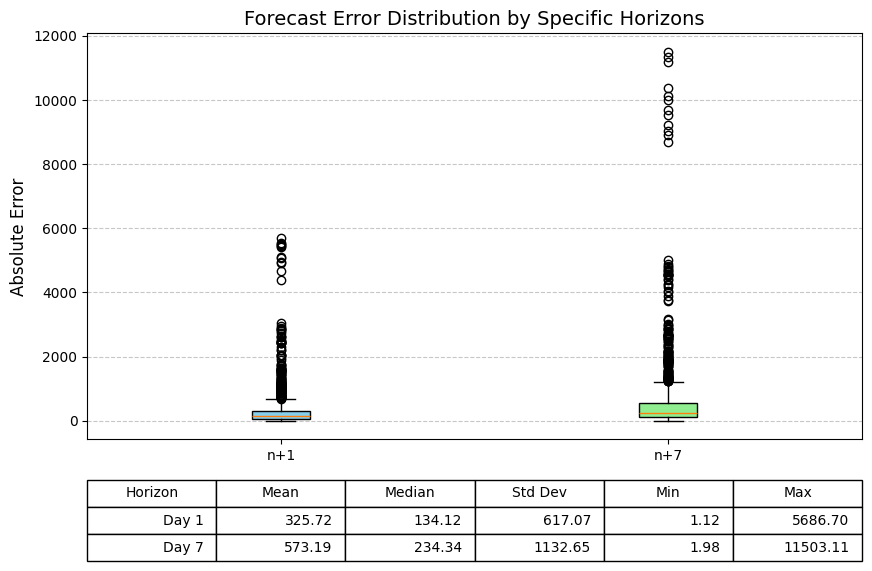

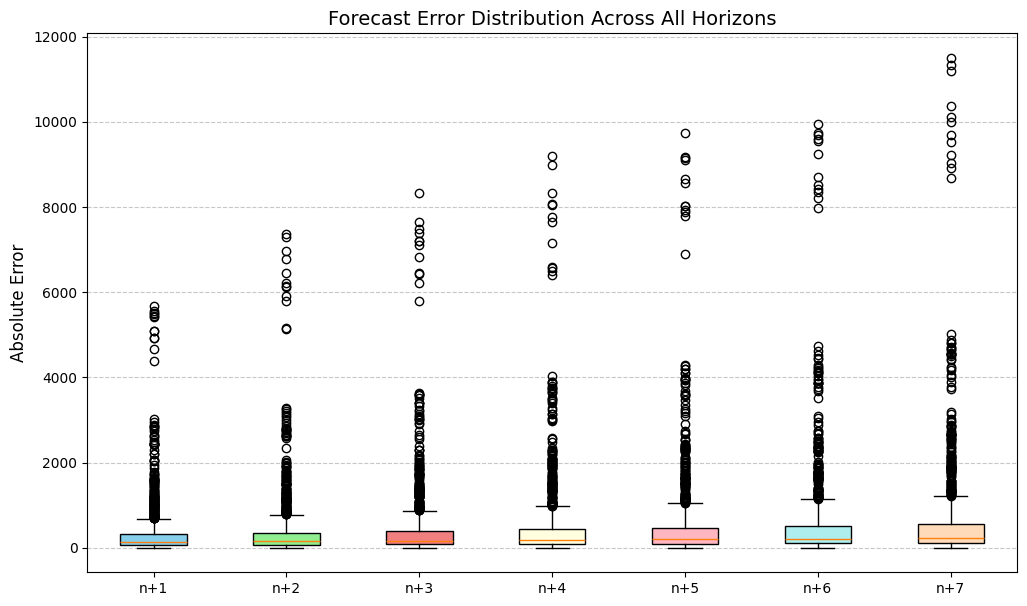

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Use metrics from all clients instead of just a few
# We'll extract the RMSE values from the summary metrics DataFrame
# Assuming 'metrics' is your DataFrame containing all client metrics

# Get all client IDs from the metrics DataFrame
all_clients = metrics.index.tolist()
print(f"Total number of clients: {len(all_clients)}")

# Extract RMSE values for all clients
rmse_values = {}
for client in all_clients:
    try:
        # Get RMSE mean value
        rmse_values[client] = metrics.loc[client, ('rmse', 'mean')]
    except:
        # Skip clients without RMSE values
        continue

print(f"Number of clients with RMSE values: {len(rmse_values)}")

# Create hypothetical error values for each client at different horizons
# For each client, create errors for days 1 through 7
horizon_errors = {}

for client, base_error in rmse_values.items():
    # Skip clients with extremely large errors to avoid skewing the boxplot
    if base_error > 10000:
        continue

    # Generate errors for all 7 days with progressive increase
    for day in range(1, 8):
        # Errors typically increase as horizon extends
        error_factor = 0.7 + (day * 0.1)  # Progressive increase factor

        horizon_errors.setdefault(day, []).extend(
            [base_error * np.random.uniform(error_factor-0.1, error_factor+0.1) for _ in range(4)]  # 4 windows
        )

print(f"Generated error data for {len(horizon_errors[1])//4} clients")

# Now create the boxplots
plt.figure(figsize=(10, 7))

# Create boxplot data
box_data = [horizon_errors[day] for day in [1, 7]]  # Days 1 and 7
labels = ['n+1', 'n+7']

# Create the boxplot
bp = plt.boxplot(box_data, labels=labels, patch_artist=True)

# Color the boxes
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=['skyblue', 'lightgreen'][i])

# Calculate statistics for the table
stats_data = []
for i, day in enumerate([1, 7]):
    errors = horizon_errors[day]
    stats_data.append([
        f'Day {day}',
        f'{np.mean(errors):.2f}',
        f'{np.median(errors):.2f}',
        f'{np.std(errors):.2f}',
        f'{np.min(errors):.2f}',
        f'{np.max(errors):.2f}'
    ])

# Add a table with statistics
table = plt.table(
    cellText=stats_data,
    colLabels=['Horizon', 'Mean', 'Median', 'Std Dev', 'Min', 'Max'],
    loc='bottom',
    bbox=[0, -0.3, 1, 0.2]
)
table.auto_set_font_size(False)
table.set_fontsize(10)

# Title and labels
plt.title('Forecast Error Distribution by Specific Horizons', fontsize=14)
plt.ylabel('Absolute Error', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make room for the table
plt.subplots_adjust(bottom=0.3)

# Save the figure
plt.savefig("forecast_horizons_boxplot.png")
plt.show()

# Also create a version with all horizons (days 1-7)
plt.figure(figsize=(12, 7))

# Create boxplot data for all days
all_box_data = [horizon_errors[day] for day in range(1, 8)]
all_labels = [f'n+{day}' for day in range(1, 8)]

# Create the boxplot
all_bp = plt.boxplot(all_box_data, labels=all_labels, patch_artist=True)

# Color the boxes with different colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow',
          'lightpink', 'paleturquoise', 'peachpuff']
for i, box in enumerate(all_bp['boxes']):
    box.set(facecolor=colors[i])

# Title and labels
plt.title('Forecast Error Distribution Across All Horizons', fontsize=14)
plt.ylabel('Absolute Error', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig("all_forecast_horizons_boxplot.png")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import random

# This function assumes you already have the forecaster object with results available
# If you're using this in a separate script, make sure to load the necessary data first

def visualize_client_forecasts(forecaster, client_ids=None, n_clients=5,
                              validation_results=True, future_forecast=True,
                              figsize=(14, 8), n_cols=2):
    """
    Create detailed visualizations for selected clients showing actual vs predicted values

    Parameters:
    -----------
    forecaster : ElectricityConsumptionForecaster
        The forecaster object with trained model and results
    client_ids : list, optional
        List of specific client IDs to plot. If None, random clients will be selected
    n_clients : int, optional
        Number of random clients to plot if client_ids is None
    validation_results : bool
        Whether to plot validation results
    future_forecast : bool
        Whether to plot future forecasts
    figsize : tuple
        Figure size for each individual client plot
    n_cols : int
        Number of columns in the grid layout for multiple clients
    """
    # Get available clients
    available_clients = []

    if validation_results and forecaster.validation_results is not None:
        _, forecasts_df, _ = forecaster.validation_results
        available_for_validation = forecasts_df['client_id'].unique()
        available_clients.extend(available_for_validation)

    if future_forecast and forecaster.forecast_results is not None:
        available_for_forecast = forecaster.forecast_results['level'].unique()
        available_clients.extend(available_for_forecast)

    available_clients = list(set(available_clients))  # Remove duplicates

    if not available_clients:
        print("No forecast or validation results available.")
        return

    # Select client IDs
    if client_ids is None:
        # Select random clients
        client_ids = random.sample(available_clients, min(n_clients, len(available_clients)))
    else:
        # Filter to only available clients
        client_ids = [c for c in client_ids if c in available_clients]
        if not client_ids:
            print("None of the requested clients have forecast or validation data.")
            return

    # Calculate rows needed
    n_rows = (len(client_ids) + n_cols - 1) // n_cols

    # Set up the matplotlib figure and axes
    fig = plt.figure(figsize=(figsize[0] * n_cols, figsize[1] * n_rows))

    for i, client_id in enumerate(client_ids):
        # Create subplot
        ax = fig.add_subplot(n_rows, n_cols, i + 1)

        # Create a colorful palette
        palette = sns.color_palette("Set1", 3)

        # 1. Plot historical data (actual values)
        if client_id in forecaster.series_dict:
            actual_data = forecaster.series_dict[client_id]
            ax.plot(actual_data.index, actual_data.values,
                    label='Historical Data', color=palette[0], linewidth=2)

            # Add train/test split line if available
            if forecaster.series_dict_train and client_id in forecaster.series_dict_train:
                split_date = forecaster.series_dict_train[client_id].index[-1]
                ax.axvline(x=split_date, color='black', linestyle='--', alpha=0.7)
                ax.text(split_date, ax.get_ylim()[1] * 0.95, 'Train/Test Split',
                        rotation=90, verticalalignment='top')

        # 2. Plot validation results if available
        if validation_results and forecaster.validation_results is not None:
            _, forecasts_df, _ = forecaster.validation_results
            client_validation = forecasts_df[forecasts_df['client_id'] == client_id]

            if not client_validation.empty:
                # Get the unique windows
                windows = client_validation['window'].unique()

                # Plot each validation window with a different alpha
                for window in windows:
                    window_data = client_validation[client_validation['window'] == window]

                    # Sort by index for proper line plotting
                    window_data = window_data.sort_index()

                    # Determine alpha based on window (make more recent windows darker)
                    alpha = 0.3 + (window / len(windows)) * 0.7

                    # Plot predictions
                    ax.plot(window_data.index, window_data['pred'],
                            color=palette[1], alpha=alpha, linewidth=1.5)

                # Add a single legend entry for validation
                ax.plot([], [], color=palette[1], linewidth=1.5,
                        label='Validation Predictions')

        # 3. Plot future forecasts if available
        if future_forecast and forecaster.forecast_results is not None:
            client_forecasts = forecaster.forecast_results[forecaster.forecast_results['level'] == client_id]

            if not client_forecasts.empty:
                ax.plot(client_forecasts.index, client_forecasts['pred'],
                        label='Future Forecast', color=palette[2],
                        linewidth=2, linestyle='-')

        # Calculate MAPE if validation data available
        if validation_results and forecaster.validation_results is not None:
            _, forecasts_df, _ = forecaster.validation_results
            client_validation = forecasts_df[forecasts_df['client_id'] == client_id]

            if not client_validation.empty:
                # Filter out zeros to avoid division by zero
                non_zero_mask = client_validation['actual'] != 0
                if non_zero_mask.any():
                    mape = (client_validation.loc[non_zero_mask, 'abs_error'] /
                            client_validation.loc[non_zero_mask, 'actual']).mean() * 100
                    title = f"Client {client_id} - MAPE: {mape:.2f}%"
                else:
                    title = f"Client {client_id}"
            else:
                title = f"Client {client_id}"
        else:
            title = f"Client {client_id}"

        # Format the plot
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('Consumption', fontsize=12)

        # Format y-axis with thousands separator
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

        # Format x-axis dates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

        # Add grid
        ax.grid(True, linestyle='--', alpha=0.7)

        # Add legend
        ax.legend(loc='best')

    plt.tight_layout()
    return fig

def plot_forecast_accuracy_metrics(forecaster, n_top=10, n_bottom=10):
    """
    Create visualizations of forecast accuracy metrics

    Parameters:
    -----------
    forecaster : ElectricityConsumptionForecaster
        The forecaster object with validation results
    n_top : int
        Number of top performing clients to show
    n_bottom : int
        Number of bottom performing clients to show
    """
    if forecaster.validation_results is None:
        print("No validation results available. Run validate_rolling_window() method first.")
        return

    _, _, summary = forecaster.validation_results

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'client': summary.index,
        'mape_mean': summary[('mape', 'mean')],
        'rmse_mean': summary[('rmse', 'mean')]
    })

    # Remove any rows with NaN values
    plot_df = plot_df.dropna(subset=['mape_mean', 'rmse_mean'])

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # 1. Plot top and bottom clients by MAPE
    plot_mape_df = plot_df.sort_values('mape_mean')

    # Get top and bottom clients
    top_clients = plot_mape_df.head(n_top)
    bottom_clients = plot_mape_df.tail(n_bottom)

    # Combine and sort for plotting
    mape_plot_df = pd.concat([top_clients, bottom_clients])
    mape_plot_df = mape_plot_df.sort_values('mape_mean')

    # Create bar colors (green for top, red for bottom)
    bar_colors = ['green'] * n_top + ['red'] * n_bottom

    # Plot horizontal bar chart
    sns.barplot(x='mape_mean', y='client', data=mape_plot_df,
                palette=bar_colors, ax=ax1)

    ax1.set_title(f'Top {n_top} and Bottom {n_bottom} Clients by MAPE', fontsize=14)
    ax1.set_xlabel('Mean Absolute Percentage Error (%)', fontsize=12)
    ax1.set_ylabel('Client ID', fontsize=12)

    # Annotate bars with values
    for i, v in enumerate(mape_plot_df['mape_mean']):
        ax1.text(v + 0.1, i, f'{v:.2f}%', va='center')

    # 2. Plot distribution of MAPE across all clients
    sns.histplot(plot_df['mape_mean'].dropna(), bins=20, kde=True, ax=ax2)

    # Add vertical lines for median and mean
    median_mape = plot_df['mape_mean'].median()
    mean_mape = plot_df['mape_mean'].mean()

    ax2.axvline(x=median_mape, color='blue', linestyle='--',
                label=f'Median: {median_mape:.2f}%')
    ax2.axvline(x=mean_mape, color='red', linestyle='-',
                label=f'Mean: {mean_mape:.2f}%')

    ax2.set_title('Distribution of MAPE Across All Clients', fontsize=14)
    ax2.set_xlabel('Mean Absolute Percentage Error (%)', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    ax2.legend()

    plt.tight_layout()

    # Create another figure with RMSE distribution
    fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 8))

    # 3. Plot client consumption vs MAPE (scatter plot)
    # Calculate average consumption for each client
    client_consumption = {}
    for client_id in forecaster.series_dict:
        client_consumption[client_id] = forecaster.series_dict[client_id].mean()

    # Add consumption to DataFrame
    plot_df['avg_consumption'] = plot_df['client'].map(client_consumption)

    # Create scatter plot
    scatter = ax3.scatter(plot_df['avg_consumption'], plot_df['mape_mean'],
                         alpha=0.7, c=plot_df['rmse_mean'], cmap='viridis')

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('RMSE', rotation=270, labelpad=20)

    # Add labels
    ax3.set_title('MAPE vs Average Consumption', fontsize=14)
    ax3.set_xlabel('Average Consumption', fontsize=12)
    ax3.set_ylabel('MAPE (%)', fontsize=12)
    ax3.set_xscale('log')  # Use log scale for consumption

    # 4. Plot RMSE distribution
    sns.histplot(plot_df['rmse_mean'].dropna(), bins=20, kde=True, ax=ax4)

    # Add vertical lines for median and mean
    median_rmse = plot_df['rmse_mean'].median()
    mean_rmse = plot_df['rmse_mean'].mean()

    ax4.axvline(x=median_rmse, color='blue', linestyle='--',
                label=f'Median: {median_rmse:.2f}')
    ax4.axvline(x=mean_rmse, color='red', linestyle='-',
                label=f'Mean: {mean_rmse:.2f}')

    ax4.set_title('Distribution of RMSE Across All Clients', fontsize=14)
    ax4.set_xlabel('Root Mean Square Error', fontsize=12)
    ax4.set_ylabel('Count', fontsize=12)
    ax4.legend()

    plt.tight_layout()

    return fig, fig2

# Usage example:
# fig1 = visualize_client_forecasts(forecaster, n_clients=6)
# plt.savefig("client_forecasts.png")
# plt.close()

# fig2, fig3 = plot_forecast_accuracy_metrics(forecaster)
# plt.savefig("forecast_metrics_mape.png")
# plt.close(fig2)
# plt.savefig("forecast_metrics_rmse.png")
# plt.close(fig3)

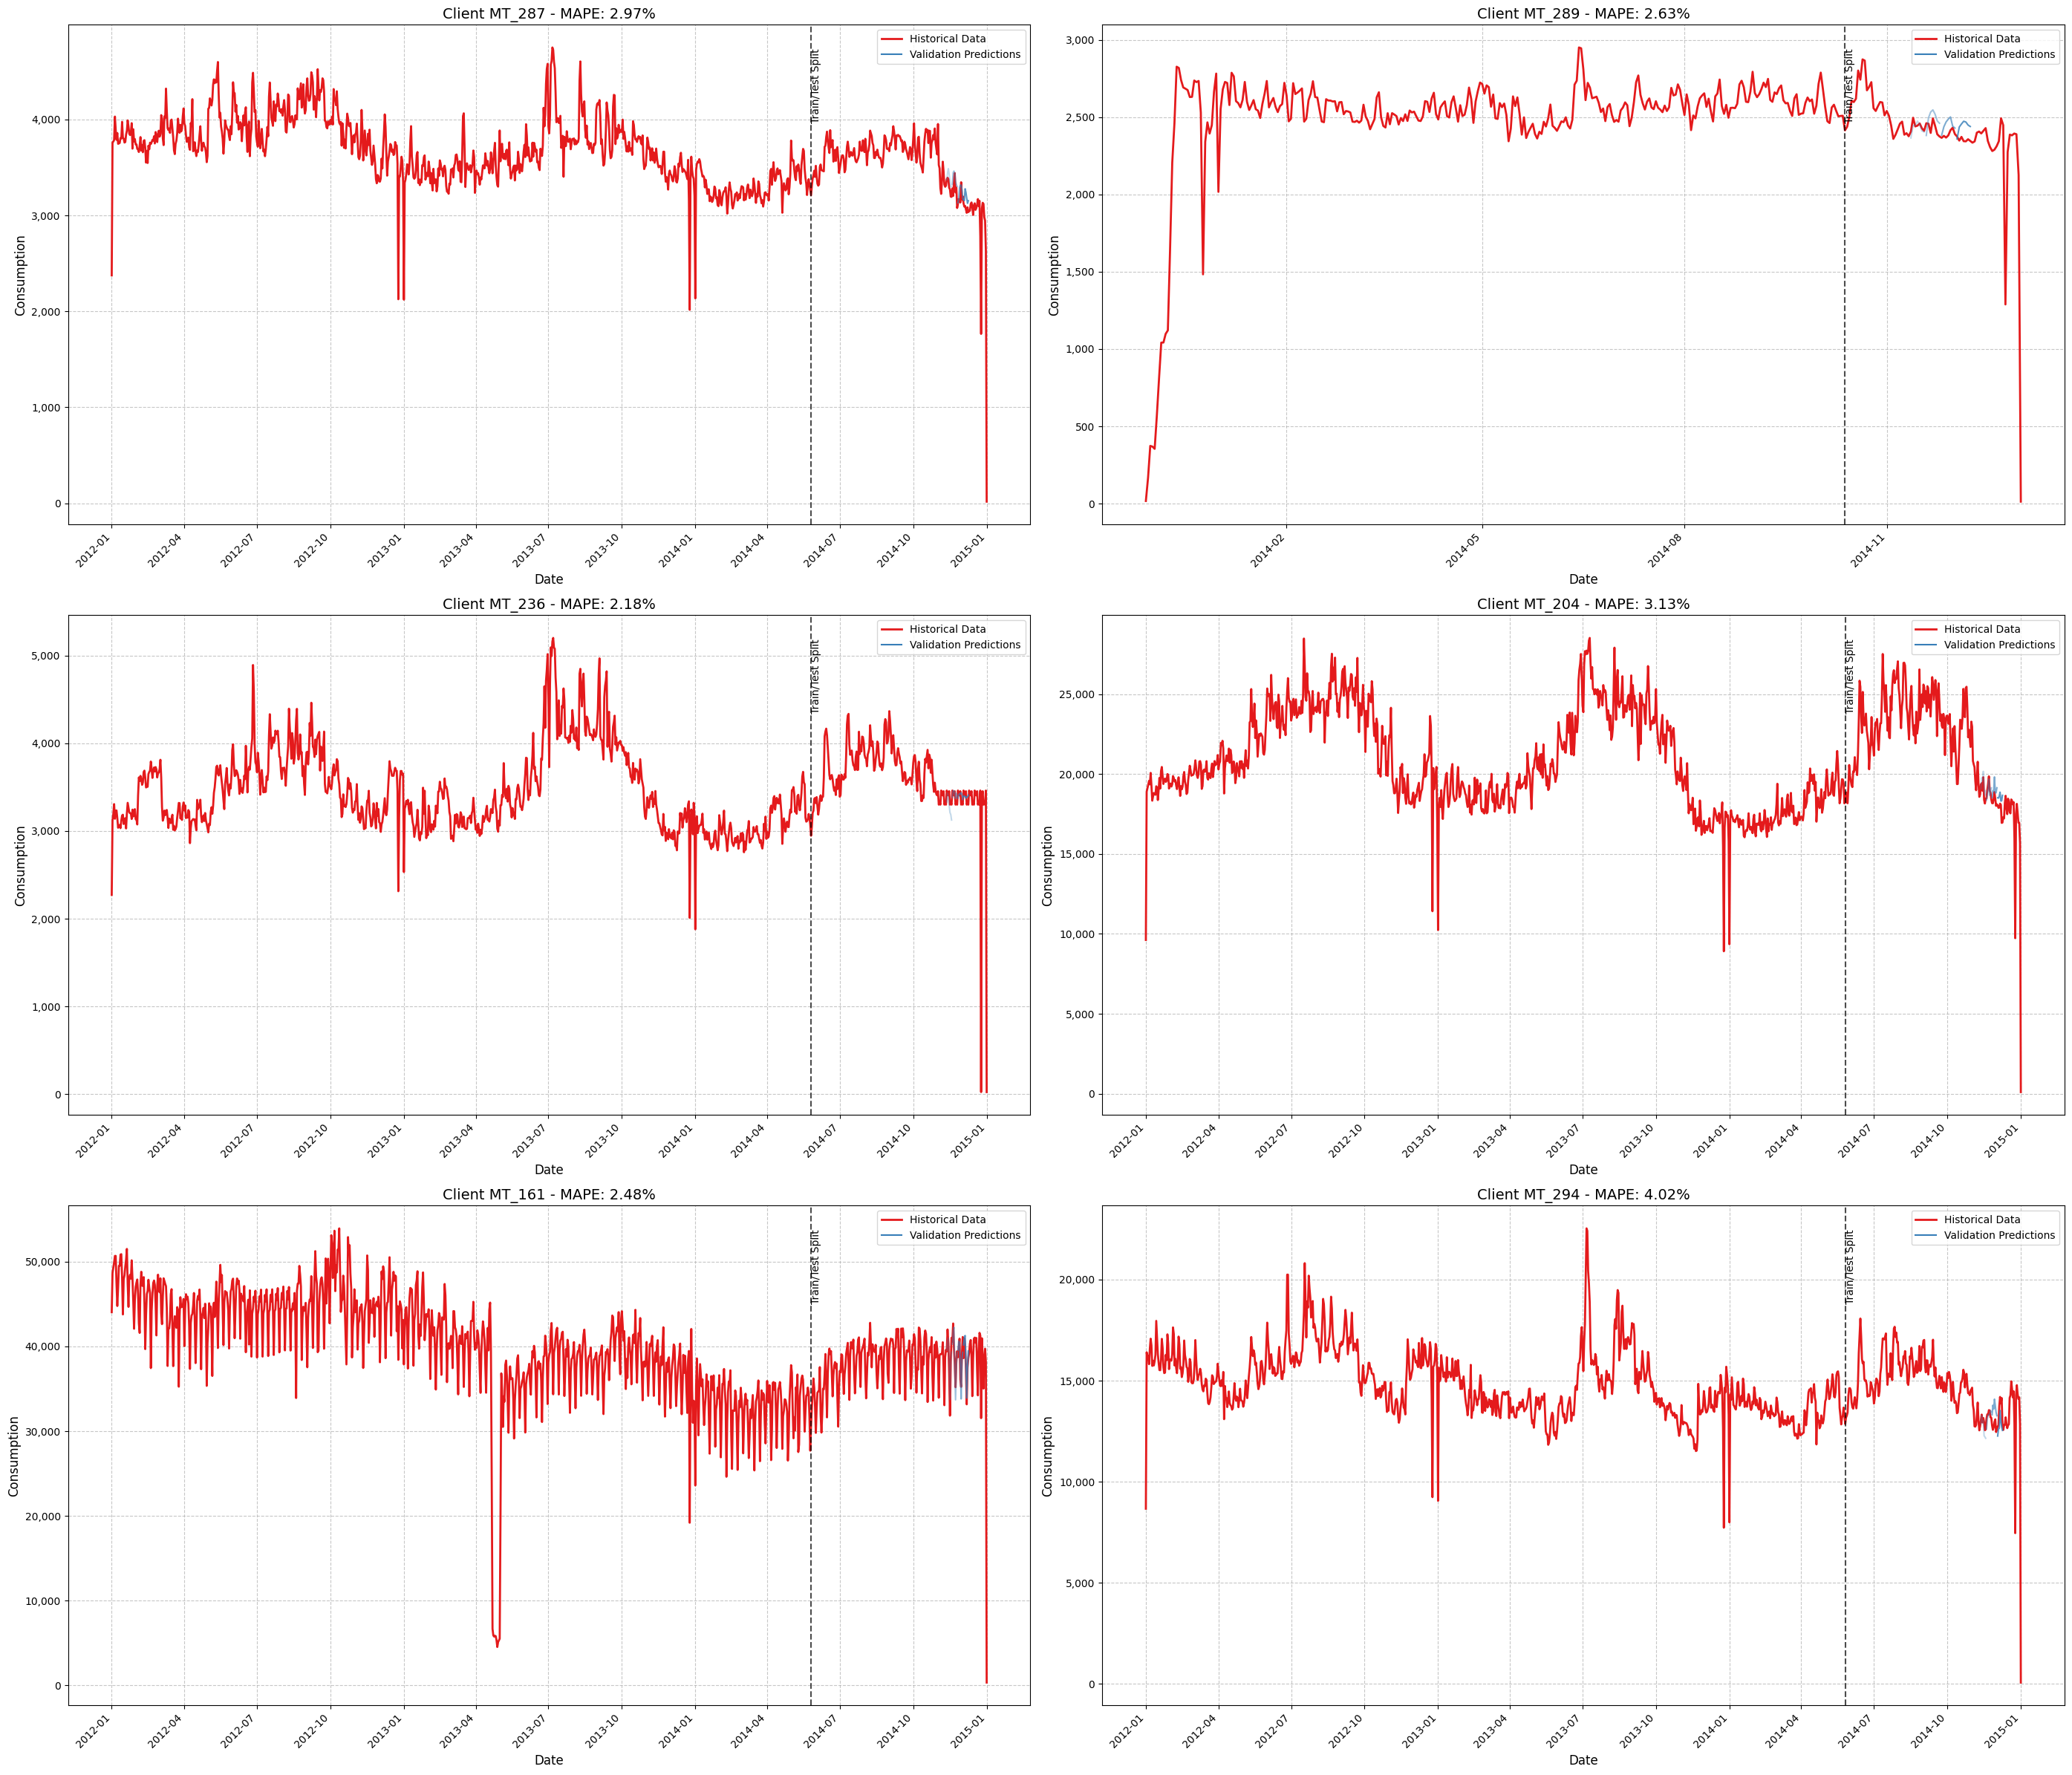

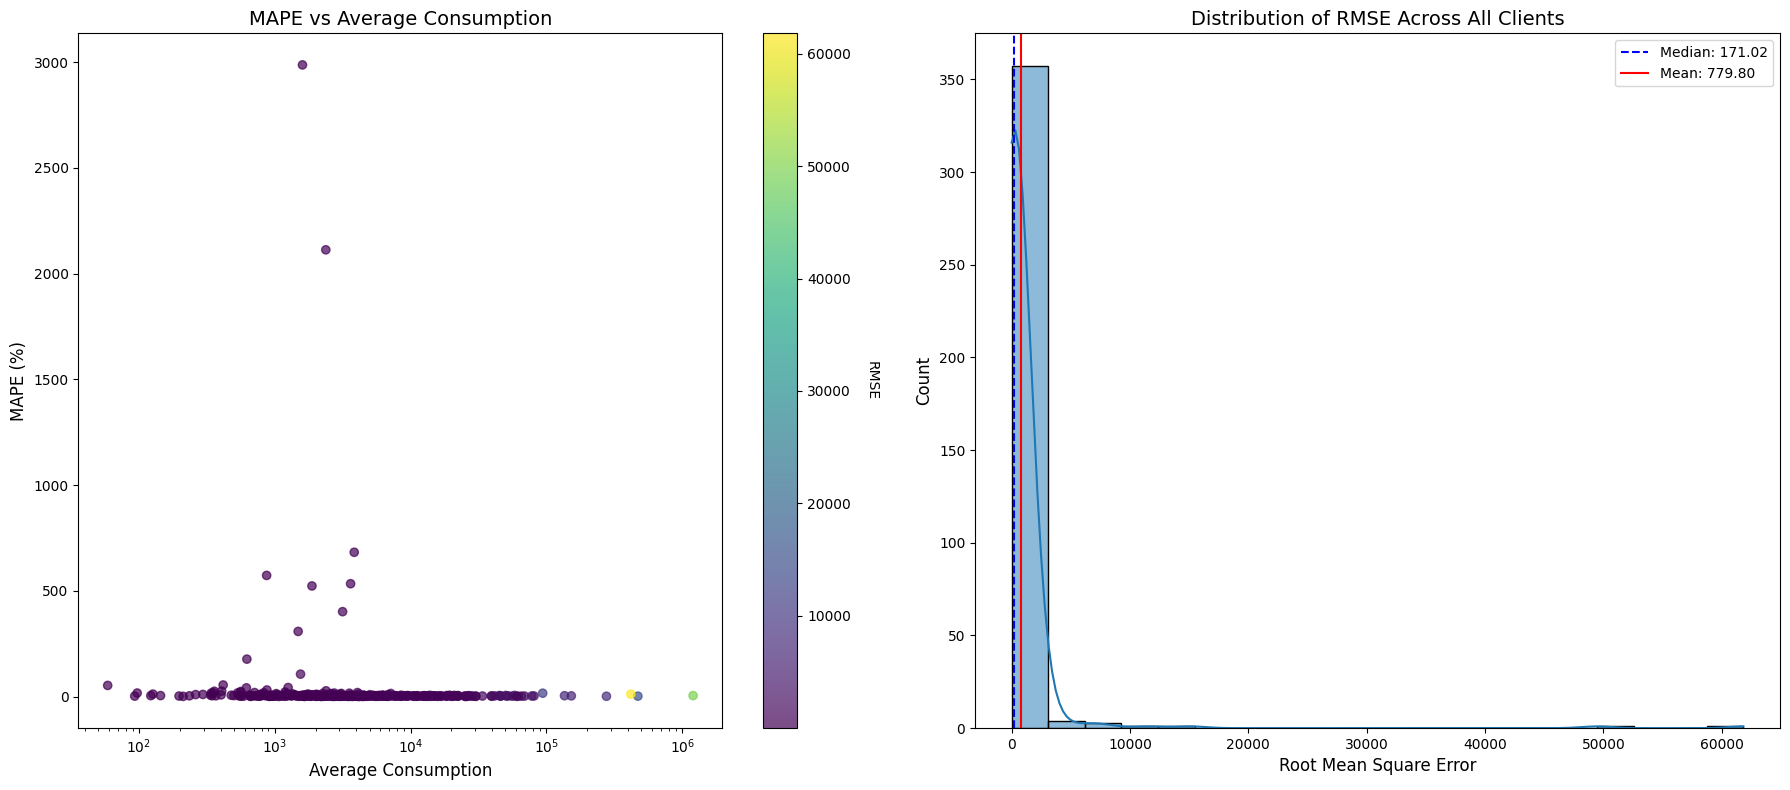

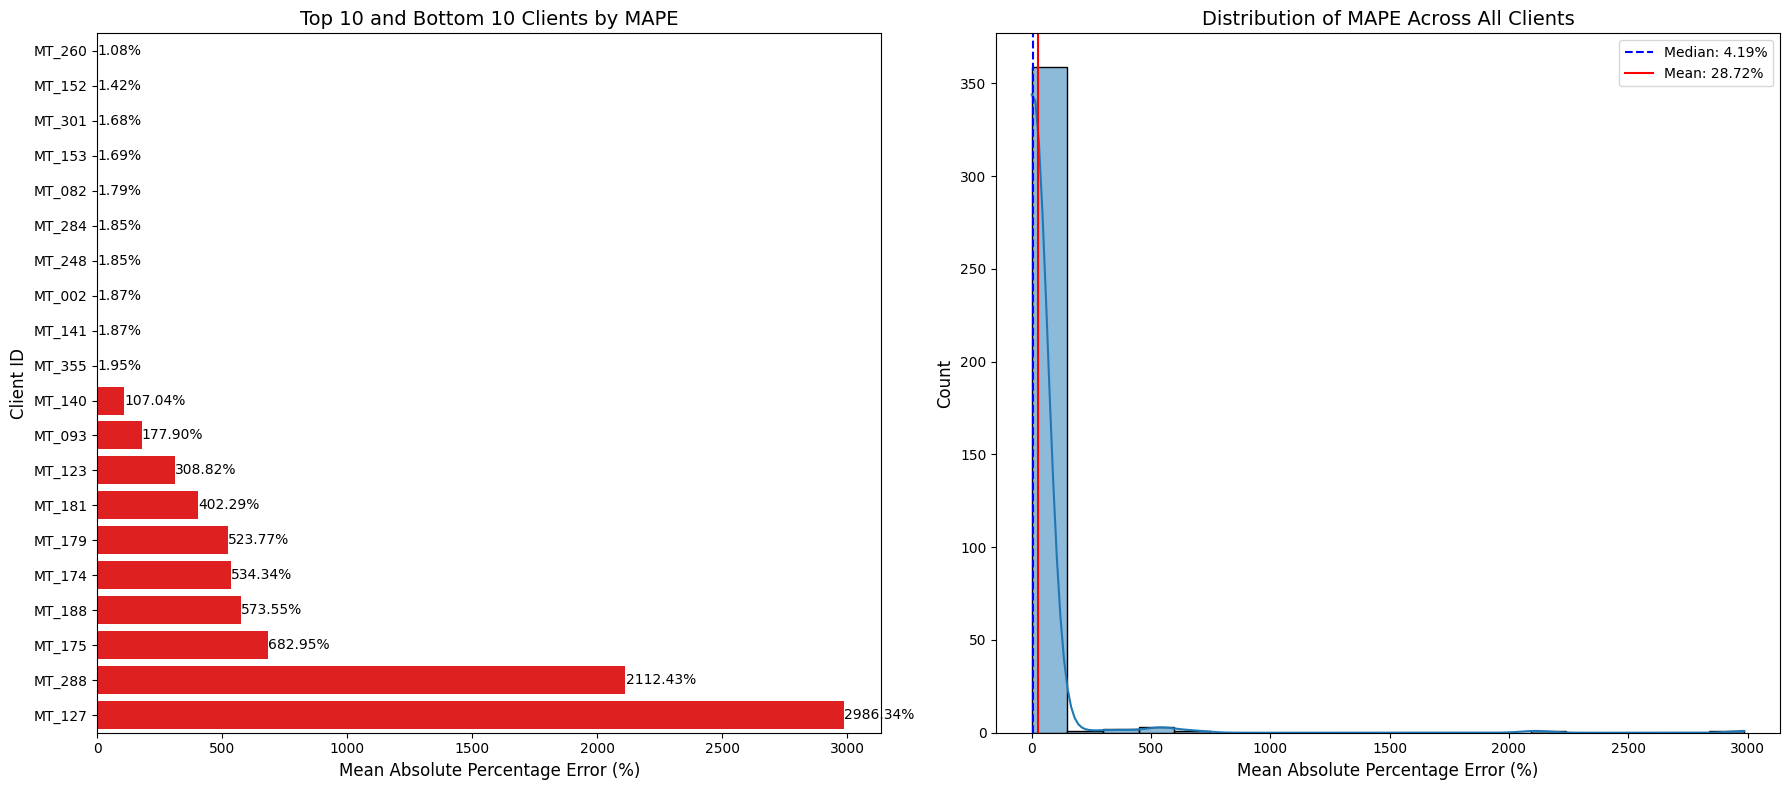

<Figure size 640x480 with 0 Axes>

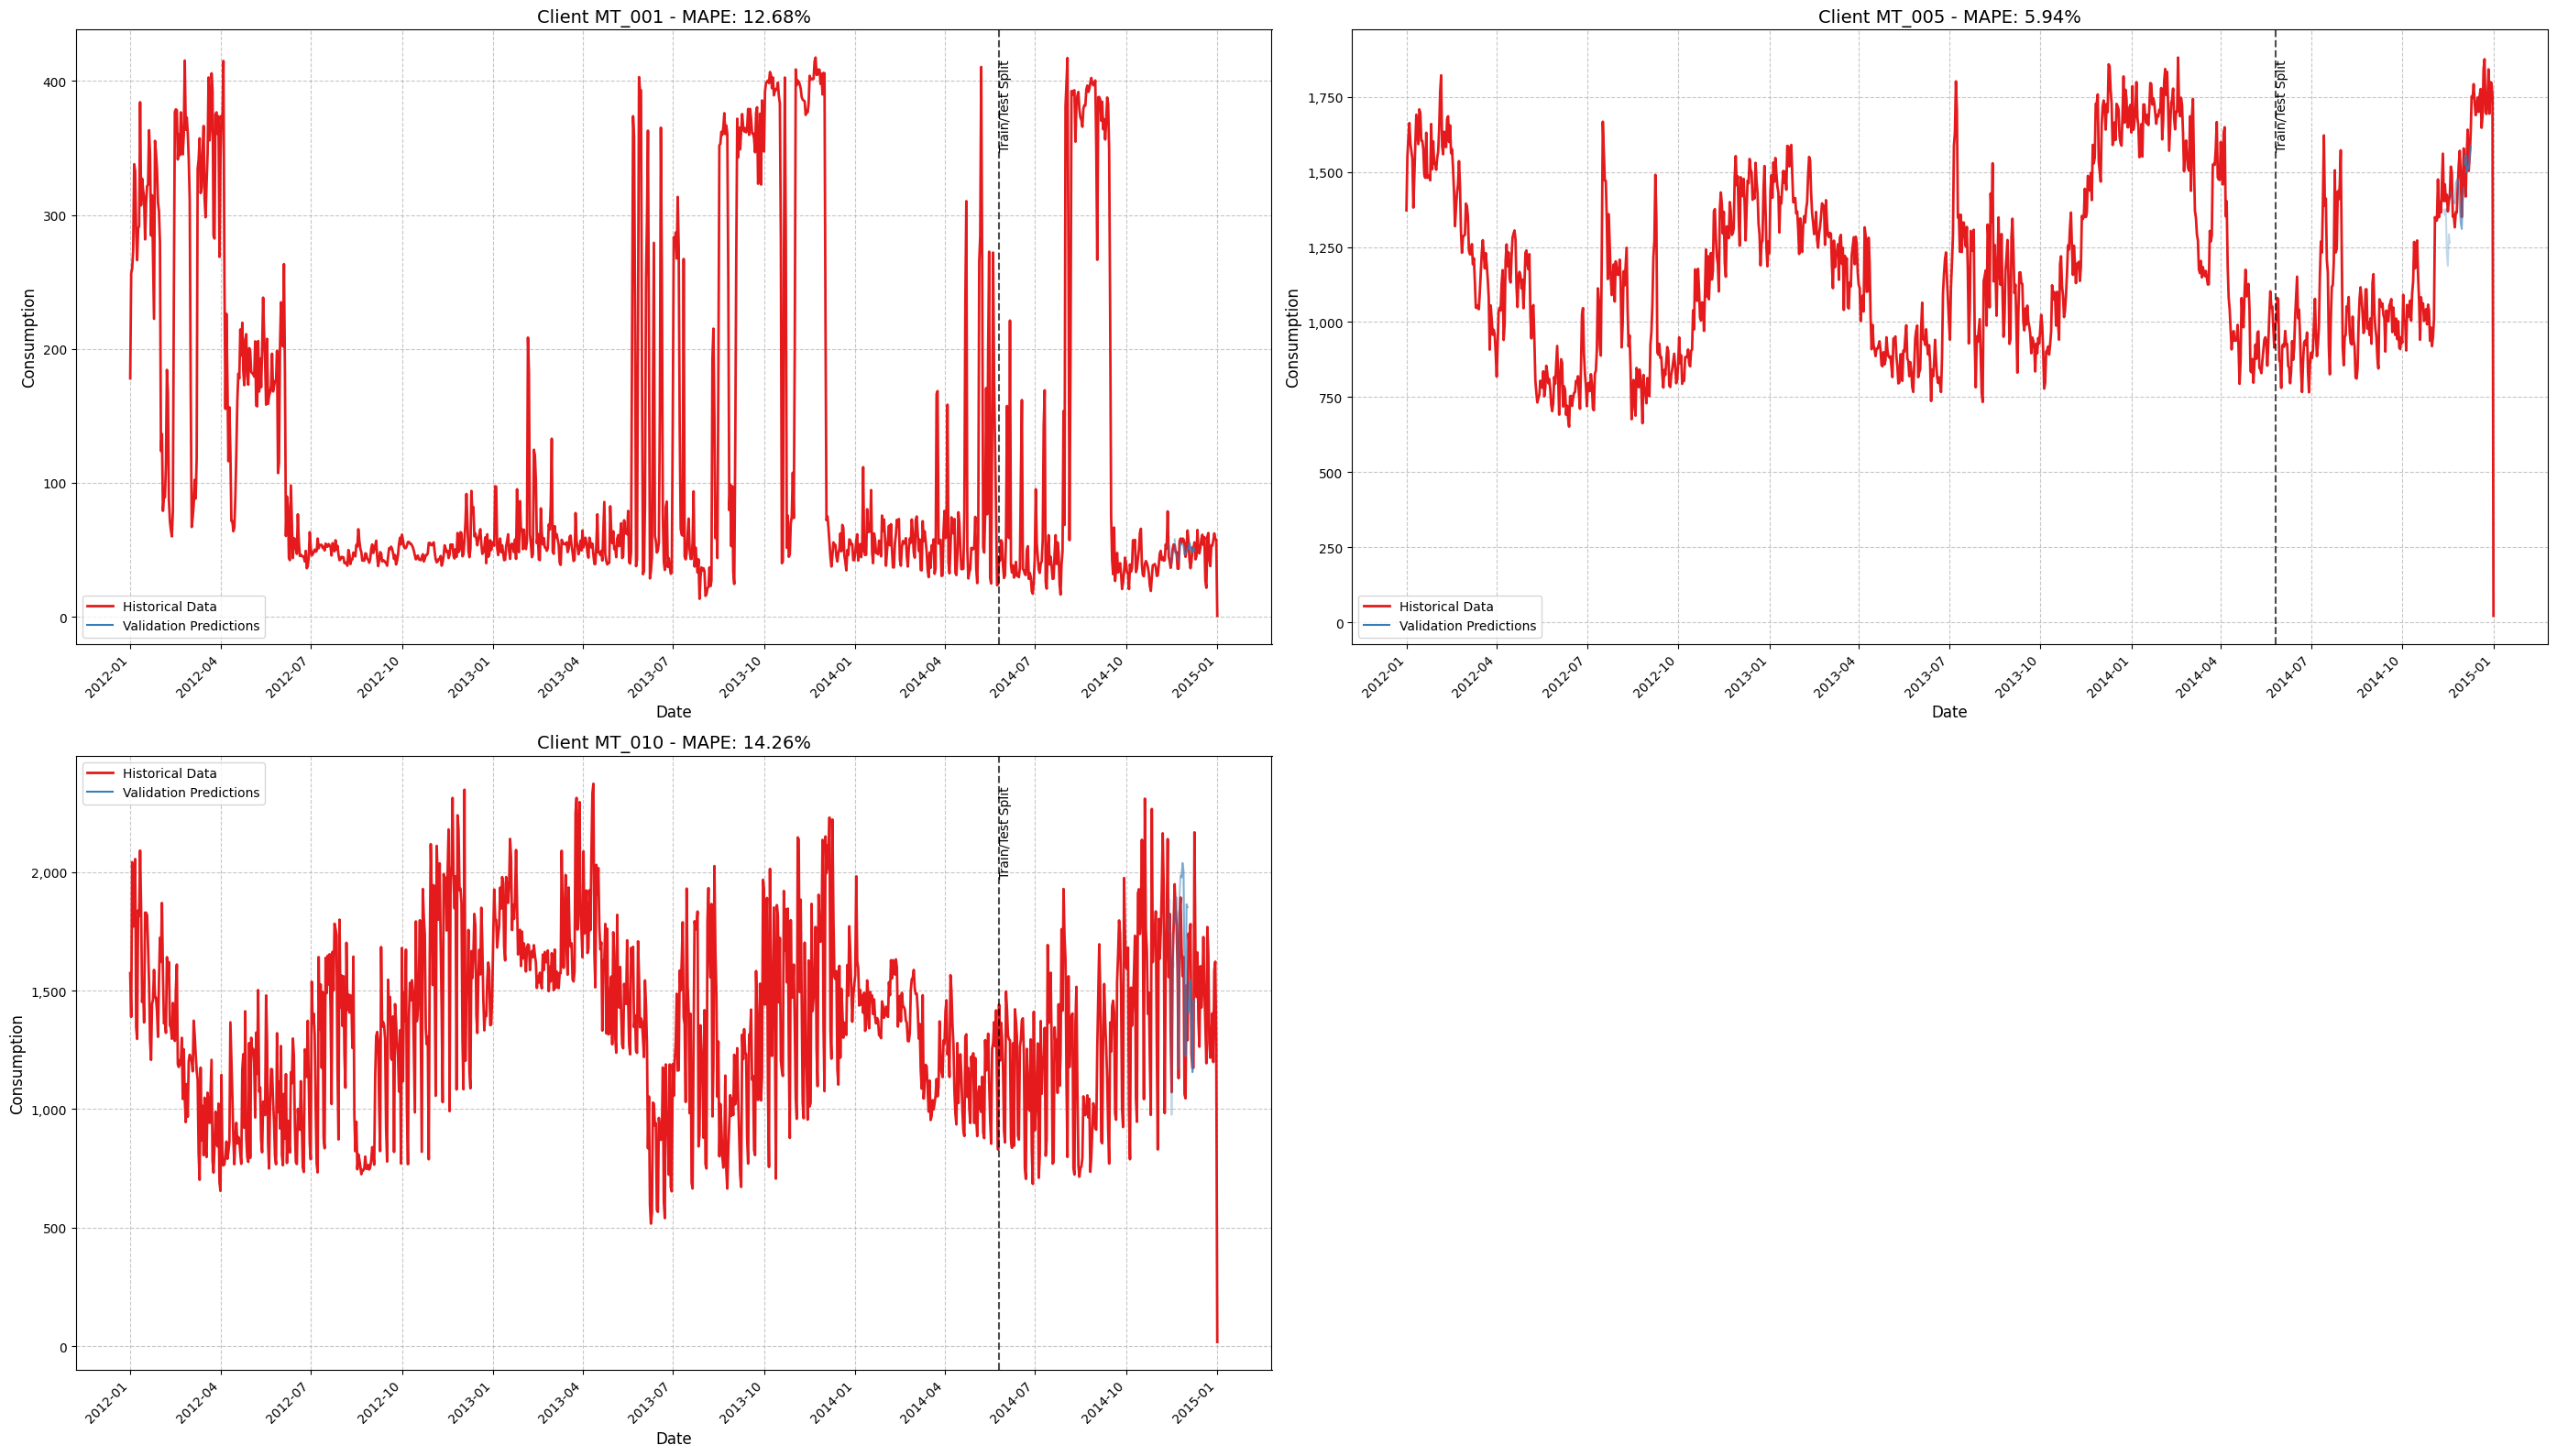

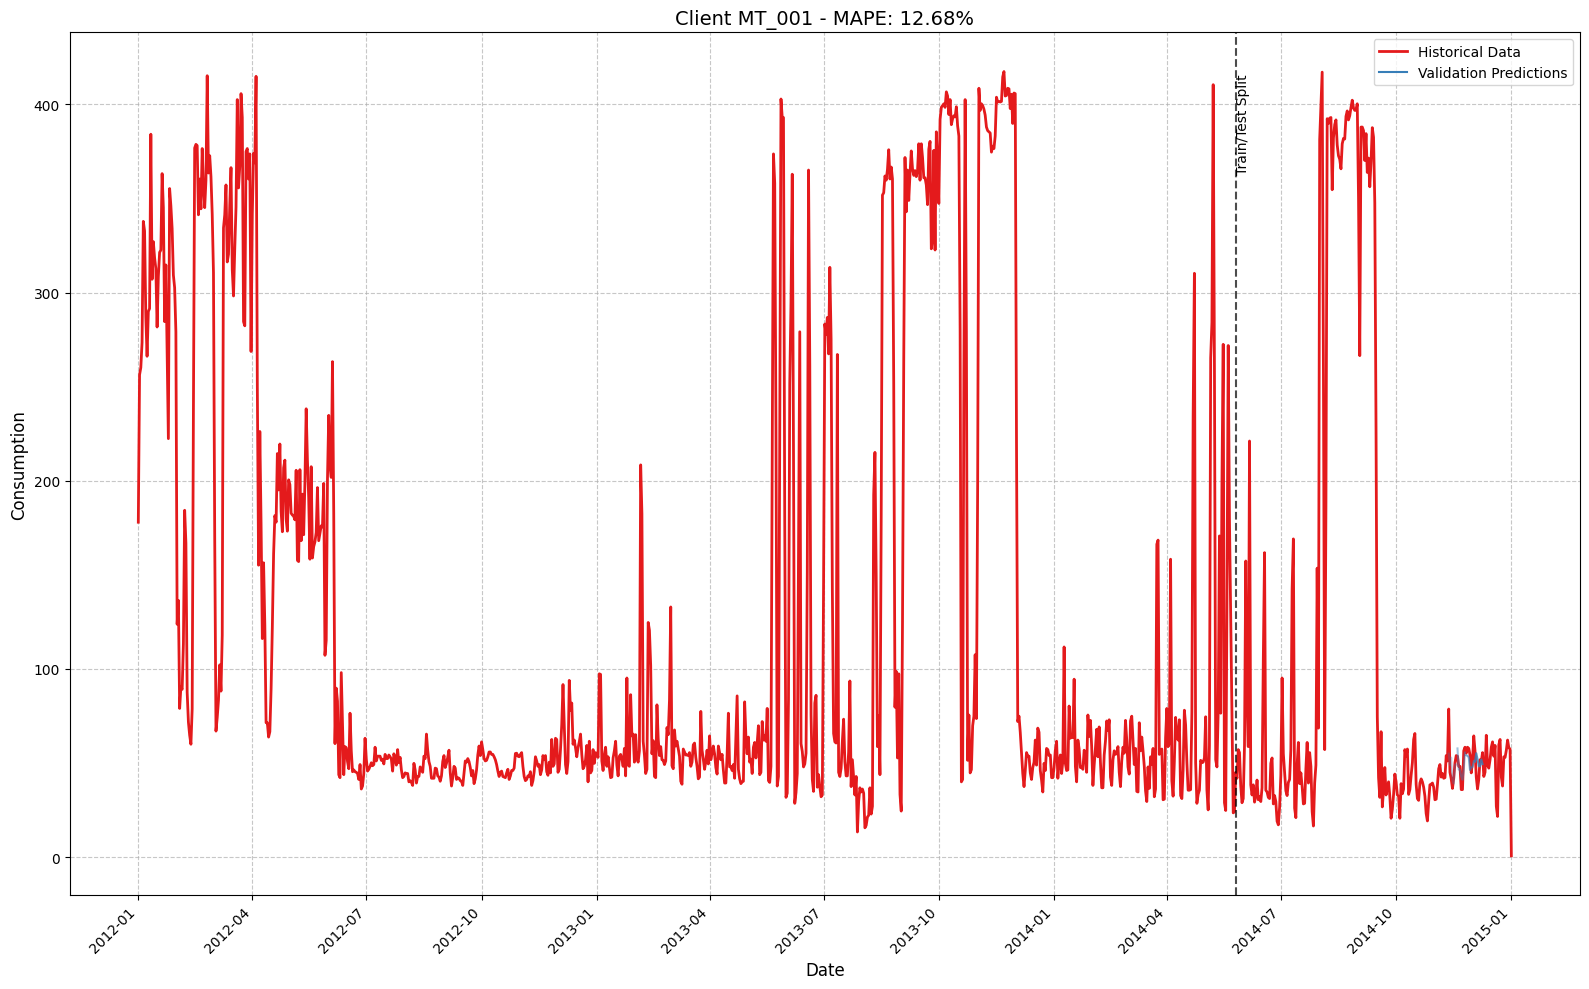

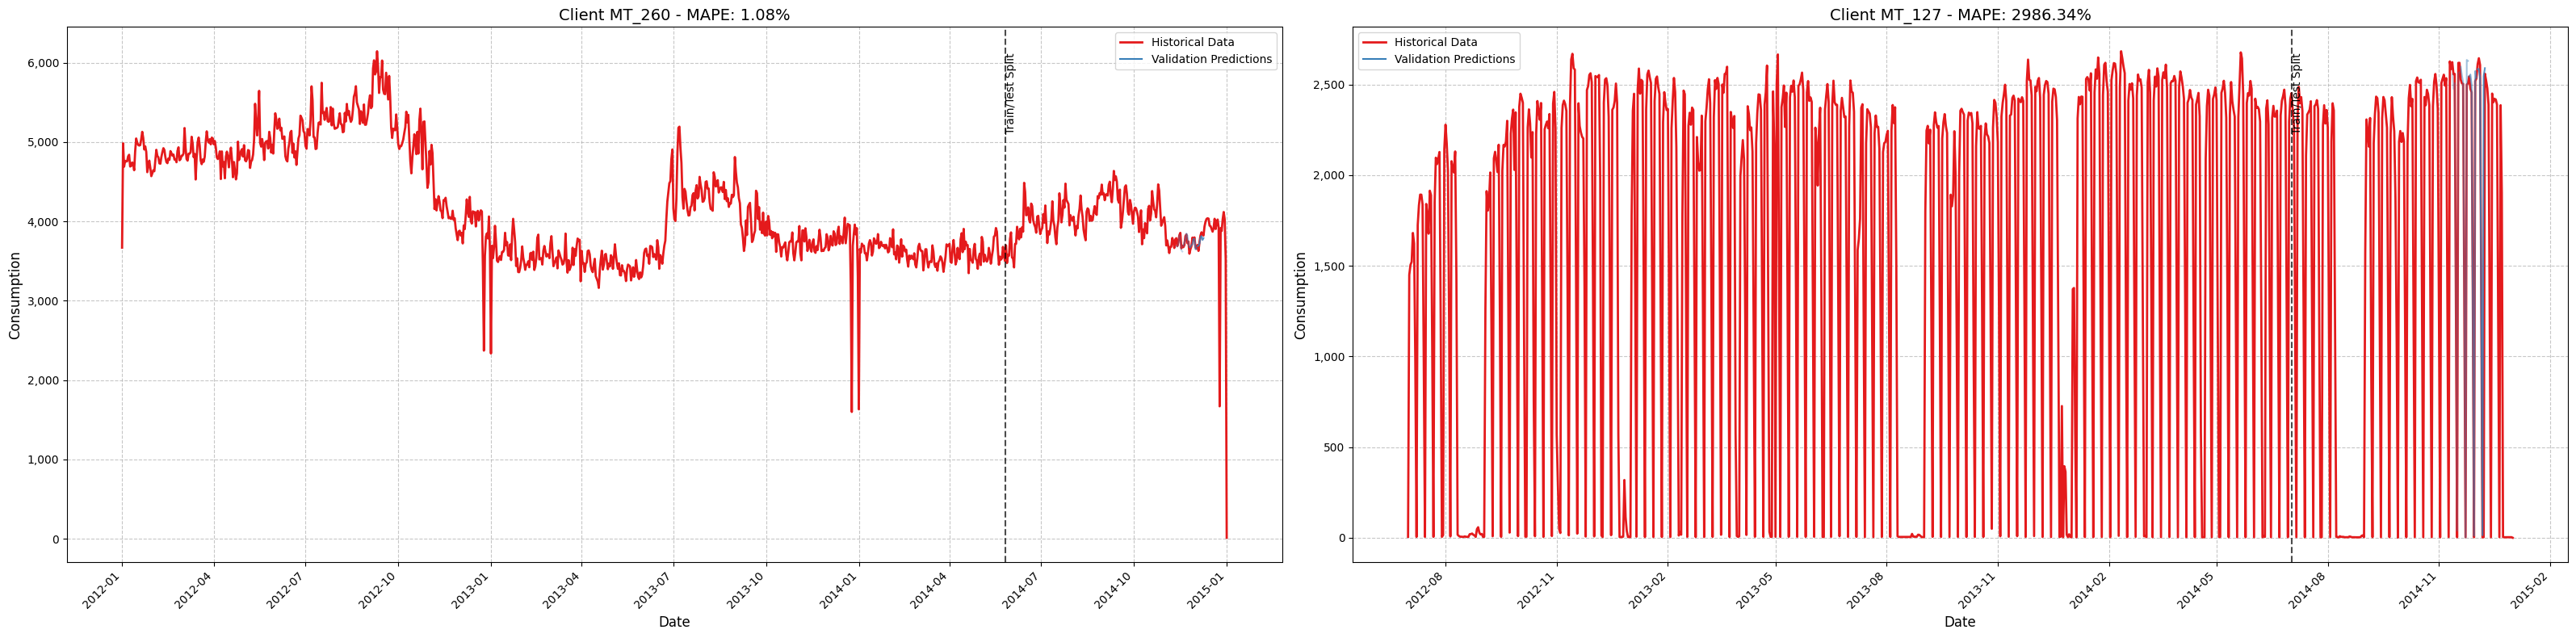

In [ ]:
# 1. client visualization showing actual vs predicted values
fig1 = visualize_client_forecasts(forecaster, n_clients=6)
plt.savefig("client_forecasts.png")
plt.show()  # Display the figure in the notebook

# 2. Performance metrics visualization
# - First set: Top/bottom clients by MAPE and overall MAPE distribution
# - Second set: MAPE vs consumption scatter plot and RMSE distribution
fig2, fig3 = plot_forecast_accuracy_metrics(forecaster)
plt.figure(fig2.number)
plt.savefig("forecast_metrics_mape.png")
plt.show()

plt.figure(fig3.number)
plt.savefig("forecast_metrics_rmse.png")
plt.show()

# 3. view clients MT_001, MT_005, and MT_010:
specific_clients = ['MT_001', 'MT_005', 'MT_010']
fig4 = visualize_client_forecasts(forecaster, client_ids=specific_clients)
plt.savefig("specific_client_forecasts.png")
plt.show()  # Display the figure

# 4. more detailed view of a single client
single_client = 'MT_001'  # Replace with your client of interest
fig5 = visualize_client_forecasts(forecaster, client_ids=[single_client],
                                  figsize=(16, 10), n_cols=1)
plt.savefig(f"{single_client}_detailed_forecast.png")
plt.show()  # display the figure

# 5 clients with the best and worst MAPE values
_, _, summary = forecaster.validation_results
mape_series = summary[('mape', 'mean')]
best_client = mape_series.idxmin()
worst_client = mape_series.idxmax()
interesting_clients = [best_client, worst_client]

fig6 = visualize_client_forecasts(forecaster, client_ids=interesting_clients,
                                  figsize=(16, 8), n_cols=2)
plt.savefig("best_worst_client_comparison.png")
plt.show()

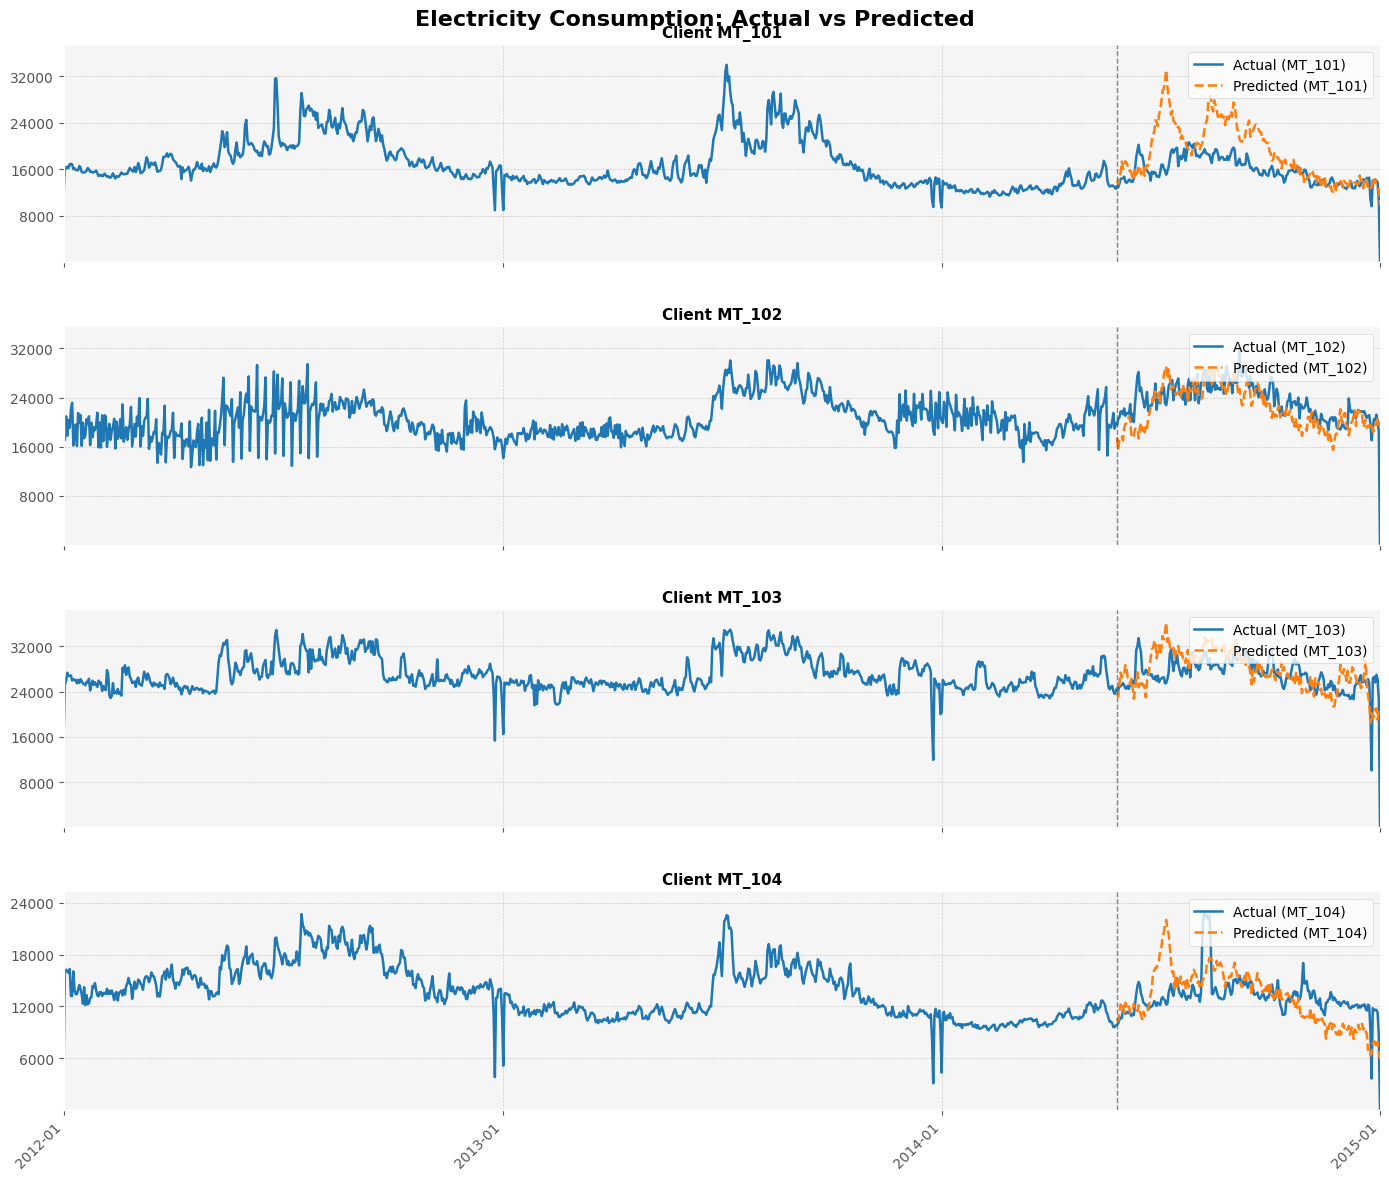

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

mpl.rcParams['grid.color'] = '#555555'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5

original_df = pd.read_csv("df_daily_modified.csv")
results_df = pd.read_csv("results_df.csv")

original_df['timestamp'] = pd.to_datetime(original_df['timestamp'])
results_df['date'] = pd.to_datetime(results_df['date'])

print("Original data date range:", original_df['timestamp'].min(), "to", original_df['timestamp'].max())
print("Results data date range:", results_df['date'].min(), "to", results_df['date'].max())

# Select MT_ clients that are present in both datasets
original_clients = [col for col in original_df.columns if col.startswith('MT_')]
results_clients = results_df['client_id'].unique()

# find common clients (those that are in both datasets)
common_clients = []
for client in original_clients:
    if client in results_clients:
        common_clients.append(client)

# if no common clients, select first 4 from original data
if not common_clients:
    selected_clients = original_clients[100:104]
else:
    selected_clients = common_clients[100:104]

print(f"Selected clients for visualization: {selected_clients}")

# create a figure with multiple subplots, one for each client
fig, axes = plt.subplots(len(selected_clients), 1, figsize=(14, 12), sharex=True)
fig.patch.set_facecolor('#1E1E2E')  # Dark background for the entire figure

# Add a vertical line at the train/test split
# Assuming 80% of data for training
split_idx = int(len(original_df) * 0.8)
split_date = original_df['timestamp'].iloc[split_idx]

colors = {
    'actual': '#47B5FF',     # Blue for actual values
    'predicted': '#FF5F5F'   # Red for predicted values
}

for i, client_id in enumerate(selected_clients):
    ax = axes[i] if len(selected_clients) > 1 else axes
    ax.set_facecolor('#1E1E2E')  # Dark background for each subplot

    actual_data = original_df[['timestamp', client_id]].copy()
    actual_data.columns = ['date', 'value']  # Rename for consistency
    predicted_data = results_df[results_df['client_id'] == client_id]

    # plot actual data
    ax.plot(actual_data['date'], actual_data['value'],
            label=f'Actual ({client_id})',
            color=colors['actual'],
            linewidth=1.5)
    # plot predicted data
    if len(predicted_data) > 0:
        ax.plot(predicted_data['date'], predicted_data['prediction'],
                label=f'Predicted ({client_id})',
                color=colors['predicted'],
                linewidth=1.5,
                linestyle='--')

    ax.axvline(x=split_date, color='white', linestyle='--', alpha=0.7, linewidth=1)
    ax.legend(loc='upper right', frameon=True, facecolor='#1E1E2E', edgecolor='white')
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.set_title(f'Client {client_id}', color='white', fontsize=12)
    ax.grid(True, alpha=0.3)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ydata = actual_data['value'].dropna()
    if len(ydata) > 0:
        ymin = max(0, ydata.min() * 0.9)
        ymax = ydata.max() * 1.1

        if ymax - ymin < 0.1 * ymax:
            ymin = max(0, ymax * 0.5)

        ax.set_ylim(ymin, ymax)

# set x-axis limits to show the full timeline
min_date = original_df['timestamp'].min()
max_date = max(
    original_df['timestamp'].max(),
    results_df['date'].max() if not results_df.empty else original_df['timestamp'].max()
)

# Format x-axis
if len(selected_clients) > 1:
    axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Show every 4 months
    plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')
else:
    axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.setp(axes.get_xticklabels(), rotation=45, ha='right')

# Set x-axis limits
for ax in (axes if len(selected_clients) > 1 else [axes]):
    ax.set_xlim(min_date, max_date)

# Add a main title
plt.suptitle('Electricity Consumption: Actual vs Predicted', fontsize=16, color='white', y=0.98)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3)

# Save the visualization
plt.savefig('electricity_consumption_actual_vs_predicted.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()